### Google Colab Link:
- If you are running this in an IDE and wish to run this on colab here is a link:
- https://colab.research.google.com/drive/1OHagyo6YzcB0_K5hX7kqSqNKWhLvGGfv?usp=sharing

### Download Data


In [2]:
!pip install gdown

import gdown
import os

# Zipped file of the Cars Collection Dataset: 'https://www.kaggle.com/datasets/ashfaqsyed/cars-collection-dataset/data'
file_id = '1HCCwIMa1NrFT1Ogv8AuMyZe7Hy9t2nQS'
output_filename = 'cars-dataset.zip'

# Check if the file already exists
if os.path.exists(output_filename):
    print(f"Found existing file: {output_filename}. Removing it now...")
    os.remove(output_filename)
    print("Existing file removed.")
else:
    print(f"No existing file named {output_filename} found. Proceeding with download.")

gdown.download(id=file_id, output=output_filename, quiet=False)

print("Download complete.")

if os.path.exists('files/'):
    print(f"Found existing folder: files/. Removing it now...")
    !rm -r files/
    print("Existing folder removed.")
else:
    print(f"No existing folder named files/ found. Proceeding with unzip.")

print("Unzipping data")
!unzip -q cars-dataset.zip -d files/

!ls -lh

No existing file named cars-dataset.zip found. Proceeding with download.


Downloading...
From (original): https://drive.google.com/uc?id=1HCCwIMa1NrFT1Ogv8AuMyZe7Hy9t2nQS
From (redirected): https://drive.google.com/uc?id=1HCCwIMa1NrFT1Ogv8AuMyZe7Hy9t2nQS&confirm=t&uuid=a3fe8dd5-ea42-4e60-8b9c-9d48ada26d24
To: /content/cars-dataset.zip
100%|██████████| 715M/715M [00:10<00:00, 67.1MB/s]


Download complete.
No existing folder named files/ found. Proceeding with unzip.
Unzipping data
total 690M
-rw-r--r-- 1 root root 683M Nov 22 20:33 cars-dataset.zip
drwxr-xr-x 2 root root 7.0M Nov 23 01:08 files
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data


### Create a DataFrame for dataset to evaluate model


In [3]:
import pandas as pd
import os

data_dir = './files/'

data_list = []

for filename in os.listdir(data_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):

      base_name = os.path.splitext(filename)[0]
      parts = base_name.split('_')

      # Features documented on dataset's kaggle page
      if len(parts) >= 16:
          record = {
              'filename': filename,
              'Make': parts[0],
              'Model': parts[1],
              'Year': parts[2],
              'MSRP': parts[3],
              'Front Wheel Size (in)': parts[4],
              'SAE Net Horsepower @ RPM': parts[5],
              'Displacement': parts[6],
              'Engine Type': parts[7],
              'Width, Max w/o mirrors (in)': parts[8],
              'Height, Overall (in)': parts[9],
              'Length, Overall (in)': parts[10],
              'Gas Mileage': parts[11],
              'Drivetrain': parts[12],
              'Passenger Capacity': parts[13],
              'Passenger Doors': parts[14],
              'Body Style': parts[15]
          }
          data_list.append(record)

car_df = pd.DataFrame(data_list)

car_df.head(10)

,filename,Make,Model,Year,MSRP,Front Wheel Size (in),SAE Net Horsepower @ RPM,Displacement,Engine Type,"Width, Max w/o mirrors (in)","Height, Overall (in)","Length, Overall (in)",Gas Mileage,Drivetrain,Passenger Capacity,Passenger Doors,Body Style
0,Acura_NSX_2017_156_19_570_35_6_87_47_176_21_AW...,Acura,NSX,2017,156,19,570,35,6,87,47,176,21,AWD,2,2,2dr
1,Mazda_CX-5_2019_31_19_180_25_4_72_65_179_24_AW...,Mazda,CX-5,2019,31,19,180,25,4,72,65,179,24,AWD,5,4,SUV
2,Volvo_V60_2016_37_17_250_25_5_73_58_182_20_AWD...,Volvo,V60,2016,37,17,250,25,5,73,58,182,20,AWD,5,4,4dr
3,Toyota_Corolla_2013_17_15_130_18_4_69_57_180_2...,Toyota,Corolla,2013,17,15,130,18,4,69,57,180,26,FWD,5,4,4dr
4,Toyota_4Runner_2017_42_20_270_40_6_75_71_190_1...,Toyota,4Runner,2017,42,20,270,40,6,75,71,190,17,RWD,5,4,SUV
5,Nissan_Armada_2020_60_20_390_56_8_79_75_208_14...,Nissan,Armada,2020,60,20,390,56,8,79,75,208,14,RWD,8,4,SUV
6,Hyundai_Sonata_2019_23_16_170_16_4_73_58_191_2...,Hyundai,Sonata,2019,23,16,170,16,4,73,58,191,28,FWD,5,4,4dr
7,Jeep_Wrangler_2016_29_17_280_36_6_73_72_163_17...,Jeep,Wrangler,2016,29,17,280,36,6,73,72,163,17,4WD,4,2,SUV
8,Chevrolet_Sonic_2016_15_15_130_18_4_68_59_173_...,Chevrolet,Sonic,2016,15,15,130,18,4,68,59,173,24,FWD,5,4,4dr
9,Audi_A4_2016_38_17_220_20_4_71_56_185_21_AWD_5...,Audi,A4,2016,38,17,220,20,4,71,56,185,21,AWD,5,4,4dr


In [4]:
# Create a filtered dataframe for model
filtered_df = car_df[['Make', 'Model', 'filename']].sort_values(by='filename', ascending=True).reset_index()[['Make', 'Model', 'filename']]
print(f'filename example: {filtered_df['filename'][0]}\n')
filtered_df

filename example: Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Bbw.jpg



,Make,Model,filename
0,Acura,ILX,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
1,Acura,ILX,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
2,Acura,ILX,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
3,Acura,ILX,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
4,Acura,ILX,Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD...
...,...,...,...
64462,smart,fortwo,smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64463,smart,fortwo,smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64464,smart,fortwo,smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...
64465,smart,fortwo,smart_fortwo_2019_28_15_800_nan_nan_74_61_106_...


In [28]:
# Create a sampled dataset
import numpy as np

# Seed is for the ability to reproduce results
np.random.seed(42)

SAMPLE_SIZE = 5000

sampled_df = filtered_df.sample(n=SAMPLE_SIZE, random_state=42)
print(f'Number of rows in sampled df: {len(sampled_df)}\n')
print(f'First 10 rows:\n{sampled_df.head(10)}')

Number of rows in sampled df: 5000

First 10 rows:
           Make          Model  \
25867       GMC  Sierra 2500HD   
27231     Honda         Accord   
21126      Ford     Expedition   
25655       GMC    Sierra 1500   
33013    Jaguar             XE   
41367   Lincoln       Nautilus   
62940     Volvo            S60   
4065       Audi             Q5   
10600     Buick       Lacrosse   
31780  INFINITI            Q50   

                                                filename  
25867  GMC_Sierra 2500HD_2016_37_17_360_60_8_80_78_na...  
27231  Honda_Accord_2017_27_18_180_24_4_73_56_189_26_...  
21126  Ford_Expedition_2019_63_20_370_35_6_79_76_210_...  
25655  GMC_Sierra 1500_2020_35_17_280_43_6_81_75_nan_...  
33013  Jaguar_XE_2017_38_17_180_20_4_72_55_183_30_AWD...  
41367  Lincoln_Nautilus_2020_63_21_330_27_6_76_66_190...  
62940  Volvo_S60_2013_31_17_250_25_5_73_58_182_20_FWD...  
4065   Audi_Q5_2015_39_18_220_20_4_74_65_182_20_AWD_5...  
10600  Buick_Lacrosse_2014_33_17_180_24_4_7

### Import same model with same method as the main code

In [6]:
# From 'https://huggingface.co/dima806/car_models_image_detection'

def classify_car(image_path):
    from transformers import pipeline
    pipe = pipeline("image-classification", model="dima806/car_models_image_detection", device=0, use_fast=True)
    result = pipe(image_path)

    make_and_model = result[0]["label"]

    split_string = make_and_model.split(' ')

    make = split_string[0]
    model = split_string[1]

    split_string = split_string[2:]
    for x in range(len(split_string)):
        model = model + ' ' + split_string[x]

    return make.upper(), model.upper()


In [1]:
# YOU MAY NEED TO RESTART SESSION AFTER RUNNING THIS TO REMOVE ERRORS
!pip install --upgrade accelerate transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.11.0
    Uninstalling accelerate-1.11.0:
      Successfully uninstalled accelerate-1.11.0


In [7]:
# Test if model works


make, model = classify_car("./files/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg")


# Should print 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg'
print("\nFirst file:")
!ls -1 files/ | head -n 1

print(f'\nMake: {filtered_df['Make'][0].upper()}')
print(f'Model: {filtered_df['Model'][0].upper()}\n')

print(f'\nFirst prediction:')
print(f'Make: {make.upper()}')
print(f'Model: {model.upper()}')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/344M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu



First file:
Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg

Make: ACURA
Model: ILX


First prediction:
Make: ACURA
Model: ILX


### Evaluate Model
- WILL TAKE A VERY LONG TIME TO RUN DEPENDING ON SAMPLE SIZE

In [9]:
# Create tables for predictions
pred_make = []
pred_model = []
count = 1

# Runs predictions for each file in the sampled dataset
for row in sampled_df['filename']:
    path = f'./files/{row}'
    make, model = classify_car(path)

    pred_make.append(make)
    pred_model.append(model)
    print(f'Files completed: {count}')
    count += 1

print(pred_make)
print(pred_model)

Device set to use cpu


Files completed: 1


Device set to use cpu


Files completed: 2


Device set to use cpu


Files completed: 3


Device set to use cpu


Files completed: 4


Device set to use cpu


Files completed: 5


Device set to use cpu


Files completed: 6


Device set to use cpu


Files completed: 7


Device set to use cpu


Files completed: 8


Device set to use cpu


Files completed: 9


Device set to use cpu


Files completed: 10


Device set to use cpu


Files completed: 11


Device set to use cpu


Files completed: 12


Device set to use cpu


Files completed: 13


Device set to use cpu


Files completed: 14


Device set to use cpu


Files completed: 15


Device set to use cpu


Files completed: 16


Device set to use cpu


Files completed: 17


Device set to use cpu


Files completed: 18


Device set to use cpu


Files completed: 19


Device set to use cpu


Files completed: 20


Device set to use cpu


Files completed: 21


Device set to use cpu


Files completed: 22


Device set to use cpu


Files completed: 23


Device set to use cpu


Files completed: 24


Device set to use cpu


Files completed: 25


Device set to use cpu


Files completed: 26


Device set to use cpu


Files completed: 27


Device set to use cpu


Files completed: 28


Device set to use cpu


Files completed: 29


Device set to use cpu


Files completed: 30


Device set to use cpu


Files completed: 31


Device set to use cpu


Files completed: 32


Device set to use cpu


Files completed: 33


Device set to use cpu


Files completed: 34


Device set to use cpu


Files completed: 35


Device set to use cpu


Files completed: 36


Device set to use cpu


Files completed: 37


Device set to use cpu


Files completed: 38


Device set to use cpu


Files completed: 39


Device set to use cpu


Files completed: 40


Device set to use cpu


Files completed: 41


Device set to use cpu


Files completed: 42


Device set to use cpu


Files completed: 43


Device set to use cpu


Files completed: 44


Device set to use cpu


Files completed: 45


Device set to use cpu


Files completed: 46


Device set to use cpu


Files completed: 47


Device set to use cpu


Files completed: 48


Device set to use cpu


Files completed: 49


Device set to use cpu


Files completed: 50


Device set to use cpu


Files completed: 51


Device set to use cpu


Files completed: 52


Device set to use cpu


Files completed: 53


Device set to use cpu


Files completed: 54


Device set to use cpu


Files completed: 55


Device set to use cpu


Files completed: 56


Device set to use cpu


Files completed: 57


Device set to use cpu


Files completed: 58


Device set to use cpu


Files completed: 59


Device set to use cpu


Files completed: 60


Device set to use cpu


Files completed: 61


Device set to use cpu


Files completed: 62


Device set to use cpu


Files completed: 63


Device set to use cpu


Files completed: 64


Device set to use cpu


Files completed: 65


Device set to use cpu


Files completed: 66


Device set to use cpu


Files completed: 67


Device set to use cpu


Files completed: 68


Device set to use cpu


Files completed: 69


Device set to use cpu


Files completed: 70


Device set to use cpu


Files completed: 71


Device set to use cpu


Files completed: 72


Device set to use cpu


Files completed: 73


Device set to use cpu


Files completed: 74


Device set to use cpu


Files completed: 75


Device set to use cpu


Files completed: 76


Device set to use cpu


Files completed: 77


Device set to use cpu


Files completed: 78


Device set to use cpu


Files completed: 79


Device set to use cpu


Files completed: 80


Device set to use cpu


Files completed: 81


Device set to use cpu


Files completed: 82


Device set to use cpu


Files completed: 83


Device set to use cpu


Files completed: 84


Device set to use cpu


Files completed: 85


Device set to use cpu


Files completed: 86


Device set to use cpu


Files completed: 87


Device set to use cpu


Files completed: 88


Device set to use cpu


Files completed: 89


Device set to use cpu


Files completed: 90


Device set to use cpu


Files completed: 91


Device set to use cpu


Files completed: 92


Device set to use cpu


Files completed: 93


Device set to use cpu


Files completed: 94


Device set to use cpu


Files completed: 95


Device set to use cpu


Files completed: 96


Device set to use cpu


Files completed: 97


Device set to use cpu


Files completed: 98


Device set to use cpu


Files completed: 99


Device set to use cpu


Files completed: 100


Device set to use cpu


Files completed: 101


Device set to use cpu


Files completed: 102


Device set to use cpu


Files completed: 103


Device set to use cpu


Files completed: 104


Device set to use cpu


Files completed: 105


Device set to use cpu


Files completed: 106


Device set to use cpu


Files completed: 107


Device set to use cpu


Files completed: 108


Device set to use cpu


Files completed: 109


Device set to use cpu


Files completed: 110


Device set to use cpu


Files completed: 111


Device set to use cpu


Files completed: 112


Device set to use cpu


Files completed: 113


Device set to use cpu


Files completed: 114


Device set to use cpu


Files completed: 115


Device set to use cpu


Files completed: 116


Device set to use cpu


Files completed: 117


Device set to use cpu


Files completed: 118


Device set to use cpu


Files completed: 119


Device set to use cpu


Files completed: 120


Device set to use cpu


Files completed: 121


Device set to use cpu


Files completed: 122


Device set to use cpu


Files completed: 123


Device set to use cpu


Files completed: 124


Device set to use cpu


Files completed: 125


Device set to use cpu


Files completed: 126


Device set to use cpu


Files completed: 127


Device set to use cpu


Files completed: 128


Device set to use cpu


Files completed: 129


Device set to use cpu


Files completed: 130


Device set to use cpu


Files completed: 131


Device set to use cpu


Files completed: 132


Device set to use cpu


Files completed: 133


Device set to use cpu


Files completed: 134


Device set to use cpu


Files completed: 135


Device set to use cpu


Files completed: 136


Device set to use cpu


Files completed: 137


Device set to use cpu


Files completed: 138


Device set to use cpu


Files completed: 139


Device set to use cpu


Files completed: 140


Device set to use cpu


Files completed: 141


Device set to use cpu


Files completed: 142


Device set to use cpu


Files completed: 143


Device set to use cpu


Files completed: 144


Device set to use cpu


Files completed: 145


Device set to use cpu


Files completed: 146


Device set to use cpu


Files completed: 147


Device set to use cpu


Files completed: 148


Device set to use cpu


Files completed: 149


Device set to use cpu


Files completed: 150


Device set to use cpu


Files completed: 151


Device set to use cpu


Files completed: 152


Device set to use cpu


Files completed: 153


Device set to use cpu


Files completed: 154


Device set to use cpu


Files completed: 155


Device set to use cpu


Files completed: 156


Device set to use cpu


Files completed: 157


Device set to use cpu


Files completed: 158


Device set to use cpu


Files completed: 159


Device set to use cpu


Files completed: 160


Device set to use cpu


Files completed: 161


Device set to use cpu


Files completed: 162


Device set to use cpu


Files completed: 163


Device set to use cpu


Files completed: 164


Device set to use cpu


Files completed: 165


Device set to use cpu


Files completed: 166


Device set to use cpu


Files completed: 167


Device set to use cpu


Files completed: 168


Device set to use cpu


Files completed: 169


Device set to use cpu


Files completed: 170


Device set to use cpu


Files completed: 171


Device set to use cpu


Files completed: 172


Device set to use cpu


Files completed: 173


Device set to use cpu


Files completed: 174


Device set to use cpu


Files completed: 175


Device set to use cpu


Files completed: 176


Device set to use cpu


Files completed: 177


Device set to use cpu


Files completed: 178


Device set to use cpu


Files completed: 179


Device set to use cpu


Files completed: 180


Device set to use cpu


Files completed: 181


Device set to use cpu


Files completed: 182


Device set to use cpu


Files completed: 183


Device set to use cpu


Files completed: 184


Device set to use cpu


Files completed: 185


Device set to use cpu


Files completed: 186


Device set to use cpu


Files completed: 187


Device set to use cpu


Files completed: 188


Device set to use cpu


Files completed: 189


Device set to use cpu


Files completed: 190


Device set to use cpu


Files completed: 191


Device set to use cpu


Files completed: 192


Device set to use cpu


Files completed: 193


Device set to use cpu


Files completed: 194


Device set to use cpu


Files completed: 195


Device set to use cpu


Files completed: 196


Device set to use cpu


Files completed: 197


Device set to use cpu


Files completed: 198


Device set to use cpu


Files completed: 199


Device set to use cpu


Files completed: 200


Device set to use cpu


Files completed: 201


Device set to use cpu


Files completed: 202


Device set to use cpu


Files completed: 203


Device set to use cpu


Files completed: 204


Device set to use cpu


Files completed: 205


Device set to use cpu


Files completed: 206


Device set to use cpu


Files completed: 207


Device set to use cpu


Files completed: 208


Device set to use cpu


Files completed: 209


Device set to use cpu


Files completed: 210


Device set to use cpu


Files completed: 211


Device set to use cpu


Files completed: 212


Device set to use cpu


Files completed: 213


Device set to use cpu


Files completed: 214


Device set to use cpu


Files completed: 215


Device set to use cpu


Files completed: 216


Device set to use cpu


Files completed: 217


Device set to use cpu


Files completed: 218


Device set to use cpu


Files completed: 219


Device set to use cpu


Files completed: 220


Device set to use cpu


Files completed: 221


Device set to use cpu


Files completed: 222


Device set to use cpu


Files completed: 223


Device set to use cpu


Files completed: 224


Device set to use cpu


Files completed: 225


Device set to use cpu


Files completed: 226


Device set to use cpu


Files completed: 227


Device set to use cpu


Files completed: 228


Device set to use cpu


Files completed: 229


Device set to use cpu


Files completed: 230


Device set to use cpu


Files completed: 231


Device set to use cpu


Files completed: 232


Device set to use cpu


Files completed: 233


Device set to use cpu


Files completed: 234


Device set to use cpu


Files completed: 235


Device set to use cpu


Files completed: 236


Device set to use cpu


Files completed: 237


Device set to use cpu


Files completed: 238


Device set to use cpu


Files completed: 239


Device set to use cpu


Files completed: 240


Device set to use cpu


Files completed: 241


Device set to use cpu


Files completed: 242


Device set to use cpu


Files completed: 243


Device set to use cpu


Files completed: 244


Device set to use cpu


Files completed: 245


Device set to use cpu


Files completed: 246


Device set to use cpu


Files completed: 247


Device set to use cpu


Files completed: 248


Device set to use cpu


Files completed: 249


Device set to use cpu


Files completed: 250


Device set to use cpu


Files completed: 251


Device set to use cpu


Files completed: 252


Device set to use cpu


Files completed: 253


Device set to use cpu


Files completed: 254


Device set to use cpu


Files completed: 255


Device set to use cpu


Files completed: 256


Device set to use cpu


Files completed: 257


Device set to use cpu


Files completed: 258


Device set to use cpu


Files completed: 259


Device set to use cpu


Files completed: 260


Device set to use cpu


Files completed: 261


Device set to use cpu


Files completed: 262


Device set to use cpu


Files completed: 263


Device set to use cpu


Files completed: 264


Device set to use cpu


Files completed: 265


Device set to use cpu


Files completed: 266


Device set to use cpu


Files completed: 267


Device set to use cpu


Files completed: 268


Device set to use cpu


Files completed: 269


Device set to use cpu


Files completed: 270


Device set to use cpu


Files completed: 271


Device set to use cpu


Files completed: 272


Device set to use cpu


Files completed: 273


Device set to use cpu


Files completed: 274


Device set to use cpu


Files completed: 275


Device set to use cpu


Files completed: 276


Device set to use cpu


Files completed: 277


Device set to use cpu


Files completed: 278


Device set to use cpu


Files completed: 279


Device set to use cpu


Files completed: 280


Device set to use cpu


Files completed: 281


Device set to use cpu


Files completed: 282


Device set to use cpu


Files completed: 283


Device set to use cpu


Files completed: 284


Device set to use cpu


Files completed: 285


Device set to use cpu


Files completed: 286


Device set to use cpu


Files completed: 287


Device set to use cpu


Files completed: 288


Device set to use cpu


Files completed: 289


Device set to use cpu


Files completed: 290


Device set to use cpu


Files completed: 291


Device set to use cpu


Files completed: 292


Device set to use cpu


Files completed: 293


Device set to use cpu


Files completed: 294


Device set to use cpu


Files completed: 295


Device set to use cpu


Files completed: 296


Device set to use cpu


Files completed: 297


Device set to use cpu


Files completed: 298


Device set to use cpu


Files completed: 299


Device set to use cpu


Files completed: 300


Device set to use cpu


Files completed: 301


Device set to use cpu


Files completed: 302


Device set to use cpu


Files completed: 303


Device set to use cpu


Files completed: 304


Device set to use cpu


Files completed: 305


Device set to use cpu


Files completed: 306


Device set to use cpu


Files completed: 307


Device set to use cpu


Files completed: 308


Device set to use cpu


Files completed: 309


Device set to use cpu


Files completed: 310


Device set to use cpu


Files completed: 311


Device set to use cpu


Files completed: 312


Device set to use cpu


Files completed: 313


Device set to use cpu


Files completed: 314


Device set to use cpu


Files completed: 315


Device set to use cpu


Files completed: 316


Device set to use cpu


Files completed: 317


Device set to use cpu


Files completed: 318


Device set to use cpu


Files completed: 319


Device set to use cpu


Files completed: 320


Device set to use cpu


Files completed: 321


Device set to use cpu


Files completed: 322


Device set to use cpu


Files completed: 323


Device set to use cpu


Files completed: 324


Device set to use cpu


Files completed: 325


Device set to use cpu


Files completed: 326


Device set to use cpu


Files completed: 327


Device set to use cpu


Files completed: 328


Device set to use cpu


Files completed: 329


Device set to use cpu


Files completed: 330


Device set to use cpu


Files completed: 331


Device set to use cpu


Files completed: 332


Device set to use cpu


Files completed: 333


Device set to use cpu


Files completed: 334


Device set to use cpu


Files completed: 335


Device set to use cpu


Files completed: 336


Device set to use cpu


Files completed: 337


Device set to use cpu


Files completed: 338


Device set to use cpu


Files completed: 339


Device set to use cpu


Files completed: 340


Device set to use cpu


Files completed: 341


Device set to use cpu


Files completed: 342


Device set to use cpu


Files completed: 343


Device set to use cpu


Files completed: 344


Device set to use cpu


Files completed: 345


Device set to use cpu


Files completed: 346


Device set to use cpu


Files completed: 347


Device set to use cpu


Files completed: 348


Device set to use cpu


Files completed: 349


Device set to use cpu


Files completed: 350


Device set to use cpu


Files completed: 351


Device set to use cpu


Files completed: 352


Device set to use cpu


Files completed: 353


Device set to use cpu


Files completed: 354


Device set to use cpu


Files completed: 355


Device set to use cpu


Files completed: 356


Device set to use cpu


Files completed: 357


Device set to use cpu


Files completed: 358


Device set to use cpu


Files completed: 359


Device set to use cpu


Files completed: 360


Device set to use cpu


Files completed: 361


Device set to use cpu


Files completed: 362


Device set to use cpu


Files completed: 363


Device set to use cpu


Files completed: 364


Device set to use cpu


Files completed: 365


Device set to use cpu


Files completed: 366


Device set to use cpu


Files completed: 367


Device set to use cpu


Files completed: 368


Device set to use cpu


Files completed: 369


Device set to use cpu


Files completed: 370


Device set to use cpu


Files completed: 371


Device set to use cpu


Files completed: 372


Device set to use cpu


Files completed: 373


Device set to use cpu


Files completed: 374


Device set to use cpu


Files completed: 375


Device set to use cpu


Files completed: 376


Device set to use cpu


Files completed: 377


Device set to use cpu


Files completed: 378


Device set to use cpu


Files completed: 379


Device set to use cpu


Files completed: 380


Device set to use cpu


Files completed: 381


Device set to use cpu


Files completed: 382


Device set to use cpu


Files completed: 383


Device set to use cpu


Files completed: 384


Device set to use cpu


Files completed: 385


Device set to use cpu


Files completed: 386


Device set to use cpu


Files completed: 387


Device set to use cpu


Files completed: 388


Device set to use cpu


Files completed: 389


Device set to use cpu


Files completed: 390


Device set to use cpu


Files completed: 391


Device set to use cpu


Files completed: 392


Device set to use cpu


Files completed: 393


Device set to use cpu


Files completed: 394


Device set to use cpu


Files completed: 395


Device set to use cpu


Files completed: 396


Device set to use cpu


Files completed: 397


Device set to use cpu


Files completed: 398


Device set to use cpu


Files completed: 399


Device set to use cpu


Files completed: 400


Device set to use cpu


Files completed: 401


Device set to use cpu


Files completed: 402


Device set to use cpu


Files completed: 403


Device set to use cpu


Files completed: 404


Device set to use cpu


Files completed: 405


Device set to use cpu


Files completed: 406


Device set to use cpu


Files completed: 407


Device set to use cpu


Files completed: 408


Device set to use cpu


Files completed: 409


Device set to use cpu


Files completed: 410


Device set to use cpu


Files completed: 411


Device set to use cpu


Files completed: 412


Device set to use cpu


Files completed: 413


Device set to use cpu


Files completed: 414


Device set to use cpu


Files completed: 415


Device set to use cpu


Files completed: 416


Device set to use cpu


Files completed: 417


Device set to use cpu


Files completed: 418


Device set to use cpu


Files completed: 419


Device set to use cpu


Files completed: 420


Device set to use cpu


Files completed: 421


Device set to use cpu


Files completed: 422


Device set to use cpu


Files completed: 423


Device set to use cpu


Files completed: 424


Device set to use cpu


Files completed: 425


Device set to use cpu


Files completed: 426


Device set to use cpu


Files completed: 427


Device set to use cpu


Files completed: 428


Device set to use cpu


Files completed: 429


Device set to use cpu


Files completed: 430


Device set to use cpu


Files completed: 431


Device set to use cpu


Files completed: 432


Device set to use cpu


Files completed: 433


Device set to use cpu


Files completed: 434


Device set to use cpu


Files completed: 435


Device set to use cpu


Files completed: 436


Device set to use cpu


Files completed: 437


Device set to use cpu


Files completed: 438


Device set to use cpu


Files completed: 439


Device set to use cpu


Files completed: 440


Device set to use cpu


Files completed: 441


Device set to use cpu


Files completed: 442


Device set to use cpu


Files completed: 443


Device set to use cpu


Files completed: 444


Device set to use cpu


Files completed: 445


Device set to use cpu


Files completed: 446


Device set to use cpu


Files completed: 447


Device set to use cpu


Files completed: 448


Device set to use cpu


Files completed: 449


Device set to use cpu


Files completed: 450


Device set to use cpu


Files completed: 451


Device set to use cpu


Files completed: 452


Device set to use cpu


Files completed: 453


Device set to use cpu


Files completed: 454


Device set to use cpu


Files completed: 455


Device set to use cpu


Files completed: 456


Device set to use cpu


Files completed: 457


Device set to use cpu


Files completed: 458


Device set to use cpu


Files completed: 459


Device set to use cpu


Files completed: 460


Device set to use cpu


Files completed: 461


Device set to use cpu


Files completed: 462


Device set to use cpu


Files completed: 463


Device set to use cpu


Files completed: 464


Device set to use cpu


Files completed: 465


Device set to use cpu


Files completed: 466


Device set to use cpu


Files completed: 467


Device set to use cpu


Files completed: 468


Device set to use cpu


Files completed: 469


Device set to use cpu


Files completed: 470


Device set to use cpu


Files completed: 471


Device set to use cpu


Files completed: 472


Device set to use cpu


Files completed: 473


Device set to use cpu


Files completed: 474


Device set to use cpu


Files completed: 475


Device set to use cpu


Files completed: 476


Device set to use cpu


Files completed: 477


Device set to use cpu


Files completed: 478


Device set to use cpu


Files completed: 479


Device set to use cpu


Files completed: 480


Device set to use cpu


Files completed: 481


Device set to use cpu


Files completed: 482


Device set to use cpu


Files completed: 483


Device set to use cpu


Files completed: 484


Device set to use cpu


Files completed: 485


Device set to use cpu


Files completed: 486


Device set to use cpu


Files completed: 487


Device set to use cpu


Files completed: 488


Device set to use cpu


Files completed: 489


Device set to use cpu


Files completed: 490


Device set to use cpu


Files completed: 491


Device set to use cpu


Files completed: 492


Device set to use cpu


Files completed: 493


Device set to use cpu


Files completed: 494


Device set to use cpu


Files completed: 495


Device set to use cpu


Files completed: 496


Device set to use cpu


Files completed: 497


Device set to use cpu


Files completed: 498


Device set to use cpu


Files completed: 499


Device set to use cpu


Files completed: 500


Device set to use cpu


Files completed: 501


Device set to use cpu


Files completed: 502


Device set to use cpu


Files completed: 503


Device set to use cpu


Files completed: 504


Device set to use cpu


Files completed: 505


Device set to use cpu


Files completed: 506


Device set to use cpu


Files completed: 507


Device set to use cpu


Files completed: 508


Device set to use cpu


Files completed: 509


Device set to use cpu


Files completed: 510


Device set to use cpu


Files completed: 511


Device set to use cpu


Files completed: 512


Device set to use cpu


Files completed: 513


Device set to use cpu


Files completed: 514


Device set to use cpu


Files completed: 515


Device set to use cpu


Files completed: 516


Device set to use cpu


Files completed: 517


Device set to use cpu


Files completed: 518


Device set to use cpu


Files completed: 519


Device set to use cpu


Files completed: 520


Device set to use cpu


Files completed: 521


Device set to use cpu


Files completed: 522


Device set to use cpu


Files completed: 523


Device set to use cpu


Files completed: 524


Device set to use cpu


Files completed: 525


Device set to use cpu


Files completed: 526


Device set to use cpu


Files completed: 527


Device set to use cpu


Files completed: 528


Device set to use cpu


Files completed: 529


Device set to use cpu


Files completed: 530


Device set to use cpu


Files completed: 531


Device set to use cpu


Files completed: 532


Device set to use cpu


Files completed: 533


Device set to use cpu


Files completed: 534


Device set to use cpu


Files completed: 535


Device set to use cpu


Files completed: 536


Device set to use cpu


Files completed: 537


Device set to use cpu


Files completed: 538


Device set to use cpu


Files completed: 539


Device set to use cpu


Files completed: 540


Device set to use cpu


Files completed: 541


Device set to use cpu


Files completed: 542


Device set to use cpu


Files completed: 543


Device set to use cpu


Files completed: 544


Device set to use cpu


Files completed: 545


Device set to use cpu


Files completed: 546


Device set to use cpu


Files completed: 547


Device set to use cpu


Files completed: 548


Device set to use cpu


Files completed: 549


Device set to use cpu


Files completed: 550


Device set to use cpu


Files completed: 551


Device set to use cpu


Files completed: 552


Device set to use cpu


Files completed: 553


Device set to use cpu


Files completed: 554


Device set to use cpu


Files completed: 555


Device set to use cpu


Files completed: 556


Device set to use cpu


Files completed: 557


Device set to use cpu


Files completed: 558


Device set to use cpu


Files completed: 559


Device set to use cpu


Files completed: 560


Device set to use cpu


Files completed: 561


Device set to use cpu


Files completed: 562


Device set to use cpu


Files completed: 563


Device set to use cpu


Files completed: 564


Device set to use cpu


Files completed: 565


Device set to use cpu


Files completed: 566


Device set to use cpu


Files completed: 567


Device set to use cpu


Files completed: 568


Device set to use cpu


Files completed: 569


Device set to use cpu


Files completed: 570


Device set to use cpu


Files completed: 571


Device set to use cpu


Files completed: 572


Device set to use cpu


Files completed: 573


Device set to use cpu


Files completed: 574


Device set to use cpu


Files completed: 575


Device set to use cpu


Files completed: 576


Device set to use cpu


Files completed: 577


Device set to use cpu


Files completed: 578


Device set to use cpu


Files completed: 579


Device set to use cpu


Files completed: 580


Device set to use cpu


Files completed: 581


Device set to use cpu


Files completed: 582


Device set to use cpu


Files completed: 583


Device set to use cpu


Files completed: 584


Device set to use cpu


Files completed: 585


Device set to use cpu


Files completed: 586


Device set to use cpu


Files completed: 587


Device set to use cpu


Files completed: 588


Device set to use cpu


Files completed: 589


Device set to use cpu


Files completed: 590


Device set to use cpu


Files completed: 591


Device set to use cpu


Files completed: 592


Device set to use cpu


Files completed: 593


Device set to use cpu


Files completed: 594


Device set to use cpu


Files completed: 595


Device set to use cpu


Files completed: 596


Device set to use cpu


Files completed: 597


Device set to use cpu


Files completed: 598


Device set to use cpu


Files completed: 599


Device set to use cpu


Files completed: 600


Device set to use cpu


Files completed: 601


Device set to use cpu


Files completed: 602


Device set to use cpu


Files completed: 603


Device set to use cpu


Files completed: 604


Device set to use cpu


Files completed: 605


Device set to use cpu


Files completed: 606


Device set to use cpu


Files completed: 607


Device set to use cpu


Files completed: 608


Device set to use cpu


Files completed: 609


Device set to use cpu


Files completed: 610


Device set to use cpu


Files completed: 611


Device set to use cpu


Files completed: 612


Device set to use cpu


Files completed: 613


Device set to use cpu


Files completed: 614


Device set to use cpu


Files completed: 615


Device set to use cpu


Files completed: 616


Device set to use cpu


Files completed: 617


Device set to use cpu


Files completed: 618


Device set to use cpu


Files completed: 619


Device set to use cpu


Files completed: 620


Device set to use cpu


Files completed: 621


Device set to use cpu


Files completed: 622


Device set to use cpu


Files completed: 623


Device set to use cpu


Files completed: 624


Device set to use cpu


Files completed: 625


Device set to use cpu


Files completed: 626


Device set to use cpu


Files completed: 627


Device set to use cpu


Files completed: 628


Device set to use cpu


Files completed: 629


Device set to use cpu


Files completed: 630


Device set to use cpu


Files completed: 631


Device set to use cpu


Files completed: 632


Device set to use cpu


Files completed: 633


Device set to use cpu


Files completed: 634


Device set to use cpu


Files completed: 635


Device set to use cpu


Files completed: 636


Device set to use cpu


Files completed: 637


Device set to use cpu


Files completed: 638


Device set to use cpu


Files completed: 639


Device set to use cpu


Files completed: 640


Device set to use cpu


Files completed: 641


Device set to use cpu


Files completed: 642


Device set to use cpu


Files completed: 643


Device set to use cpu


Files completed: 644


Device set to use cpu


Files completed: 645


Device set to use cpu


Files completed: 646


Device set to use cpu


Files completed: 647


Device set to use cpu


Files completed: 648


Device set to use cpu


Files completed: 649


Device set to use cpu


Files completed: 650


Device set to use cpu


Files completed: 651


Device set to use cpu


Files completed: 652


Device set to use cpu


Files completed: 653


Device set to use cpu


Files completed: 654


Device set to use cpu


Files completed: 655


Device set to use cpu


Files completed: 656


Device set to use cpu


Files completed: 657


Device set to use cpu


Files completed: 658


Device set to use cpu


Files completed: 659


Device set to use cpu


Files completed: 660


Device set to use cpu


Files completed: 661


Device set to use cpu


Files completed: 662


Device set to use cpu


Files completed: 663


Device set to use cpu


Files completed: 664


Device set to use cpu


Files completed: 665


Device set to use cpu


Files completed: 666


Device set to use cpu


Files completed: 667


Device set to use cpu


Files completed: 668


Device set to use cpu


Files completed: 669


Device set to use cpu


Files completed: 670


Device set to use cpu


Files completed: 671


Device set to use cpu


Files completed: 672


Device set to use cpu


Files completed: 673


Device set to use cpu


Files completed: 674


Device set to use cpu


Files completed: 675


Device set to use cpu


Files completed: 676


Device set to use cpu


Files completed: 677


Device set to use cpu


Files completed: 678


Device set to use cpu


Files completed: 679


Device set to use cpu


Files completed: 680


Device set to use cpu


Files completed: 681


Device set to use cpu


Files completed: 682


Device set to use cpu


Files completed: 683


Device set to use cpu


Files completed: 684


Device set to use cpu


Files completed: 685


Device set to use cpu


Files completed: 686


Device set to use cpu


Files completed: 687


Device set to use cpu


Files completed: 688


Device set to use cpu


Files completed: 689


Device set to use cpu


Files completed: 690


Device set to use cpu


Files completed: 691


Device set to use cpu


Files completed: 692


Device set to use cpu


Files completed: 693


Device set to use cpu


Files completed: 694


Device set to use cpu


Files completed: 695


Device set to use cpu


Files completed: 696


Device set to use cpu


Files completed: 697


Device set to use cpu


Files completed: 698


Device set to use cpu


Files completed: 699


Device set to use cpu


Files completed: 700


Device set to use cpu


Files completed: 701


Device set to use cpu


Files completed: 702


Device set to use cpu


Files completed: 703


Device set to use cpu


Files completed: 704


Device set to use cpu


Files completed: 705


Device set to use cpu


Files completed: 706


Device set to use cpu


Files completed: 707


Device set to use cpu


Files completed: 708


Device set to use cpu


Files completed: 709


Device set to use cpu


Files completed: 710


Device set to use cpu


Files completed: 711


Device set to use cpu


Files completed: 712


Device set to use cpu


Files completed: 713


Device set to use cpu


Files completed: 714


Device set to use cpu


Files completed: 715


Device set to use cpu


Files completed: 716


Device set to use cpu


Files completed: 717


Device set to use cpu


Files completed: 718


Device set to use cpu


Files completed: 719


Device set to use cpu


Files completed: 720


Device set to use cpu


Files completed: 721


Device set to use cpu


Files completed: 722


Device set to use cpu


Files completed: 723


Device set to use cpu


Files completed: 724


Device set to use cpu


Files completed: 725


Device set to use cpu


Files completed: 726


Device set to use cpu


Files completed: 727


Device set to use cpu


Files completed: 728


Device set to use cpu


Files completed: 729


Device set to use cpu


Files completed: 730


Device set to use cpu


Files completed: 731


Device set to use cpu


Files completed: 732


Device set to use cpu


Files completed: 733


Device set to use cpu


Files completed: 734


Device set to use cpu


Files completed: 735


Device set to use cpu


Files completed: 736


Device set to use cpu


Files completed: 737


Device set to use cpu


Files completed: 738


Device set to use cpu


Files completed: 739


Device set to use cpu


Files completed: 740


Device set to use cpu


Files completed: 741


Device set to use cpu


Files completed: 742


Device set to use cpu


Files completed: 743


Device set to use cpu


Files completed: 744


Device set to use cpu


Files completed: 745


Device set to use cpu


Files completed: 746


Device set to use cpu


Files completed: 747


Device set to use cpu


Files completed: 748


Device set to use cpu


Files completed: 749


Device set to use cpu


Files completed: 750


Device set to use cpu


Files completed: 751


Device set to use cpu


Files completed: 752


Device set to use cpu


Files completed: 753


Device set to use cpu


Files completed: 754


Device set to use cpu


Files completed: 755


Device set to use cpu


Files completed: 756


Device set to use cpu


Files completed: 757


Device set to use cpu


Files completed: 758


Device set to use cpu


Files completed: 759


Device set to use cpu


Files completed: 760


Device set to use cpu


Files completed: 761


Device set to use cpu


Files completed: 762


Device set to use cpu


Files completed: 763


Device set to use cpu


Files completed: 764


Device set to use cpu


Files completed: 765


Device set to use cpu


Files completed: 766


Device set to use cpu


Files completed: 767


Device set to use cpu


Files completed: 768


Device set to use cpu


Files completed: 769


Device set to use cpu


Files completed: 770


Device set to use cpu


Files completed: 771


Device set to use cpu


Files completed: 772


Device set to use cpu


Files completed: 773


Device set to use cpu


Files completed: 774


Device set to use cpu


Files completed: 775


Device set to use cpu


Files completed: 776


Device set to use cpu


Files completed: 777


Device set to use cpu


Files completed: 778


Device set to use cpu


Files completed: 779


Device set to use cpu


Files completed: 780


Device set to use cpu


Files completed: 781


Device set to use cpu


Files completed: 782


Device set to use cpu


Files completed: 783


Device set to use cpu


Files completed: 784


Device set to use cpu


Files completed: 785


Device set to use cpu


Files completed: 786


Device set to use cpu


Files completed: 787


Device set to use cpu


Files completed: 788


Device set to use cpu


Files completed: 789


Device set to use cpu


Files completed: 790


Device set to use cpu


Files completed: 791


Device set to use cpu


Files completed: 792


Device set to use cpu


Files completed: 793


Device set to use cpu


Files completed: 794


Device set to use cpu


Files completed: 795


Device set to use cpu


Files completed: 796


Device set to use cpu


Files completed: 797


Device set to use cpu


Files completed: 798


Device set to use cpu


Files completed: 799


Device set to use cpu


Files completed: 800


Device set to use cpu


Files completed: 801


Device set to use cpu


Files completed: 802


Device set to use cpu


Files completed: 803


Device set to use cpu


Files completed: 804


Device set to use cpu


Files completed: 805


Device set to use cpu


Files completed: 806


Device set to use cpu


Files completed: 807


Device set to use cpu


Files completed: 808


Device set to use cpu


Files completed: 809


Device set to use cpu


Files completed: 810


Device set to use cpu


Files completed: 811


Device set to use cpu


Files completed: 812


Device set to use cpu


Files completed: 813


Device set to use cpu


Files completed: 814


Device set to use cpu


Files completed: 815


Device set to use cpu


Files completed: 816


Device set to use cpu


Files completed: 817


Device set to use cpu


Files completed: 818


Device set to use cpu


Files completed: 819


Device set to use cpu


Files completed: 820


Device set to use cpu


Files completed: 821


Device set to use cpu


Files completed: 822


Device set to use cpu


Files completed: 823


Device set to use cpu


Files completed: 824


Device set to use cpu


Files completed: 825


Device set to use cpu


Files completed: 826


Device set to use cpu


Files completed: 827


Device set to use cpu


Files completed: 828


Device set to use cpu


Files completed: 829


Device set to use cpu


Files completed: 830


Device set to use cpu


Files completed: 831


Device set to use cpu


Files completed: 832


Device set to use cpu


Files completed: 833


Device set to use cpu


Files completed: 834


Device set to use cpu


Files completed: 835


Device set to use cpu


Files completed: 836


Device set to use cpu


Files completed: 837


Device set to use cpu


Files completed: 838


Device set to use cpu


Files completed: 839


Device set to use cpu


Files completed: 840


Device set to use cpu


Files completed: 841


Device set to use cpu


Files completed: 842


Device set to use cpu


Files completed: 843


Device set to use cpu


Files completed: 844


Device set to use cpu


Files completed: 845


Device set to use cpu


Files completed: 846


Device set to use cpu


Files completed: 847


Device set to use cpu


Files completed: 848


Device set to use cpu


Files completed: 849


Device set to use cpu


Files completed: 850


Device set to use cpu


Files completed: 851


Device set to use cpu


Files completed: 852


Device set to use cpu


Files completed: 853


Device set to use cpu


Files completed: 854


Device set to use cpu


Files completed: 855


Device set to use cpu


Files completed: 856


Device set to use cpu


Files completed: 857


Device set to use cpu


Files completed: 858


Device set to use cpu


Files completed: 859


Device set to use cpu


Files completed: 860


Device set to use cpu


Files completed: 861


Device set to use cpu


Files completed: 862


Device set to use cpu


Files completed: 863


Device set to use cpu


Files completed: 864


Device set to use cpu


Files completed: 865


Device set to use cpu


Files completed: 866


Device set to use cpu


Files completed: 867


Device set to use cpu


Files completed: 868


Device set to use cpu


Files completed: 869


Device set to use cpu


Files completed: 870


Device set to use cpu


Files completed: 871


Device set to use cpu


Files completed: 872


Device set to use cpu


Files completed: 873


Device set to use cpu


Files completed: 874


Device set to use cpu


Files completed: 875


Device set to use cpu


Files completed: 876


Device set to use cpu


Files completed: 877


Device set to use cpu


Files completed: 878


Device set to use cpu


Files completed: 879


Device set to use cpu


Files completed: 880


Device set to use cpu


Files completed: 881


Device set to use cpu


Files completed: 882


Device set to use cpu


Files completed: 883


Device set to use cpu


Files completed: 884


Device set to use cpu


Files completed: 885


Device set to use cpu


Files completed: 886


Device set to use cpu


Files completed: 887


Device set to use cpu


Files completed: 888


Device set to use cpu


Files completed: 889


Device set to use cpu


Files completed: 890


Device set to use cpu


Files completed: 891


Device set to use cpu


Files completed: 892


Device set to use cpu


Files completed: 893


Device set to use cpu


Files completed: 894


Device set to use cpu


Files completed: 895


Device set to use cpu


Files completed: 896


Device set to use cpu


Files completed: 897


Device set to use cpu


Files completed: 898


Device set to use cpu


Files completed: 899


Device set to use cpu


Files completed: 900


Device set to use cpu


Files completed: 901


Device set to use cpu


Files completed: 902


Device set to use cpu


Files completed: 903


Device set to use cpu


Files completed: 904


Device set to use cpu


Files completed: 905


Device set to use cpu


Files completed: 906


Device set to use cpu


Files completed: 907


Device set to use cpu


Files completed: 908


Device set to use cpu


Files completed: 909


Device set to use cpu


Files completed: 910


Device set to use cpu


Files completed: 911


Device set to use cpu


Files completed: 912


Device set to use cpu


Files completed: 913


Device set to use cpu


Files completed: 914


Device set to use cpu


Files completed: 915


Device set to use cpu


Files completed: 916


Device set to use cpu


Files completed: 917


Device set to use cpu


Files completed: 918


Device set to use cpu


Files completed: 919


Device set to use cpu


Files completed: 920


Device set to use cpu


Files completed: 921


Device set to use cpu


Files completed: 922


Device set to use cpu


Files completed: 923


Device set to use cpu


Files completed: 924


Device set to use cpu


Files completed: 925


Device set to use cpu


Files completed: 926


Device set to use cpu


Files completed: 927


Device set to use cpu


Files completed: 928


Device set to use cpu


Files completed: 929


Device set to use cpu


Files completed: 930


Device set to use cpu


Files completed: 931


Device set to use cpu


Files completed: 932


Device set to use cpu


Files completed: 933


Device set to use cpu


Files completed: 934


Device set to use cpu


Files completed: 935


Device set to use cpu


Files completed: 936


Device set to use cpu


Files completed: 937


Device set to use cpu


Files completed: 938


Device set to use cpu


Files completed: 939


Device set to use cpu


Files completed: 940


Device set to use cpu


Files completed: 941


Device set to use cpu


Files completed: 942


Device set to use cpu


Files completed: 943


Device set to use cpu


Files completed: 944


Device set to use cpu


Files completed: 945


Device set to use cpu


Files completed: 946


Device set to use cpu


Files completed: 947


Device set to use cpu


Files completed: 948


Device set to use cpu


Files completed: 949


Device set to use cpu


Files completed: 950


Device set to use cpu


Files completed: 951


Device set to use cpu


Files completed: 952


Device set to use cpu


Files completed: 953


Device set to use cpu


Files completed: 954


Device set to use cpu


Files completed: 955


Device set to use cpu


Files completed: 956


Device set to use cpu


Files completed: 957


Device set to use cpu


Files completed: 958


Device set to use cpu


Files completed: 959


Device set to use cpu


Files completed: 960


Device set to use cpu


Files completed: 961


Device set to use cpu


Files completed: 962


Device set to use cpu


Files completed: 963


Device set to use cpu


Files completed: 964


Device set to use cpu


Files completed: 965


Device set to use cpu


Files completed: 966


Device set to use cpu


Files completed: 967


Device set to use cpu


Files completed: 968


Device set to use cpu


Files completed: 969


Device set to use cpu


Files completed: 970


Device set to use cpu


Files completed: 971


Device set to use cpu


Files completed: 972


Device set to use cpu


Files completed: 973


Device set to use cpu


Files completed: 974


Device set to use cpu


Files completed: 975


Device set to use cpu


Files completed: 976


Device set to use cpu


Files completed: 977


Device set to use cpu


Files completed: 978


Device set to use cpu


Files completed: 979


Device set to use cpu


Files completed: 980


Device set to use cpu


Files completed: 981


Device set to use cpu


Files completed: 982


Device set to use cpu


Files completed: 983


Device set to use cpu


Files completed: 984


Device set to use cpu


Files completed: 985


Device set to use cpu


Files completed: 986


Device set to use cpu


Files completed: 987


Device set to use cpu


Files completed: 988


Device set to use cpu


Files completed: 989


Device set to use cpu


Files completed: 990


Device set to use cpu


Files completed: 991


Device set to use cpu


Files completed: 992


Device set to use cpu


Files completed: 993


Device set to use cpu


Files completed: 994


Device set to use cpu


Files completed: 995


Device set to use cpu


Files completed: 996


Device set to use cpu


Files completed: 997


Device set to use cpu


Files completed: 998


Device set to use cpu


Files completed: 999


Device set to use cpu


Files completed: 1000


Device set to use cpu


Files completed: 1001


Device set to use cpu


Files completed: 1002


Device set to use cpu


Files completed: 1003


Device set to use cpu


Files completed: 1004


Device set to use cpu


Files completed: 1005


Device set to use cpu


Files completed: 1006


Device set to use cpu


Files completed: 1007


Device set to use cpu


Files completed: 1008


Device set to use cpu


Files completed: 1009


Device set to use cpu


Files completed: 1010


Device set to use cpu


Files completed: 1011


Device set to use cpu


Files completed: 1012


Device set to use cpu


Files completed: 1013


Device set to use cpu


Files completed: 1014


Device set to use cpu


Files completed: 1015


Device set to use cpu


Files completed: 1016


Device set to use cpu


Files completed: 1017


Device set to use cpu


Files completed: 1018


Device set to use cpu


Files completed: 1019


Device set to use cpu


Files completed: 1020


Device set to use cpu


Files completed: 1021


Device set to use cpu


Files completed: 1022


Device set to use cpu


Files completed: 1023


Device set to use cpu


Files completed: 1024


Device set to use cpu


Files completed: 1025


Device set to use cpu


Files completed: 1026


Device set to use cpu


Files completed: 1027


Device set to use cpu


Files completed: 1028


Device set to use cpu


Files completed: 1029


Device set to use cpu


Files completed: 1030


Device set to use cpu


Files completed: 1031


Device set to use cpu


Files completed: 1032


Device set to use cpu


Files completed: 1033


Device set to use cpu


Files completed: 1034


Device set to use cpu


Files completed: 1035


Device set to use cpu


Files completed: 1036


Device set to use cpu


Files completed: 1037


Device set to use cpu


Files completed: 1038


Device set to use cpu


Files completed: 1039


Device set to use cpu


Files completed: 1040


Device set to use cpu


Files completed: 1041


Device set to use cpu


Files completed: 1042


Device set to use cpu


Files completed: 1043


Device set to use cpu


Files completed: 1044


Device set to use cpu


Files completed: 1045


Device set to use cpu


Files completed: 1046


Device set to use cpu


Files completed: 1047


Device set to use cpu


Files completed: 1048


Device set to use cpu


Files completed: 1049


Device set to use cpu


Files completed: 1050


Device set to use cpu


Files completed: 1051


Device set to use cpu


Files completed: 1052


Device set to use cpu


Files completed: 1053


Device set to use cpu


Files completed: 1054


Device set to use cpu


Files completed: 1055


Device set to use cpu


Files completed: 1056


Device set to use cpu


Files completed: 1057


Device set to use cpu


Files completed: 1058


Device set to use cpu


Files completed: 1059


Device set to use cpu


Files completed: 1060


Device set to use cpu


Files completed: 1061


Device set to use cpu


Files completed: 1062


Device set to use cpu


Files completed: 1063


Device set to use cpu


Files completed: 1064


Device set to use cpu


Files completed: 1065


Device set to use cpu


Files completed: 1066


Device set to use cpu


Files completed: 1067


Device set to use cpu


Files completed: 1068


Device set to use cpu


Files completed: 1069


Device set to use cpu


Files completed: 1070


Device set to use cpu


Files completed: 1071


Device set to use cpu


Files completed: 1072


Device set to use cpu


Files completed: 1073


Device set to use cpu


Files completed: 1074


Device set to use cpu


Files completed: 1075


Device set to use cpu


Files completed: 1076


Device set to use cpu


Files completed: 1077


Device set to use cpu


Files completed: 1078


Device set to use cpu


Files completed: 1079


Device set to use cpu


Files completed: 1080


Device set to use cpu


Files completed: 1081


Device set to use cpu


Files completed: 1082


Device set to use cpu


Files completed: 1083


Device set to use cpu


Files completed: 1084


Device set to use cpu


Files completed: 1085


Device set to use cpu


Files completed: 1086


Device set to use cpu


Files completed: 1087


Device set to use cpu


Files completed: 1088


Device set to use cpu


Files completed: 1089


Device set to use cpu


Files completed: 1090


Device set to use cpu


Files completed: 1091


Device set to use cpu


Files completed: 1092


Device set to use cpu


Files completed: 1093


Device set to use cpu


Files completed: 1094


Device set to use cpu


Files completed: 1095


Device set to use cpu


Files completed: 1096


Device set to use cpu


Files completed: 1097


Device set to use cpu


Files completed: 1098


Device set to use cpu


Files completed: 1099


Device set to use cpu


Files completed: 1100


Device set to use cpu


Files completed: 1101


Device set to use cpu


Files completed: 1102


Device set to use cpu


Files completed: 1103


Device set to use cpu


Files completed: 1104


Device set to use cpu


Files completed: 1105


Device set to use cpu


Files completed: 1106


Device set to use cpu


Files completed: 1107


Device set to use cpu


Files completed: 1108


Device set to use cpu


Files completed: 1109


Device set to use cpu


Files completed: 1110


Device set to use cpu


Files completed: 1111


Device set to use cpu


Files completed: 1112


Device set to use cpu


Files completed: 1113


Device set to use cpu


Files completed: 1114


Device set to use cpu


Files completed: 1115


Device set to use cpu


Files completed: 1116


Device set to use cpu


Files completed: 1117


Device set to use cpu


Files completed: 1118


Device set to use cpu


Files completed: 1119


Device set to use cpu


Files completed: 1120


Device set to use cpu


Files completed: 1121


Device set to use cpu


Files completed: 1122


Device set to use cpu


Files completed: 1123


Device set to use cpu


Files completed: 1124


Device set to use cpu


Files completed: 1125


Device set to use cpu


Files completed: 1126


Device set to use cpu


Files completed: 1127


Device set to use cpu


Files completed: 1128


Device set to use cpu


Files completed: 1129


Device set to use cpu


Files completed: 1130


Device set to use cpu


Files completed: 1131


Device set to use cpu


Files completed: 1132


Device set to use cpu


Files completed: 1133


Device set to use cpu


Files completed: 1134


Device set to use cpu


Files completed: 1135


Device set to use cpu


Files completed: 1136


Device set to use cpu


Files completed: 1137


Device set to use cpu


Files completed: 1138


Device set to use cpu


Files completed: 1139


Device set to use cpu


Files completed: 1140


Device set to use cpu


Files completed: 1141


Device set to use cpu


Files completed: 1142


Device set to use cpu


Files completed: 1143


Device set to use cpu


Files completed: 1144


Device set to use cpu


Files completed: 1145


Device set to use cpu


Files completed: 1146


Device set to use cpu


Files completed: 1147


Device set to use cpu


Files completed: 1148


Device set to use cpu


Files completed: 1149


Device set to use cpu


Files completed: 1150


Device set to use cpu


Files completed: 1151


Device set to use cpu


Files completed: 1152


Device set to use cpu


Files completed: 1153


Device set to use cpu


Files completed: 1154


Device set to use cpu


Files completed: 1155


Device set to use cpu


Files completed: 1156


Device set to use cpu


Files completed: 1157


Device set to use cpu


Files completed: 1158


Device set to use cpu


Files completed: 1159


Device set to use cpu


Files completed: 1160


Device set to use cpu


Files completed: 1161


Device set to use cpu


Files completed: 1162


Device set to use cpu


Files completed: 1163


Device set to use cpu


Files completed: 1164


Device set to use cpu


Files completed: 1165


Device set to use cpu


Files completed: 1166


Device set to use cpu


Files completed: 1167


Device set to use cpu


Files completed: 1168


Device set to use cpu


Files completed: 1169


Device set to use cpu


Files completed: 1170


Device set to use cpu


Files completed: 1171


Device set to use cpu


Files completed: 1172


Device set to use cpu


Files completed: 1173


Device set to use cpu


Files completed: 1174


Device set to use cpu


Files completed: 1175


Device set to use cpu


Files completed: 1176


Device set to use cpu


Files completed: 1177


Device set to use cpu


Files completed: 1178


Device set to use cpu


Files completed: 1179


Device set to use cpu


Files completed: 1180


Device set to use cpu


Files completed: 1181


Device set to use cpu


Files completed: 1182


Device set to use cpu


Files completed: 1183


Device set to use cpu


Files completed: 1184


Device set to use cpu


Files completed: 1185


Device set to use cpu


Files completed: 1186


Device set to use cpu


Files completed: 1187


Device set to use cpu


Files completed: 1188


Device set to use cpu


Files completed: 1189


Device set to use cpu


Files completed: 1190


Device set to use cpu


Files completed: 1191


Device set to use cpu


Files completed: 1192


Device set to use cpu


Files completed: 1193


Device set to use cpu


Files completed: 1194


Device set to use cpu


Files completed: 1195


Device set to use cpu


Files completed: 1196


Device set to use cpu


Files completed: 1197


Device set to use cpu


Files completed: 1198


Device set to use cpu


Files completed: 1199


Device set to use cpu


Files completed: 1200


Device set to use cpu


Files completed: 1201


Device set to use cpu


Files completed: 1202


Device set to use cpu


Files completed: 1203


Device set to use cpu


Files completed: 1204


Device set to use cpu


Files completed: 1205


Device set to use cpu


Files completed: 1206


Device set to use cpu


Files completed: 1207


Device set to use cpu


Files completed: 1208


Device set to use cpu


Files completed: 1209


Device set to use cpu


Files completed: 1210


Device set to use cpu


Files completed: 1211


Device set to use cpu


Files completed: 1212


Device set to use cpu


Files completed: 1213


Device set to use cpu


Files completed: 1214


Device set to use cpu


Files completed: 1215


Device set to use cpu


Files completed: 1216


Device set to use cpu


Files completed: 1217


Device set to use cpu


Files completed: 1218


Device set to use cpu


Files completed: 1219


Device set to use cpu


Files completed: 1220


Device set to use cpu


Files completed: 1221


Device set to use cpu


Files completed: 1222


Device set to use cpu


Files completed: 1223


Device set to use cpu


Files completed: 1224


Device set to use cpu


Files completed: 1225


Device set to use cpu


Files completed: 1226


Device set to use cpu


Files completed: 1227


Device set to use cpu


Files completed: 1228


Device set to use cpu


Files completed: 1229


Device set to use cpu


Files completed: 1230


Device set to use cpu


Files completed: 1231


Device set to use cpu


Files completed: 1232


Device set to use cpu


Files completed: 1233


Device set to use cpu


Files completed: 1234


Device set to use cpu


Files completed: 1235


Device set to use cpu


Files completed: 1236


Device set to use cpu


Files completed: 1237


Device set to use cpu


Files completed: 1238


Device set to use cpu


Files completed: 1239


Device set to use cpu


Files completed: 1240


Device set to use cpu


Files completed: 1241


Device set to use cpu


Files completed: 1242


Device set to use cpu


Files completed: 1243


Device set to use cpu


Files completed: 1244


Device set to use cpu


Files completed: 1245


Device set to use cpu


Files completed: 1246


Device set to use cpu


Files completed: 1247


Device set to use cpu


Files completed: 1248


Device set to use cpu


Files completed: 1249


Device set to use cpu


Files completed: 1250


Device set to use cpu


Files completed: 1251


Device set to use cpu


Files completed: 1252


Device set to use cpu


Files completed: 1253


Device set to use cpu


Files completed: 1254


Device set to use cpu


Files completed: 1255


Device set to use cpu


Files completed: 1256


Device set to use cpu


Files completed: 1257


Device set to use cpu


Files completed: 1258


Device set to use cpu


Files completed: 1259


Device set to use cpu


Files completed: 1260


Device set to use cpu


Files completed: 1261


Device set to use cpu


Files completed: 1262


Device set to use cpu


Files completed: 1263


Device set to use cpu


Files completed: 1264


Device set to use cpu


Files completed: 1265


Device set to use cpu


Files completed: 1266


Device set to use cpu


Files completed: 1267


Device set to use cpu


Files completed: 1268


Device set to use cpu


Files completed: 1269


Device set to use cpu


Files completed: 1270


Device set to use cpu


Files completed: 1271


Device set to use cpu


Files completed: 1272


Device set to use cpu


Files completed: 1273


Device set to use cpu


Files completed: 1274


Device set to use cpu


Files completed: 1275


Device set to use cpu


Files completed: 1276


Device set to use cpu


Files completed: 1277


Device set to use cpu


Files completed: 1278


Device set to use cpu


Files completed: 1279


Device set to use cpu


Files completed: 1280


Device set to use cpu


Files completed: 1281


Device set to use cpu


Files completed: 1282


Device set to use cpu


Files completed: 1283


Device set to use cpu


Files completed: 1284


Device set to use cpu


Files completed: 1285


Device set to use cpu


Files completed: 1286


Device set to use cpu


Files completed: 1287


Device set to use cpu


Files completed: 1288


Device set to use cpu


Files completed: 1289


Device set to use cpu


Files completed: 1290


Device set to use cpu


Files completed: 1291


Device set to use cpu


Files completed: 1292


Device set to use cpu


Files completed: 1293


Device set to use cpu


Files completed: 1294


Device set to use cpu


Files completed: 1295


Device set to use cpu


Files completed: 1296


Device set to use cpu


Files completed: 1297


Device set to use cpu


Files completed: 1298


Device set to use cpu


Files completed: 1299


Device set to use cpu


Files completed: 1300


Device set to use cpu


Files completed: 1301


Device set to use cpu


Files completed: 1302


Device set to use cpu


Files completed: 1303


Device set to use cpu


Files completed: 1304


Device set to use cpu


Files completed: 1305


Device set to use cpu


Files completed: 1306


Device set to use cpu


Files completed: 1307


Device set to use cpu


Files completed: 1308


Device set to use cpu


Files completed: 1309


Device set to use cpu


Files completed: 1310


Device set to use cpu


Files completed: 1311


Device set to use cpu


Files completed: 1312


Device set to use cpu


Files completed: 1313


Device set to use cpu


Files completed: 1314


Device set to use cpu


Files completed: 1315


Device set to use cpu


Files completed: 1316


Device set to use cpu


Files completed: 1317


Device set to use cpu


Files completed: 1318


Device set to use cpu


Files completed: 1319


Device set to use cpu


Files completed: 1320


Device set to use cpu


Files completed: 1321


Device set to use cpu


Files completed: 1322


Device set to use cpu


Files completed: 1323


Device set to use cpu


Files completed: 1324


Device set to use cpu


Files completed: 1325


Device set to use cpu


Files completed: 1326


Device set to use cpu


Files completed: 1327


Device set to use cpu


Files completed: 1328


Device set to use cpu


Files completed: 1329


Device set to use cpu


Files completed: 1330


Device set to use cpu


Files completed: 1331


Device set to use cpu


Files completed: 1332


Device set to use cpu


Files completed: 1333


Device set to use cpu


Files completed: 1334


Device set to use cpu


Files completed: 1335


Device set to use cpu


Files completed: 1336


Device set to use cpu


Files completed: 1337


Device set to use cpu


Files completed: 1338


Device set to use cpu


Files completed: 1339


Device set to use cpu


Files completed: 1340


Device set to use cpu


Files completed: 1341


Device set to use cpu


Files completed: 1342


Device set to use cpu


Files completed: 1343


Device set to use cpu


Files completed: 1344


Device set to use cpu


Files completed: 1345


Device set to use cpu


Files completed: 1346


Device set to use cpu


Files completed: 1347


Device set to use cpu


Files completed: 1348


Device set to use cpu


Files completed: 1349


Device set to use cpu


Files completed: 1350


Device set to use cpu


Files completed: 1351


Device set to use cpu


Files completed: 1352


Device set to use cpu


Files completed: 1353


Device set to use cpu


Files completed: 1354


Device set to use cpu


Files completed: 1355


Device set to use cpu


Files completed: 1356


Device set to use cpu


Files completed: 1357


Device set to use cpu


Files completed: 1358


Device set to use cpu


Files completed: 1359


Device set to use cpu


Files completed: 1360


Device set to use cpu


Files completed: 1361


Device set to use cpu


Files completed: 1362


Device set to use cpu


Files completed: 1363


Device set to use cpu


Files completed: 1364


Device set to use cpu


Files completed: 1365


Device set to use cpu


Files completed: 1366


Device set to use cpu


Files completed: 1367


Device set to use cpu


Files completed: 1368


Device set to use cpu


Files completed: 1369


Device set to use cpu


Files completed: 1370


Device set to use cpu


Files completed: 1371


Device set to use cpu


Files completed: 1372


Device set to use cpu


Files completed: 1373


Device set to use cpu


Files completed: 1374


Device set to use cpu


Files completed: 1375


Device set to use cpu


Files completed: 1376


Device set to use cpu


Files completed: 1377


Device set to use cpu


Files completed: 1378


Device set to use cpu


Files completed: 1379


Device set to use cpu


Files completed: 1380


Device set to use cpu


Files completed: 1381


Device set to use cpu


Files completed: 1382


Device set to use cpu


Files completed: 1383


Device set to use cpu


Files completed: 1384


Device set to use cpu


Files completed: 1385


Device set to use cpu


Files completed: 1386


Device set to use cpu


Files completed: 1387


Device set to use cpu


Files completed: 1388


Device set to use cpu


Files completed: 1389


Device set to use cpu


Files completed: 1390


Device set to use cpu


Files completed: 1391


Device set to use cpu


Files completed: 1392


Device set to use cpu


Files completed: 1393


Device set to use cpu


Files completed: 1394


Device set to use cpu


Files completed: 1395


Device set to use cpu


Files completed: 1396


Device set to use cpu


Files completed: 1397


Device set to use cpu


Files completed: 1398


Device set to use cpu


Files completed: 1399


Device set to use cpu


Files completed: 1400


Device set to use cpu


Files completed: 1401


Device set to use cpu


Files completed: 1402


Device set to use cpu


Files completed: 1403


Device set to use cpu


Files completed: 1404


Device set to use cpu


Files completed: 1405


Device set to use cpu


Files completed: 1406


Device set to use cpu


Files completed: 1407


Device set to use cpu


Files completed: 1408


Device set to use cpu


Files completed: 1409


Device set to use cpu


Files completed: 1410


Device set to use cpu


Files completed: 1411


Device set to use cpu


Files completed: 1412


Device set to use cpu


Files completed: 1413


Device set to use cpu


Files completed: 1414


Device set to use cpu


Files completed: 1415


Device set to use cpu


Files completed: 1416


Device set to use cpu


Files completed: 1417


Device set to use cpu


Files completed: 1418


Device set to use cpu


Files completed: 1419


Device set to use cpu


Files completed: 1420


Device set to use cpu


Files completed: 1421


Device set to use cpu


Files completed: 1422


Device set to use cpu


Files completed: 1423


Device set to use cpu


Files completed: 1424


Device set to use cpu


Files completed: 1425


Device set to use cpu


Files completed: 1426


Device set to use cpu


Files completed: 1427


Device set to use cpu


Files completed: 1428


Device set to use cpu


Files completed: 1429


Device set to use cpu


Files completed: 1430


Device set to use cpu


Files completed: 1431


Device set to use cpu


Files completed: 1432


Device set to use cpu


Files completed: 1433


Device set to use cpu


Files completed: 1434


Device set to use cpu


Files completed: 1435


Device set to use cpu


Files completed: 1436


Device set to use cpu


Files completed: 1437


Device set to use cpu


Files completed: 1438


Device set to use cpu


Files completed: 1439


Device set to use cpu


Files completed: 1440


Device set to use cpu


Files completed: 1441


Device set to use cpu


Files completed: 1442


Device set to use cpu


Files completed: 1443


Device set to use cpu


Files completed: 1444


Device set to use cpu


Files completed: 1445


Device set to use cpu


Files completed: 1446


Device set to use cpu


Files completed: 1447


Device set to use cpu


Files completed: 1448


Device set to use cpu


Files completed: 1449


Device set to use cpu


Files completed: 1450


Device set to use cpu


Files completed: 1451


Device set to use cpu


Files completed: 1452


Device set to use cpu


Files completed: 1453


Device set to use cpu


Files completed: 1454


Device set to use cpu


Files completed: 1455


Device set to use cpu


Files completed: 1456


Device set to use cpu


Files completed: 1457


Device set to use cpu


Files completed: 1458


Device set to use cpu


Files completed: 1459


Device set to use cpu


Files completed: 1460


Device set to use cpu


Files completed: 1461


Device set to use cpu


Files completed: 1462


Device set to use cpu


Files completed: 1463


Device set to use cpu


Files completed: 1464


Device set to use cpu


Files completed: 1465


Device set to use cpu


Files completed: 1466


Device set to use cpu


Files completed: 1467


Device set to use cpu


Files completed: 1468


Device set to use cpu


Files completed: 1469


Device set to use cpu


Files completed: 1470


Device set to use cpu


Files completed: 1471


Device set to use cpu


Files completed: 1472


Device set to use cpu


Files completed: 1473


Device set to use cpu


Files completed: 1474


Device set to use cpu


Files completed: 1475


Device set to use cpu


Files completed: 1476


Device set to use cpu


Files completed: 1477


Device set to use cpu


Files completed: 1478


Device set to use cpu


Files completed: 1479


Device set to use cpu


Files completed: 1480


Device set to use cpu


Files completed: 1481


Device set to use cpu


Files completed: 1482


Device set to use cpu


Files completed: 1483


Device set to use cpu


Files completed: 1484


Device set to use cpu


Files completed: 1485


Device set to use cpu


Files completed: 1486


Device set to use cpu


Files completed: 1487


Device set to use cpu


Files completed: 1488


Device set to use cpu


Files completed: 1489


Device set to use cpu


Files completed: 1490


Device set to use cpu


Files completed: 1491


Device set to use cpu


Files completed: 1492


Device set to use cpu


Files completed: 1493


Device set to use cpu


Files completed: 1494


Device set to use cpu


Files completed: 1495


Device set to use cpu


Files completed: 1496


Device set to use cpu


Files completed: 1497


Device set to use cpu


Files completed: 1498


Device set to use cpu


Files completed: 1499


Device set to use cpu


Files completed: 1500


Device set to use cpu


Files completed: 1501


Device set to use cpu


Files completed: 1502


Device set to use cpu


Files completed: 1503


Device set to use cpu


Files completed: 1504


Device set to use cpu


Files completed: 1505


Device set to use cpu


Files completed: 1506


Device set to use cpu


Files completed: 1507


Device set to use cpu


Files completed: 1508


Device set to use cpu


Files completed: 1509


Device set to use cpu


Files completed: 1510


Device set to use cpu


Files completed: 1511


Device set to use cpu


Files completed: 1512


Device set to use cpu


Files completed: 1513


Device set to use cpu


Files completed: 1514


Device set to use cpu


Files completed: 1515


Device set to use cpu


Files completed: 1516


Device set to use cpu


Files completed: 1517


Device set to use cpu


Files completed: 1518


Device set to use cpu


Files completed: 1519


Device set to use cpu


Files completed: 1520


Device set to use cpu


Files completed: 1521


Device set to use cpu


Files completed: 1522


Device set to use cpu


Files completed: 1523


Device set to use cpu


Files completed: 1524


Device set to use cpu


Files completed: 1525


Device set to use cpu


Files completed: 1526


Device set to use cpu


Files completed: 1527


Device set to use cpu


Files completed: 1528


Device set to use cpu


Files completed: 1529


Device set to use cpu


Files completed: 1530


Device set to use cpu


Files completed: 1531


Device set to use cpu


Files completed: 1532


Device set to use cpu


Files completed: 1533


Device set to use cpu


Files completed: 1534


Device set to use cpu


Files completed: 1535


Device set to use cpu


Files completed: 1536


Device set to use cpu


Files completed: 1537


Device set to use cpu


Files completed: 1538


Device set to use cpu


Files completed: 1539


Device set to use cpu


Files completed: 1540


Device set to use cpu


Files completed: 1541


Device set to use cpu


Files completed: 1542


Device set to use cpu


Files completed: 1543


Device set to use cpu


Files completed: 1544


Device set to use cpu


Files completed: 1545


Device set to use cpu


Files completed: 1546


Device set to use cpu


Files completed: 1547


Device set to use cpu


Files completed: 1548


Device set to use cpu


Files completed: 1549


Device set to use cpu


Files completed: 1550


Device set to use cpu


Files completed: 1551


Device set to use cpu


Files completed: 1552


Device set to use cpu


Files completed: 1553


Device set to use cpu


Files completed: 1554


Device set to use cpu


Files completed: 1555


Device set to use cpu


Files completed: 1556


Device set to use cpu


Files completed: 1557


Device set to use cpu


Files completed: 1558


Device set to use cpu


Files completed: 1559


Device set to use cpu


Files completed: 1560


Device set to use cpu


Files completed: 1561


Device set to use cpu


Files completed: 1562


Device set to use cpu


Files completed: 1563


Device set to use cpu


Files completed: 1564


Device set to use cpu


Files completed: 1565


Device set to use cpu


Files completed: 1566


Device set to use cpu


Files completed: 1567


Device set to use cpu


Files completed: 1568


Device set to use cpu


Files completed: 1569


Device set to use cpu


Files completed: 1570


Device set to use cpu


Files completed: 1571


Device set to use cpu


Files completed: 1572


Device set to use cpu


Files completed: 1573


Device set to use cpu


Files completed: 1574


Device set to use cpu


Files completed: 1575


Device set to use cpu


Files completed: 1576


Device set to use cpu


Files completed: 1577


Device set to use cpu


Files completed: 1578


Device set to use cpu


Files completed: 1579


Device set to use cpu


Files completed: 1580


Device set to use cpu


Files completed: 1581


Device set to use cpu


Files completed: 1582


Device set to use cpu


Files completed: 1583


Device set to use cpu


Files completed: 1584


Device set to use cpu


Files completed: 1585


Device set to use cpu


Files completed: 1586


Device set to use cpu


Files completed: 1587


Device set to use cpu


Files completed: 1588


Device set to use cpu


Files completed: 1589


Device set to use cpu


Files completed: 1590


Device set to use cpu


Files completed: 1591


Device set to use cpu


Files completed: 1592


Device set to use cpu


Files completed: 1593


Device set to use cpu


Files completed: 1594


Device set to use cpu


Files completed: 1595


Device set to use cpu


Files completed: 1596


Device set to use cpu


Files completed: 1597


Device set to use cpu


Files completed: 1598


Device set to use cpu


Files completed: 1599


Device set to use cpu


Files completed: 1600


Device set to use cpu


Files completed: 1601


Device set to use cpu


Files completed: 1602


Device set to use cpu


Files completed: 1603


Device set to use cpu


Files completed: 1604


Device set to use cpu


Files completed: 1605


Device set to use cpu


Files completed: 1606


Device set to use cpu


Files completed: 1607


Device set to use cpu


Files completed: 1608


Device set to use cpu


Files completed: 1609


Device set to use cpu


Files completed: 1610


Device set to use cpu


Files completed: 1611


Device set to use cpu


Files completed: 1612


Device set to use cpu


Files completed: 1613


Device set to use cpu


Files completed: 1614


Device set to use cpu


Files completed: 1615


Device set to use cpu


Files completed: 1616


Device set to use cpu


Files completed: 1617


Device set to use cpu


Files completed: 1618


Device set to use cpu


Files completed: 1619


Device set to use cpu


Files completed: 1620


Device set to use cpu


Files completed: 1621


Device set to use cpu


Files completed: 1622


Device set to use cpu


Files completed: 1623


Device set to use cpu


Files completed: 1624


Device set to use cpu


Files completed: 1625


Device set to use cpu


Files completed: 1626


Device set to use cpu


Files completed: 1627


Device set to use cpu


Files completed: 1628


Device set to use cpu


Files completed: 1629


Device set to use cpu


Files completed: 1630


Device set to use cpu


Files completed: 1631


Device set to use cpu


Files completed: 1632


Device set to use cpu


Files completed: 1633


Device set to use cpu


Files completed: 1634


Device set to use cpu


Files completed: 1635


Device set to use cpu


Files completed: 1636


Device set to use cpu


Files completed: 1637


Device set to use cpu


Files completed: 1638


Device set to use cpu


Files completed: 1639


Device set to use cpu


Files completed: 1640


Device set to use cpu


Files completed: 1641


Device set to use cpu


Files completed: 1642


Device set to use cpu


Files completed: 1643


Device set to use cpu


Files completed: 1644


Device set to use cpu


Files completed: 1645


Device set to use cpu


Files completed: 1646


Device set to use cpu


Files completed: 1647


Device set to use cpu


Files completed: 1648


Device set to use cpu


Files completed: 1649


Device set to use cpu


Files completed: 1650


Device set to use cpu


Files completed: 1651


Device set to use cpu


Files completed: 1652


Device set to use cpu


Files completed: 1653


Device set to use cpu


Files completed: 1654


Device set to use cpu


Files completed: 1655


Device set to use cpu


Files completed: 1656


Device set to use cpu


Files completed: 1657


Device set to use cpu


Files completed: 1658


Device set to use cpu


Files completed: 1659


Device set to use cpu


Files completed: 1660


Device set to use cpu


Files completed: 1661


Device set to use cpu


Files completed: 1662


Device set to use cpu


Files completed: 1663


Device set to use cpu


Files completed: 1664


Device set to use cpu


Files completed: 1665


Device set to use cpu


Files completed: 1666


Device set to use cpu


Files completed: 1667


Device set to use cpu


Files completed: 1668


Device set to use cpu


Files completed: 1669


Device set to use cpu


Files completed: 1670


Device set to use cpu


Files completed: 1671


Device set to use cpu


Files completed: 1672


Device set to use cpu


Files completed: 1673


Device set to use cpu


Files completed: 1674


Device set to use cpu


Files completed: 1675


Device set to use cpu


Files completed: 1676


Device set to use cpu


Files completed: 1677


Device set to use cpu


Files completed: 1678


Device set to use cpu


Files completed: 1679


Device set to use cpu


Files completed: 1680


Device set to use cpu


Files completed: 1681


Device set to use cpu


Files completed: 1682


Device set to use cpu


Files completed: 1683


Device set to use cpu


Files completed: 1684


Device set to use cpu


Files completed: 1685


Device set to use cpu


Files completed: 1686


Device set to use cpu


Files completed: 1687


Device set to use cpu


Files completed: 1688


Device set to use cpu


Files completed: 1689


Device set to use cpu


Files completed: 1690


Device set to use cpu


Files completed: 1691


Device set to use cpu


Files completed: 1692


Device set to use cpu


Files completed: 1693


Device set to use cpu


Files completed: 1694


Device set to use cpu


Files completed: 1695


Device set to use cpu


Files completed: 1696


Device set to use cpu


Files completed: 1697


Device set to use cpu


Files completed: 1698


Device set to use cpu


Files completed: 1699


Device set to use cpu


Files completed: 1700


Device set to use cpu


Files completed: 1701


Device set to use cpu


Files completed: 1702


Device set to use cpu


Files completed: 1703


Device set to use cpu


Files completed: 1704


Device set to use cpu


Files completed: 1705


Device set to use cpu


Files completed: 1706


Device set to use cpu


Files completed: 1707


Device set to use cpu


Files completed: 1708


Device set to use cpu


Files completed: 1709


Device set to use cpu


Files completed: 1710


Device set to use cpu


Files completed: 1711


Device set to use cpu


Files completed: 1712


Device set to use cpu


Files completed: 1713


Device set to use cpu


Files completed: 1714


Device set to use cpu


Files completed: 1715


Device set to use cpu


Files completed: 1716


Device set to use cpu


Files completed: 1717


Device set to use cpu


Files completed: 1718


Device set to use cpu


Files completed: 1719


Device set to use cpu


Files completed: 1720


Device set to use cpu


Files completed: 1721


Device set to use cpu


Files completed: 1722


Device set to use cpu


Files completed: 1723


Device set to use cpu


Files completed: 1724


Device set to use cpu


Files completed: 1725


Device set to use cpu


Files completed: 1726


Device set to use cpu


Files completed: 1727


Device set to use cpu


Files completed: 1728


Device set to use cpu


Files completed: 1729


Device set to use cpu


Files completed: 1730


Device set to use cpu


Files completed: 1731


Device set to use cpu


Files completed: 1732


Device set to use cpu


Files completed: 1733


Device set to use cpu


Files completed: 1734


Device set to use cpu


Files completed: 1735


Device set to use cpu


Files completed: 1736


Device set to use cpu


Files completed: 1737


Device set to use cpu


Files completed: 1738


Device set to use cpu


Files completed: 1739


Device set to use cpu


Files completed: 1740


Device set to use cpu


Files completed: 1741


Device set to use cpu


Files completed: 1742


Device set to use cpu


Files completed: 1743


Device set to use cpu


Files completed: 1744


Device set to use cpu


Files completed: 1745


Device set to use cpu


Files completed: 1746


Device set to use cpu


Files completed: 1747


Device set to use cpu


Files completed: 1748


Device set to use cpu


Files completed: 1749


Device set to use cpu


Files completed: 1750


Device set to use cpu


Files completed: 1751


Device set to use cpu


Files completed: 1752


Device set to use cpu


Files completed: 1753


Device set to use cpu


Files completed: 1754


Device set to use cpu


Files completed: 1755


Device set to use cpu


Files completed: 1756


Device set to use cpu


Files completed: 1757


Device set to use cpu


Files completed: 1758


Device set to use cpu


Files completed: 1759


Device set to use cpu


Files completed: 1760


Device set to use cpu


Files completed: 1761


Device set to use cpu


Files completed: 1762


Device set to use cpu


Files completed: 1763


Device set to use cpu


Files completed: 1764


Device set to use cpu


Files completed: 1765


Device set to use cpu


Files completed: 1766


Device set to use cpu


Files completed: 1767


Device set to use cpu


Files completed: 1768


Device set to use cpu


Files completed: 1769


Device set to use cpu


Files completed: 1770


Device set to use cpu


Files completed: 1771


Device set to use cpu


Files completed: 1772


Device set to use cpu


Files completed: 1773


Device set to use cpu


Files completed: 1774


Device set to use cpu


Files completed: 1775


Device set to use cpu


Files completed: 1776


Device set to use cpu


Files completed: 1777


Device set to use cpu


Files completed: 1778


Device set to use cpu


Files completed: 1779


Device set to use cpu


Files completed: 1780


Device set to use cpu


Files completed: 1781


Device set to use cpu


Files completed: 1782


Device set to use cpu


Files completed: 1783


Device set to use cpu


Files completed: 1784


Device set to use cpu


Files completed: 1785


Device set to use cpu


Files completed: 1786


Device set to use cpu


Files completed: 1787


Device set to use cpu


Files completed: 1788


Device set to use cpu


Files completed: 1789


Device set to use cpu


Files completed: 1790


Device set to use cpu


Files completed: 1791


Device set to use cpu


Files completed: 1792


Device set to use cpu


Files completed: 1793


Device set to use cpu


Files completed: 1794


Device set to use cpu


Files completed: 1795


Device set to use cpu


Files completed: 1796


Device set to use cpu


Files completed: 1797


Device set to use cpu


Files completed: 1798


Device set to use cpu


Files completed: 1799


Device set to use cpu


Files completed: 1800


Device set to use cpu


Files completed: 1801


Device set to use cpu


Files completed: 1802


Device set to use cpu


Files completed: 1803


Device set to use cpu


Files completed: 1804


Device set to use cpu


Files completed: 1805


Device set to use cpu


Files completed: 1806


Device set to use cpu


Files completed: 1807


Device set to use cpu


Files completed: 1808


Device set to use cpu


Files completed: 1809


Device set to use cpu


Files completed: 1810


Device set to use cpu


Files completed: 1811


Device set to use cpu


Files completed: 1812


Device set to use cpu


Files completed: 1813


Device set to use cpu


Files completed: 1814


Device set to use cpu


Files completed: 1815


Device set to use cpu


Files completed: 1816


Device set to use cpu


Files completed: 1817


Device set to use cpu


Files completed: 1818


Device set to use cpu


Files completed: 1819


Device set to use cpu


Files completed: 1820


Device set to use cpu


Files completed: 1821


Device set to use cpu


Files completed: 1822


Device set to use cpu


Files completed: 1823


Device set to use cpu


Files completed: 1824


Device set to use cpu


Files completed: 1825


Device set to use cpu


Files completed: 1826


Device set to use cpu


Files completed: 1827


Device set to use cpu


Files completed: 1828


Device set to use cpu


Files completed: 1829


Device set to use cpu


Files completed: 1830


Device set to use cpu


Files completed: 1831


Device set to use cpu


Files completed: 1832


Device set to use cpu


Files completed: 1833


Device set to use cpu


Files completed: 1834


Device set to use cpu


Files completed: 1835


Device set to use cpu


Files completed: 1836


Device set to use cpu


Files completed: 1837


Device set to use cpu


Files completed: 1838


Device set to use cpu


Files completed: 1839


Device set to use cpu


Files completed: 1840


Device set to use cpu


Files completed: 1841


Device set to use cpu


Files completed: 1842


Device set to use cpu


Files completed: 1843


Device set to use cpu


Files completed: 1844


Device set to use cpu


Files completed: 1845


Device set to use cpu


Files completed: 1846


Device set to use cpu


Files completed: 1847


Device set to use cpu


Files completed: 1848


Device set to use cpu


Files completed: 1849


Device set to use cpu


Files completed: 1850


Device set to use cpu


Files completed: 1851


Device set to use cpu


Files completed: 1852


Device set to use cpu


Files completed: 1853


Device set to use cpu


Files completed: 1854


Device set to use cpu


Files completed: 1855


Device set to use cpu


Files completed: 1856


Device set to use cpu


Files completed: 1857


Device set to use cpu


Files completed: 1858


Device set to use cpu


Files completed: 1859


Device set to use cpu


Files completed: 1860


Device set to use cpu


Files completed: 1861


Device set to use cpu


Files completed: 1862


Device set to use cpu


Files completed: 1863


Device set to use cpu


Files completed: 1864


Device set to use cpu


Files completed: 1865


Device set to use cpu


Files completed: 1866


Device set to use cpu


Files completed: 1867


Device set to use cpu


Files completed: 1868


Device set to use cpu


Files completed: 1869


Device set to use cpu


Files completed: 1870


Device set to use cpu


Files completed: 1871


Device set to use cpu


Files completed: 1872


Device set to use cpu


Files completed: 1873


Device set to use cpu


Files completed: 1874


Device set to use cpu


Files completed: 1875


Device set to use cpu


Files completed: 1876


Device set to use cpu


Files completed: 1877


Device set to use cpu


Files completed: 1878


Device set to use cpu


Files completed: 1879


Device set to use cpu


Files completed: 1880


Device set to use cpu


Files completed: 1881


Device set to use cpu


Files completed: 1882


Device set to use cpu


Files completed: 1883


Device set to use cpu


Files completed: 1884


Device set to use cpu


Files completed: 1885


Device set to use cpu


Files completed: 1886


Device set to use cpu


Files completed: 1887


Device set to use cpu


Files completed: 1888


Device set to use cpu


Files completed: 1889


Device set to use cpu


Files completed: 1890


Device set to use cpu


Files completed: 1891


Device set to use cpu


Files completed: 1892


Device set to use cpu


Files completed: 1893


Device set to use cpu


Files completed: 1894


Device set to use cpu


Files completed: 1895


Device set to use cpu


Files completed: 1896


Device set to use cpu


Files completed: 1897


Device set to use cpu


Files completed: 1898


Device set to use cpu


Files completed: 1899


Device set to use cpu


Files completed: 1900


Device set to use cpu


Files completed: 1901


Device set to use cpu


Files completed: 1902


Device set to use cpu


Files completed: 1903


Device set to use cpu


Files completed: 1904


Device set to use cpu


Files completed: 1905


Device set to use cpu


Files completed: 1906


Device set to use cpu


Files completed: 1907


Device set to use cpu


Files completed: 1908


Device set to use cpu


Files completed: 1909


Device set to use cpu


Files completed: 1910


Device set to use cpu


Files completed: 1911


Device set to use cpu


Files completed: 1912


Device set to use cpu


Files completed: 1913


Device set to use cpu


Files completed: 1914


Device set to use cpu


Files completed: 1915


Device set to use cpu


Files completed: 1916


Device set to use cpu


Files completed: 1917


Device set to use cpu


Files completed: 1918


Device set to use cpu


Files completed: 1919


Device set to use cpu


Files completed: 1920


Device set to use cpu


Files completed: 1921


Device set to use cpu


Files completed: 1922


Device set to use cpu


Files completed: 1923


Device set to use cpu


Files completed: 1924


Device set to use cpu


Files completed: 1925


Device set to use cpu


Files completed: 1926


Device set to use cpu


Files completed: 1927


Device set to use cpu


Files completed: 1928


Device set to use cpu


Files completed: 1929


Device set to use cpu


Files completed: 1930


Device set to use cpu


Files completed: 1931


Device set to use cpu


Files completed: 1932


Device set to use cpu


Files completed: 1933


Device set to use cpu


Files completed: 1934


Device set to use cpu


Files completed: 1935


Device set to use cpu


Files completed: 1936


Device set to use cpu


Files completed: 1937


Device set to use cpu


Files completed: 1938


Device set to use cpu


Files completed: 1939


Device set to use cpu


Files completed: 1940


Device set to use cpu


Files completed: 1941


Device set to use cpu


Files completed: 1942


Device set to use cpu


Files completed: 1943


Device set to use cpu


Files completed: 1944


Device set to use cpu


Files completed: 1945


Device set to use cpu


Files completed: 1946


Device set to use cpu


Files completed: 1947


Device set to use cpu


Files completed: 1948


Device set to use cpu


Files completed: 1949


Device set to use cpu


Files completed: 1950


Device set to use cpu


Files completed: 1951


Device set to use cpu


Files completed: 1952


Device set to use cpu


Files completed: 1953


Device set to use cpu


Files completed: 1954


Device set to use cpu


Files completed: 1955


Device set to use cpu


Files completed: 1956


Device set to use cpu


Files completed: 1957


Device set to use cpu


Files completed: 1958


Device set to use cpu


Files completed: 1959


Device set to use cpu


Files completed: 1960


Device set to use cpu


Files completed: 1961


Device set to use cpu


Files completed: 1962


Device set to use cpu


Files completed: 1963


Device set to use cpu


Files completed: 1964


Device set to use cpu


Files completed: 1965


Device set to use cpu


Files completed: 1966


Device set to use cpu


Files completed: 1967


Device set to use cpu


Files completed: 1968


Device set to use cpu


Files completed: 1969


Device set to use cpu


Files completed: 1970


Device set to use cpu


Files completed: 1971


Device set to use cpu


Files completed: 1972


Device set to use cpu


Files completed: 1973


Device set to use cpu


Files completed: 1974


Device set to use cpu


Files completed: 1975


Device set to use cpu


Files completed: 1976


Device set to use cpu


Files completed: 1977


Device set to use cpu


Files completed: 1978


Device set to use cpu


Files completed: 1979


Device set to use cpu


Files completed: 1980


Device set to use cpu


Files completed: 1981


Device set to use cpu


Files completed: 1982


Device set to use cpu


Files completed: 1983


Device set to use cpu


Files completed: 1984


Device set to use cpu


Files completed: 1985


Device set to use cpu


Files completed: 1986


Device set to use cpu


Files completed: 1987


Device set to use cpu


Files completed: 1988


Device set to use cpu


Files completed: 1989


Device set to use cpu


Files completed: 1990


Device set to use cpu


Files completed: 1991


Device set to use cpu


Files completed: 1992


Device set to use cpu


Files completed: 1993


Device set to use cpu


Files completed: 1994


Device set to use cpu


Files completed: 1995


Device set to use cpu


Files completed: 1996


Device set to use cpu


Files completed: 1997


Device set to use cpu


Files completed: 1998


Device set to use cpu


Files completed: 1999


Device set to use cpu


Files completed: 2000


Device set to use cpu


Files completed: 2001


Device set to use cpu


Files completed: 2002


Device set to use cpu


Files completed: 2003


Device set to use cpu


Files completed: 2004


Device set to use cpu


Files completed: 2005


Device set to use cpu


Files completed: 2006


Device set to use cpu


Files completed: 2007


Device set to use cpu


Files completed: 2008


Device set to use cpu


Files completed: 2009


Device set to use cpu


Files completed: 2010


Device set to use cpu


Files completed: 2011


Device set to use cpu


Files completed: 2012


Device set to use cpu


Files completed: 2013


Device set to use cpu


Files completed: 2014


Device set to use cpu


Files completed: 2015


Device set to use cpu


Files completed: 2016


Device set to use cpu


Files completed: 2017


Device set to use cpu


Files completed: 2018


Device set to use cpu


Files completed: 2019


Device set to use cpu


Files completed: 2020


Device set to use cpu


Files completed: 2021


Device set to use cpu


Files completed: 2022


Device set to use cpu


Files completed: 2023


Device set to use cpu


Files completed: 2024


Device set to use cpu


Files completed: 2025


Device set to use cpu


Files completed: 2026


Device set to use cpu


Files completed: 2027


Device set to use cpu


Files completed: 2028


Device set to use cpu


Files completed: 2029


Device set to use cpu


Files completed: 2030


Device set to use cpu


Files completed: 2031


Device set to use cpu


Files completed: 2032


Device set to use cpu


Files completed: 2033


Device set to use cpu


Files completed: 2034


Device set to use cpu


Files completed: 2035


Device set to use cpu


Files completed: 2036


Device set to use cpu


Files completed: 2037


Device set to use cpu


Files completed: 2038


Device set to use cpu


Files completed: 2039


Device set to use cpu


Files completed: 2040


Device set to use cpu


Files completed: 2041


Device set to use cpu


Files completed: 2042


Device set to use cpu


Files completed: 2043


Device set to use cpu


Files completed: 2044


Device set to use cpu


Files completed: 2045


Device set to use cpu


Files completed: 2046


Device set to use cpu


Files completed: 2047


Device set to use cpu


Files completed: 2048


Device set to use cpu


Files completed: 2049


Device set to use cpu


Files completed: 2050


Device set to use cpu


Files completed: 2051


Device set to use cpu


Files completed: 2052


Device set to use cpu


Files completed: 2053


Device set to use cpu


Files completed: 2054


Device set to use cpu


Files completed: 2055


Device set to use cpu


Files completed: 2056


Device set to use cpu


Files completed: 2057


Device set to use cpu


Files completed: 2058


Device set to use cpu


Files completed: 2059


Device set to use cpu


Files completed: 2060


Device set to use cpu


Files completed: 2061


Device set to use cpu


Files completed: 2062


Device set to use cpu


Files completed: 2063


Device set to use cpu


Files completed: 2064


Device set to use cpu


Files completed: 2065


Device set to use cpu


Files completed: 2066


Device set to use cpu


Files completed: 2067


Device set to use cpu


Files completed: 2068


Device set to use cpu


Files completed: 2069


Device set to use cpu


Files completed: 2070


Device set to use cpu


Files completed: 2071


Device set to use cpu


Files completed: 2072


Device set to use cpu


Files completed: 2073


Device set to use cpu


Files completed: 2074


Device set to use cpu


Files completed: 2075


Device set to use cpu


Files completed: 2076


Device set to use cpu


Files completed: 2077


Device set to use cpu


Files completed: 2078


Device set to use cpu


Files completed: 2079


Device set to use cpu


Files completed: 2080


Device set to use cpu


Files completed: 2081


Device set to use cpu


Files completed: 2082


Device set to use cpu


Files completed: 2083


Device set to use cpu


Files completed: 2084


Device set to use cpu


Files completed: 2085


Device set to use cpu


Files completed: 2086


Device set to use cpu


Files completed: 2087


Device set to use cpu


Files completed: 2088


Device set to use cpu


Files completed: 2089


Device set to use cpu


Files completed: 2090


Device set to use cpu


Files completed: 2091


Device set to use cpu


Files completed: 2092


Device set to use cpu


Files completed: 2093


Device set to use cpu


Files completed: 2094


Device set to use cpu


Files completed: 2095


Device set to use cpu


Files completed: 2096


Device set to use cpu


Files completed: 2097


Device set to use cpu


Files completed: 2098


Device set to use cpu


Files completed: 2099


Device set to use cpu


Files completed: 2100


Device set to use cpu


Files completed: 2101


Device set to use cpu


Files completed: 2102


Device set to use cpu


Files completed: 2103


Device set to use cpu


Files completed: 2104


Device set to use cpu


Files completed: 2105


Device set to use cpu


Files completed: 2106


Device set to use cpu


Files completed: 2107


Device set to use cpu


Files completed: 2108


Device set to use cpu


Files completed: 2109


Device set to use cpu


Files completed: 2110


Device set to use cpu


Files completed: 2111


Device set to use cpu


Files completed: 2112


Device set to use cpu


Files completed: 2113


Device set to use cpu


Files completed: 2114


Device set to use cpu


Files completed: 2115


Device set to use cpu


Files completed: 2116


Device set to use cpu


Files completed: 2117


Device set to use cpu


Files completed: 2118


Device set to use cpu


Files completed: 2119


Device set to use cpu


Files completed: 2120


Device set to use cpu


Files completed: 2121


Device set to use cpu


Files completed: 2122


Device set to use cpu


Files completed: 2123


Device set to use cpu


Files completed: 2124


Device set to use cpu


Files completed: 2125


Device set to use cpu


Files completed: 2126


Device set to use cpu


Files completed: 2127


Device set to use cpu


Files completed: 2128


Device set to use cpu


Files completed: 2129


Device set to use cpu


Files completed: 2130


Device set to use cpu


Files completed: 2131


Device set to use cpu


Files completed: 2132


Device set to use cpu


Files completed: 2133


Device set to use cpu


Files completed: 2134


Device set to use cpu


Files completed: 2135


Device set to use cpu


Files completed: 2136


Device set to use cpu


Files completed: 2137


Device set to use cpu


Files completed: 2138


Device set to use cpu


Files completed: 2139


Device set to use cpu


Files completed: 2140


Device set to use cpu


Files completed: 2141


Device set to use cpu


Files completed: 2142


Device set to use cpu


Files completed: 2143


Device set to use cpu


Files completed: 2144


Device set to use cpu


Files completed: 2145


Device set to use cpu


Files completed: 2146


Device set to use cpu


Files completed: 2147


Device set to use cpu


Files completed: 2148


Device set to use cpu


Files completed: 2149


Device set to use cpu


Files completed: 2150


Device set to use cpu


Files completed: 2151


Device set to use cpu


Files completed: 2152


Device set to use cpu


Files completed: 2153


Device set to use cpu


Files completed: 2154


Device set to use cpu


Files completed: 2155


Device set to use cpu


Files completed: 2156


Device set to use cpu


Files completed: 2157


Device set to use cpu


Files completed: 2158


Device set to use cpu


Files completed: 2159


Device set to use cpu


Files completed: 2160


Device set to use cpu


Files completed: 2161


Device set to use cpu


Files completed: 2162


Device set to use cpu


Files completed: 2163


Device set to use cpu


Files completed: 2164


Device set to use cpu


Files completed: 2165


Device set to use cpu


Files completed: 2166


Device set to use cpu


Files completed: 2167


Device set to use cpu


Files completed: 2168


Device set to use cpu


Files completed: 2169


Device set to use cpu


Files completed: 2170


Device set to use cpu


Files completed: 2171


Device set to use cpu


Files completed: 2172


Device set to use cpu


Files completed: 2173


Device set to use cpu


Files completed: 2174


Device set to use cpu


Files completed: 2175


Device set to use cpu


Files completed: 2176


Device set to use cpu


Files completed: 2177


Device set to use cpu


Files completed: 2178


Device set to use cpu


Files completed: 2179


Device set to use cpu


Files completed: 2180


Device set to use cpu


Files completed: 2181


Device set to use cpu


Files completed: 2182


Device set to use cpu


Files completed: 2183


Device set to use cpu


Files completed: 2184


Device set to use cpu


Files completed: 2185


Device set to use cpu


Files completed: 2186


Device set to use cpu


Files completed: 2187


Device set to use cpu


Files completed: 2188


Device set to use cpu


Files completed: 2189


Device set to use cpu


Files completed: 2190


Device set to use cpu


Files completed: 2191


Device set to use cpu


Files completed: 2192


Device set to use cpu


Files completed: 2193


Device set to use cpu


Files completed: 2194


Device set to use cpu


Files completed: 2195


Device set to use cpu


Files completed: 2196


Device set to use cpu


Files completed: 2197


Device set to use cpu


Files completed: 2198


Device set to use cpu


Files completed: 2199


Device set to use cpu


Files completed: 2200


Device set to use cpu


Files completed: 2201


Device set to use cpu


Files completed: 2202


Device set to use cpu


Files completed: 2203


Device set to use cpu


Files completed: 2204


Device set to use cpu


Files completed: 2205


Device set to use cpu


Files completed: 2206


Device set to use cpu


Files completed: 2207


Device set to use cpu


Files completed: 2208


Device set to use cpu


Files completed: 2209


Device set to use cpu


Files completed: 2210


Device set to use cpu


Files completed: 2211


Device set to use cpu


Files completed: 2212


Device set to use cpu


Files completed: 2213


Device set to use cpu


Files completed: 2214


Device set to use cpu


Files completed: 2215


Device set to use cpu


Files completed: 2216


Device set to use cpu


Files completed: 2217


Device set to use cpu


Files completed: 2218


Device set to use cpu


Files completed: 2219


Device set to use cpu


Files completed: 2220


Device set to use cpu


Files completed: 2221


Device set to use cpu


Files completed: 2222


Device set to use cpu


Files completed: 2223


Device set to use cpu


Files completed: 2224


Device set to use cpu


Files completed: 2225


Device set to use cpu


Files completed: 2226


Device set to use cpu


Files completed: 2227


Device set to use cpu


Files completed: 2228


Device set to use cpu


Files completed: 2229


Device set to use cpu


Files completed: 2230


Device set to use cpu


Files completed: 2231


Device set to use cpu


Files completed: 2232


Device set to use cpu


Files completed: 2233


Device set to use cpu


Files completed: 2234


Device set to use cpu


Files completed: 2235


Device set to use cpu


Files completed: 2236


Device set to use cpu


Files completed: 2237


Device set to use cpu


Files completed: 2238


Device set to use cpu


Files completed: 2239


Device set to use cpu


Files completed: 2240


Device set to use cpu


Files completed: 2241


Device set to use cpu


Files completed: 2242


Device set to use cpu


Files completed: 2243


Device set to use cpu


Files completed: 2244


Device set to use cpu


Files completed: 2245


Device set to use cpu


Files completed: 2246


Device set to use cpu


Files completed: 2247


Device set to use cpu


Files completed: 2248


Device set to use cpu


Files completed: 2249


Device set to use cpu


Files completed: 2250


Device set to use cpu


Files completed: 2251


Device set to use cpu


Files completed: 2252


Device set to use cpu


Files completed: 2253


Device set to use cpu


Files completed: 2254


Device set to use cpu


Files completed: 2255


Device set to use cpu


Files completed: 2256


Device set to use cpu


Files completed: 2257


Device set to use cpu


Files completed: 2258


Device set to use cpu


Files completed: 2259


Device set to use cpu


Files completed: 2260


Device set to use cpu


Files completed: 2261


Device set to use cpu


Files completed: 2262


Device set to use cpu


Files completed: 2263


Device set to use cpu


Files completed: 2264


Device set to use cpu


Files completed: 2265


Device set to use cpu


Files completed: 2266


Device set to use cpu


Files completed: 2267


Device set to use cpu


Files completed: 2268


Device set to use cpu


Files completed: 2269


Device set to use cpu


Files completed: 2270


Device set to use cpu


Files completed: 2271


Device set to use cpu


Files completed: 2272


Device set to use cpu


Files completed: 2273


Device set to use cpu


Files completed: 2274


Device set to use cpu


Files completed: 2275


Device set to use cpu


Files completed: 2276


Device set to use cpu


Files completed: 2277


Device set to use cpu


Files completed: 2278


Device set to use cpu


Files completed: 2279


Device set to use cpu


Files completed: 2280


Device set to use cpu


Files completed: 2281


Device set to use cpu


Files completed: 2282


Device set to use cpu


Files completed: 2283


Device set to use cpu


Files completed: 2284


Device set to use cpu


Files completed: 2285


Device set to use cpu


Files completed: 2286


Device set to use cpu


Files completed: 2287


Device set to use cpu


Files completed: 2288


Device set to use cpu


Files completed: 2289


Device set to use cpu


Files completed: 2290


Device set to use cpu


Files completed: 2291


Device set to use cpu


Files completed: 2292


Device set to use cpu


Files completed: 2293


Device set to use cpu


Files completed: 2294


Device set to use cpu


Files completed: 2295


Device set to use cpu


Files completed: 2296


Device set to use cpu


Files completed: 2297


Device set to use cpu


Files completed: 2298


Device set to use cpu


Files completed: 2299


Device set to use cpu


Files completed: 2300


Device set to use cpu


Files completed: 2301


Device set to use cpu


Files completed: 2302


Device set to use cpu


Files completed: 2303


Device set to use cpu


Files completed: 2304


Device set to use cpu


Files completed: 2305


Device set to use cpu


Files completed: 2306


Device set to use cpu


Files completed: 2307


Device set to use cpu


Files completed: 2308


Device set to use cpu


Files completed: 2309


Device set to use cpu


Files completed: 2310


Device set to use cpu


Files completed: 2311


Device set to use cpu


Files completed: 2312


Device set to use cpu


Files completed: 2313


Device set to use cpu


Files completed: 2314


Device set to use cpu


Files completed: 2315


Device set to use cpu


Files completed: 2316


Device set to use cpu


Files completed: 2317


Device set to use cpu


Files completed: 2318


Device set to use cpu


Files completed: 2319


Device set to use cpu


Files completed: 2320


Device set to use cpu


Files completed: 2321


Device set to use cpu


Files completed: 2322


Device set to use cpu


Files completed: 2323


Device set to use cpu


Files completed: 2324


Device set to use cpu


Files completed: 2325


Device set to use cpu


Files completed: 2326


Device set to use cpu


Files completed: 2327


Device set to use cpu


Files completed: 2328


Device set to use cpu


Files completed: 2329


Device set to use cpu


Files completed: 2330


Device set to use cpu


Files completed: 2331


Device set to use cpu


Files completed: 2332


Device set to use cpu


Files completed: 2333


Device set to use cpu


Files completed: 2334


Device set to use cpu


Files completed: 2335


Device set to use cpu


Files completed: 2336


Device set to use cpu


Files completed: 2337


Device set to use cpu


Files completed: 2338


Device set to use cpu


Files completed: 2339


Device set to use cpu


Files completed: 2340


Device set to use cpu


Files completed: 2341


Device set to use cpu


Files completed: 2342


Device set to use cpu


Files completed: 2343


Device set to use cpu


Files completed: 2344


Device set to use cpu


Files completed: 2345


Device set to use cpu


Files completed: 2346


Device set to use cpu


Files completed: 2347


Device set to use cpu


Files completed: 2348


Device set to use cpu


Files completed: 2349


Device set to use cpu


Files completed: 2350


Device set to use cpu


Files completed: 2351


Device set to use cpu


Files completed: 2352


Device set to use cpu


Files completed: 2353


Device set to use cpu


Files completed: 2354


Device set to use cpu


Files completed: 2355


Device set to use cpu


Files completed: 2356


Device set to use cpu


Files completed: 2357


Device set to use cpu


Files completed: 2358


Device set to use cpu


Files completed: 2359


Device set to use cpu


Files completed: 2360


Device set to use cpu


Files completed: 2361


Device set to use cpu


Files completed: 2362


Device set to use cpu


Files completed: 2363


Device set to use cpu


Files completed: 2364


Device set to use cpu


Files completed: 2365


Device set to use cpu


Files completed: 2366


Device set to use cpu


Files completed: 2367


Device set to use cpu


Files completed: 2368


Device set to use cpu


Files completed: 2369


Device set to use cpu


Files completed: 2370


Device set to use cpu


Files completed: 2371


Device set to use cpu


Files completed: 2372


Device set to use cpu


Files completed: 2373


Device set to use cpu


Files completed: 2374


Device set to use cpu


Files completed: 2375


Device set to use cpu


Files completed: 2376


Device set to use cpu


Files completed: 2377


Device set to use cpu


Files completed: 2378


Device set to use cpu


Files completed: 2379


Device set to use cpu


Files completed: 2380


Device set to use cpu


Files completed: 2381


Device set to use cpu


Files completed: 2382


Device set to use cpu


Files completed: 2383


Device set to use cpu


Files completed: 2384


Device set to use cpu


Files completed: 2385


Device set to use cpu


Files completed: 2386


Device set to use cpu


Files completed: 2387


Device set to use cpu


Files completed: 2388


Device set to use cpu


Files completed: 2389


Device set to use cpu


Files completed: 2390


Device set to use cpu


Files completed: 2391


Device set to use cpu


Files completed: 2392


Device set to use cpu


Files completed: 2393


Device set to use cpu


Files completed: 2394


Device set to use cpu


Files completed: 2395


Device set to use cpu


Files completed: 2396


Device set to use cpu


Files completed: 2397


Device set to use cpu


Files completed: 2398


Device set to use cpu


Files completed: 2399


Device set to use cpu


Files completed: 2400


Device set to use cpu


Files completed: 2401


Device set to use cpu


Files completed: 2402


Device set to use cpu


Files completed: 2403


Device set to use cpu


Files completed: 2404


Device set to use cpu


Files completed: 2405


Device set to use cpu


Files completed: 2406


Device set to use cpu


Files completed: 2407


Device set to use cpu


Files completed: 2408


Device set to use cpu


Files completed: 2409


Device set to use cpu


Files completed: 2410


Device set to use cpu


Files completed: 2411


Device set to use cpu


Files completed: 2412


Device set to use cpu


Files completed: 2413


Device set to use cpu


Files completed: 2414


Device set to use cpu


Files completed: 2415


Device set to use cpu


Files completed: 2416


Device set to use cpu


Files completed: 2417


Device set to use cpu


Files completed: 2418


Device set to use cpu


Files completed: 2419


Device set to use cpu


Files completed: 2420


Device set to use cpu


Files completed: 2421


Device set to use cpu


Files completed: 2422


Device set to use cpu


Files completed: 2423


Device set to use cpu


Files completed: 2424


Device set to use cpu


Files completed: 2425


Device set to use cpu


Files completed: 2426


Device set to use cpu


Files completed: 2427


Device set to use cpu


Files completed: 2428


Device set to use cpu


Files completed: 2429


Device set to use cpu


Files completed: 2430


Device set to use cpu


Files completed: 2431


Device set to use cpu


Files completed: 2432


Device set to use cpu


Files completed: 2433


Device set to use cpu


Files completed: 2434


Device set to use cpu


Files completed: 2435


Device set to use cpu


Files completed: 2436


Device set to use cpu


Files completed: 2437


Device set to use cpu


Files completed: 2438


Device set to use cpu


Files completed: 2439


Device set to use cpu


Files completed: 2440


Device set to use cpu


Files completed: 2441


Device set to use cpu


Files completed: 2442


Device set to use cpu


Files completed: 2443


Device set to use cpu


Files completed: 2444


Device set to use cpu


Files completed: 2445


Device set to use cpu


Files completed: 2446


Device set to use cpu


Files completed: 2447


Device set to use cpu


Files completed: 2448


Device set to use cpu


Files completed: 2449


Device set to use cpu


Files completed: 2450


Device set to use cpu


Files completed: 2451


Device set to use cpu


Files completed: 2452


Device set to use cpu


Files completed: 2453


Device set to use cpu


Files completed: 2454


Device set to use cpu


Files completed: 2455


Device set to use cpu


Files completed: 2456


Device set to use cpu


Files completed: 2457


Device set to use cpu


Files completed: 2458


Device set to use cpu


Files completed: 2459


Device set to use cpu


Files completed: 2460


Device set to use cpu


Files completed: 2461


Device set to use cpu


Files completed: 2462


Device set to use cpu


Files completed: 2463


Device set to use cpu


Files completed: 2464


Device set to use cpu


Files completed: 2465


Device set to use cpu


Files completed: 2466


Device set to use cpu


Files completed: 2467


Device set to use cpu


Files completed: 2468


Device set to use cpu


Files completed: 2469


Device set to use cpu


Files completed: 2470


Device set to use cpu


Files completed: 2471


Device set to use cpu


Files completed: 2472


Device set to use cpu


Files completed: 2473


Device set to use cpu


Files completed: 2474


Device set to use cpu


Files completed: 2475


Device set to use cpu


Files completed: 2476


Device set to use cpu


Files completed: 2477


Device set to use cpu


Files completed: 2478


Device set to use cpu


Files completed: 2479


Device set to use cpu


Files completed: 2480


Device set to use cpu


Files completed: 2481


Device set to use cpu


Files completed: 2482


Device set to use cpu


Files completed: 2483


Device set to use cpu


Files completed: 2484


Device set to use cpu


Files completed: 2485


Device set to use cpu


Files completed: 2486


Device set to use cpu


Files completed: 2487


Device set to use cpu


Files completed: 2488


Device set to use cpu


Files completed: 2489


Device set to use cpu


Files completed: 2490


Device set to use cpu


Files completed: 2491


Device set to use cpu


Files completed: 2492


Device set to use cpu


Files completed: 2493


Device set to use cpu


Files completed: 2494


Device set to use cpu


Files completed: 2495


Device set to use cpu


Files completed: 2496


Device set to use cpu


Files completed: 2497


Device set to use cpu


Files completed: 2498


Device set to use cpu


Files completed: 2499


Device set to use cpu


Files completed: 2500


Device set to use cpu


Files completed: 2501


Device set to use cpu


Files completed: 2502


Device set to use cpu


Files completed: 2503


Device set to use cpu


Files completed: 2504


Device set to use cpu


Files completed: 2505


Device set to use cpu


Files completed: 2506


Device set to use cpu


Files completed: 2507


Device set to use cpu


Files completed: 2508


Device set to use cpu


Files completed: 2509


Device set to use cpu


Files completed: 2510


Device set to use cpu


Files completed: 2511


Device set to use cpu


Files completed: 2512


Device set to use cpu


Files completed: 2513


Device set to use cpu


Files completed: 2514


Device set to use cpu


Files completed: 2515


Device set to use cpu


Files completed: 2516


Device set to use cpu


Files completed: 2517


Device set to use cpu


Files completed: 2518


Device set to use cpu


Files completed: 2519


Device set to use cpu


Files completed: 2520


Device set to use cpu


Files completed: 2521


Device set to use cpu


Files completed: 2522


Device set to use cpu


Files completed: 2523


Device set to use cpu


Files completed: 2524


Device set to use cpu


Files completed: 2525


Device set to use cpu


Files completed: 2526


Device set to use cpu


Files completed: 2527


Device set to use cpu


Files completed: 2528


Device set to use cpu


Files completed: 2529


Device set to use cpu


Files completed: 2530


Device set to use cpu


Files completed: 2531


Device set to use cpu


Files completed: 2532


Device set to use cpu


Files completed: 2533


Device set to use cpu


Files completed: 2534


Device set to use cpu


Files completed: 2535


Device set to use cpu


Files completed: 2536


Device set to use cpu


Files completed: 2537


Device set to use cpu


Files completed: 2538


Device set to use cpu


Files completed: 2539


Device set to use cpu


Files completed: 2540


Device set to use cpu


Files completed: 2541


Device set to use cpu


Files completed: 2542


Device set to use cpu


Files completed: 2543


Device set to use cpu


Files completed: 2544


Device set to use cpu


Files completed: 2545


Device set to use cpu


Files completed: 2546


Device set to use cpu


Files completed: 2547


Device set to use cpu


Files completed: 2548


Device set to use cpu


Files completed: 2549


Device set to use cpu


Files completed: 2550


Device set to use cpu


Files completed: 2551


Device set to use cpu


Files completed: 2552


Device set to use cpu


Files completed: 2553


Device set to use cpu


Files completed: 2554


Device set to use cpu


Files completed: 2555


Device set to use cpu


Files completed: 2556


Device set to use cpu


Files completed: 2557


Device set to use cpu


Files completed: 2558


Device set to use cpu


Files completed: 2559


Device set to use cpu


Files completed: 2560


Device set to use cpu


Files completed: 2561


Device set to use cpu


Files completed: 2562


Device set to use cpu


Files completed: 2563


Device set to use cpu


Files completed: 2564


Device set to use cpu


Files completed: 2565


Device set to use cpu


Files completed: 2566


Device set to use cpu


Files completed: 2567


Device set to use cpu


Files completed: 2568


Device set to use cpu


Files completed: 2569


Device set to use cpu


Files completed: 2570


Device set to use cpu


Files completed: 2571


Device set to use cpu


Files completed: 2572


Device set to use cpu


Files completed: 2573


Device set to use cpu


Files completed: 2574


Device set to use cpu


Files completed: 2575


Device set to use cpu


Files completed: 2576


Device set to use cpu


Files completed: 2577


Device set to use cpu


Files completed: 2578


Device set to use cpu


Files completed: 2579


Device set to use cpu


Files completed: 2580


Device set to use cpu


Files completed: 2581


Device set to use cpu


Files completed: 2582


Device set to use cpu


Files completed: 2583


Device set to use cpu


Files completed: 2584


Device set to use cpu


Files completed: 2585


Device set to use cpu


Files completed: 2586


Device set to use cpu


Files completed: 2587


Device set to use cpu


Files completed: 2588


Device set to use cpu


Files completed: 2589


Device set to use cpu


Files completed: 2590


Device set to use cpu


Files completed: 2591


Device set to use cpu


Files completed: 2592


Device set to use cpu


Files completed: 2593


Device set to use cpu


Files completed: 2594


Device set to use cpu


Files completed: 2595


Device set to use cpu


Files completed: 2596


Device set to use cpu


Files completed: 2597


Device set to use cpu


Files completed: 2598


Device set to use cpu


Files completed: 2599


Device set to use cpu


Files completed: 2600


Device set to use cpu


Files completed: 2601


Device set to use cpu


Files completed: 2602


Device set to use cpu


Files completed: 2603


Device set to use cpu


Files completed: 2604


Device set to use cpu


Files completed: 2605


Device set to use cpu


Files completed: 2606


Device set to use cpu


Files completed: 2607


Device set to use cpu


Files completed: 2608


Device set to use cpu


Files completed: 2609


Device set to use cpu


Files completed: 2610


Device set to use cpu


Files completed: 2611


Device set to use cpu


Files completed: 2612


Device set to use cpu


Files completed: 2613


Device set to use cpu


Files completed: 2614


Device set to use cpu


Files completed: 2615


Device set to use cpu


Files completed: 2616


Device set to use cpu


Files completed: 2617


Device set to use cpu


Files completed: 2618


Device set to use cpu


Files completed: 2619


Device set to use cpu


Files completed: 2620


Device set to use cpu


Files completed: 2621


Device set to use cpu


Files completed: 2622


Device set to use cpu


Files completed: 2623


Device set to use cpu


Files completed: 2624


Device set to use cpu


Files completed: 2625


Device set to use cpu


Files completed: 2626


Device set to use cpu


Files completed: 2627


Device set to use cpu


Files completed: 2628


Device set to use cpu


Files completed: 2629


Device set to use cpu


Files completed: 2630


Device set to use cpu


Files completed: 2631


Device set to use cpu


Files completed: 2632


Device set to use cpu


Files completed: 2633


Device set to use cpu


Files completed: 2634


Device set to use cpu


Files completed: 2635


Device set to use cpu


Files completed: 2636


Device set to use cpu


Files completed: 2637


Device set to use cpu


Files completed: 2638


Device set to use cpu


Files completed: 2639


Device set to use cpu


Files completed: 2640


Device set to use cpu


Files completed: 2641


Device set to use cpu


Files completed: 2642


Device set to use cpu


Files completed: 2643


Device set to use cpu


Files completed: 2644


Device set to use cpu


Files completed: 2645


Device set to use cpu


Files completed: 2646


Device set to use cpu


Files completed: 2647


Device set to use cpu


Files completed: 2648


Device set to use cpu


Files completed: 2649


Device set to use cpu


Files completed: 2650


Device set to use cpu


Files completed: 2651


Device set to use cpu


Files completed: 2652


Device set to use cpu


Files completed: 2653


Device set to use cpu


Files completed: 2654


Device set to use cpu


Files completed: 2655


Device set to use cpu


Files completed: 2656


Device set to use cpu


Files completed: 2657


Device set to use cpu


Files completed: 2658


Device set to use cpu


Files completed: 2659


Device set to use cpu


Files completed: 2660


Device set to use cpu


Files completed: 2661


Device set to use cpu


Files completed: 2662


Device set to use cpu


Files completed: 2663


Device set to use cpu


Files completed: 2664


Device set to use cpu


Files completed: 2665


Device set to use cpu


Files completed: 2666


Device set to use cpu


Files completed: 2667


Device set to use cpu


Files completed: 2668


Device set to use cpu


Files completed: 2669


Device set to use cpu


Files completed: 2670


Device set to use cpu


Files completed: 2671


Device set to use cpu


Files completed: 2672


Device set to use cpu


Files completed: 2673


Device set to use cpu


Files completed: 2674


Device set to use cpu


Files completed: 2675


Device set to use cpu


Files completed: 2676


Device set to use cpu


Files completed: 2677


Device set to use cpu


Files completed: 2678


Device set to use cpu


Files completed: 2679


Device set to use cpu


Files completed: 2680


Device set to use cpu


Files completed: 2681


Device set to use cpu


Files completed: 2682


Device set to use cpu


Files completed: 2683


Device set to use cpu


Files completed: 2684


Device set to use cpu


Files completed: 2685


Device set to use cpu


Files completed: 2686


Device set to use cpu


Files completed: 2687


Device set to use cpu


Files completed: 2688


Device set to use cpu


Files completed: 2689


Device set to use cpu


Files completed: 2690


Device set to use cpu


Files completed: 2691


Device set to use cpu


Files completed: 2692


Device set to use cpu


Files completed: 2693


Device set to use cpu


Files completed: 2694


Device set to use cpu


Files completed: 2695


Device set to use cpu


Files completed: 2696


Device set to use cpu


Files completed: 2697


Device set to use cpu


Files completed: 2698


Device set to use cpu


Files completed: 2699


Device set to use cpu


Files completed: 2700


Device set to use cpu


Files completed: 2701


Device set to use cpu


Files completed: 2702


Device set to use cpu


Files completed: 2703


Device set to use cpu


Files completed: 2704


Device set to use cpu


Files completed: 2705


Device set to use cpu


Files completed: 2706


Device set to use cpu


Files completed: 2707


Device set to use cpu


Files completed: 2708


Device set to use cpu


Files completed: 2709


Device set to use cpu


Files completed: 2710


Device set to use cpu


Files completed: 2711


Device set to use cpu


Files completed: 2712


Device set to use cpu


Files completed: 2713


Device set to use cpu


Files completed: 2714


Device set to use cpu


Files completed: 2715


Device set to use cpu


Files completed: 2716


Device set to use cpu


Files completed: 2717


Device set to use cpu


Files completed: 2718


Device set to use cpu


Files completed: 2719


Device set to use cpu


Files completed: 2720


Device set to use cpu


Files completed: 2721


Device set to use cpu


Files completed: 2722


Device set to use cpu


Files completed: 2723


Device set to use cpu


Files completed: 2724


Device set to use cpu


Files completed: 2725


Device set to use cpu


Files completed: 2726


Device set to use cpu


Files completed: 2727


Device set to use cpu


Files completed: 2728


Device set to use cpu


Files completed: 2729


Device set to use cpu


Files completed: 2730


Device set to use cpu


Files completed: 2731


Device set to use cpu


Files completed: 2732


Device set to use cpu


Files completed: 2733


Device set to use cpu


Files completed: 2734


Device set to use cpu


Files completed: 2735


Device set to use cpu


Files completed: 2736


Device set to use cpu


Files completed: 2737


Device set to use cpu


Files completed: 2738


Device set to use cpu


Files completed: 2739


Device set to use cpu


Files completed: 2740


Device set to use cpu


Files completed: 2741


Device set to use cpu


Files completed: 2742


Device set to use cpu


Files completed: 2743


Device set to use cpu


Files completed: 2744


Device set to use cpu


Files completed: 2745


Device set to use cpu


Files completed: 2746


Device set to use cpu


Files completed: 2747


Device set to use cpu


Files completed: 2748


Device set to use cpu


Files completed: 2749


Device set to use cpu


Files completed: 2750


Device set to use cpu


Files completed: 2751


Device set to use cpu


Files completed: 2752


Device set to use cpu


Files completed: 2753


Device set to use cpu


Files completed: 2754


Device set to use cpu


Files completed: 2755


Device set to use cpu


Files completed: 2756


Device set to use cpu


Files completed: 2757


Device set to use cpu


Files completed: 2758


Device set to use cpu


Files completed: 2759


Device set to use cpu


Files completed: 2760


Device set to use cpu


Files completed: 2761


Device set to use cpu


Files completed: 2762


Device set to use cpu


Files completed: 2763


Device set to use cpu


Files completed: 2764


Device set to use cpu


Files completed: 2765


Device set to use cpu


Files completed: 2766


Device set to use cpu


Files completed: 2767


Device set to use cpu


Files completed: 2768


Device set to use cpu


Files completed: 2769


Device set to use cpu


Files completed: 2770


Device set to use cpu


Files completed: 2771


Device set to use cpu


Files completed: 2772


Device set to use cpu


Files completed: 2773


Device set to use cpu


Files completed: 2774


Device set to use cpu


Files completed: 2775


Device set to use cpu


Files completed: 2776


Device set to use cpu


Files completed: 2777


Device set to use cpu


Files completed: 2778


Device set to use cpu


Files completed: 2779


Device set to use cpu


Files completed: 2780


Device set to use cpu


Files completed: 2781


Device set to use cpu


Files completed: 2782


Device set to use cpu


Files completed: 2783


Device set to use cpu


Files completed: 2784


Device set to use cpu


Files completed: 2785


Device set to use cpu


Files completed: 2786


Device set to use cpu


Files completed: 2787


Device set to use cpu


Files completed: 2788


Device set to use cpu


Files completed: 2789


Device set to use cpu


Files completed: 2790


Device set to use cpu


Files completed: 2791


Device set to use cpu


Files completed: 2792


Device set to use cpu


Files completed: 2793


Device set to use cpu


Files completed: 2794


Device set to use cpu


Files completed: 2795


Device set to use cpu


Files completed: 2796


Device set to use cpu


Files completed: 2797


Device set to use cpu


Files completed: 2798


Device set to use cpu


Files completed: 2799


Device set to use cpu


Files completed: 2800


Device set to use cpu


Files completed: 2801


Device set to use cpu


Files completed: 2802


Device set to use cpu


Files completed: 2803


Device set to use cpu


Files completed: 2804


Device set to use cpu


Files completed: 2805


Device set to use cpu


Files completed: 2806


Device set to use cpu


Files completed: 2807


Device set to use cpu


Files completed: 2808


Device set to use cpu


Files completed: 2809


Device set to use cpu


Files completed: 2810


Device set to use cpu


Files completed: 2811


Device set to use cpu


Files completed: 2812


Device set to use cpu


Files completed: 2813


Device set to use cpu


Files completed: 2814


Device set to use cpu


Files completed: 2815


Device set to use cpu


Files completed: 2816


Device set to use cpu


Files completed: 2817


Device set to use cpu


Files completed: 2818


Device set to use cpu


Files completed: 2819


Device set to use cpu


Files completed: 2820


Device set to use cpu


Files completed: 2821


Device set to use cpu


Files completed: 2822


Device set to use cpu


Files completed: 2823


Device set to use cpu


Files completed: 2824


Device set to use cpu


Files completed: 2825


Device set to use cpu


Files completed: 2826


Device set to use cpu


Files completed: 2827


Device set to use cpu


Files completed: 2828


Device set to use cpu


Files completed: 2829


Device set to use cpu


Files completed: 2830


Device set to use cpu


Files completed: 2831


Device set to use cpu


Files completed: 2832


Device set to use cpu


Files completed: 2833


Device set to use cpu


Files completed: 2834


Device set to use cpu


Files completed: 2835


Device set to use cpu


Files completed: 2836


Device set to use cpu


Files completed: 2837


Device set to use cpu


Files completed: 2838


Device set to use cpu


Files completed: 2839


Device set to use cpu


Files completed: 2840


Device set to use cpu


Files completed: 2841


Device set to use cpu


Files completed: 2842


Device set to use cpu


Files completed: 2843


Device set to use cpu


Files completed: 2844


Device set to use cpu


Files completed: 2845


Device set to use cpu


Files completed: 2846


Device set to use cpu


Files completed: 2847


Device set to use cpu


Files completed: 2848


Device set to use cpu


Files completed: 2849


Device set to use cpu


Files completed: 2850


Device set to use cpu


Files completed: 2851


Device set to use cpu


Files completed: 2852


Device set to use cpu


Files completed: 2853


Device set to use cpu


Files completed: 2854


Device set to use cpu


Files completed: 2855


Device set to use cpu


Files completed: 2856


Device set to use cpu


Files completed: 2857


Device set to use cpu


Files completed: 2858


Device set to use cpu


Files completed: 2859


Device set to use cpu


Files completed: 2860


Device set to use cpu


Files completed: 2861


Device set to use cpu


Files completed: 2862


Device set to use cpu


Files completed: 2863


Device set to use cpu


Files completed: 2864


Device set to use cpu


Files completed: 2865


Device set to use cpu


Files completed: 2866


Device set to use cpu


Files completed: 2867


Device set to use cpu


Files completed: 2868


Device set to use cpu


Files completed: 2869


Device set to use cpu


Files completed: 2870


Device set to use cpu


Files completed: 2871


Device set to use cpu


Files completed: 2872


Device set to use cpu


Files completed: 2873


Device set to use cpu


Files completed: 2874


Device set to use cpu


Files completed: 2875


Device set to use cpu


Files completed: 2876


Device set to use cpu


Files completed: 2877


Device set to use cpu


Files completed: 2878


Device set to use cpu


Files completed: 2879


Device set to use cpu


Files completed: 2880


Device set to use cpu


Files completed: 2881


Device set to use cpu


Files completed: 2882


Device set to use cpu


Files completed: 2883


Device set to use cpu


Files completed: 2884


Device set to use cpu


Files completed: 2885


Device set to use cpu


Files completed: 2886


Device set to use cpu


Files completed: 2887


Device set to use cpu


Files completed: 2888


Device set to use cpu


Files completed: 2889


Device set to use cpu


Files completed: 2890


Device set to use cpu


Files completed: 2891


Device set to use cpu


Files completed: 2892


Device set to use cpu


Files completed: 2893


Device set to use cpu


Files completed: 2894


Device set to use cpu


Files completed: 2895


Device set to use cpu


Files completed: 2896


Device set to use cpu


Files completed: 2897


Device set to use cpu


Files completed: 2898


Device set to use cpu


Files completed: 2899


Device set to use cpu


Files completed: 2900


Device set to use cpu


Files completed: 2901


Device set to use cpu


Files completed: 2902


Device set to use cpu


Files completed: 2903


Device set to use cpu


Files completed: 2904


Device set to use cpu


Files completed: 2905


Device set to use cpu


Files completed: 2906


Device set to use cpu


Files completed: 2907


Device set to use cpu


Files completed: 2908


Device set to use cpu


Files completed: 2909


Device set to use cpu


Files completed: 2910


Device set to use cpu


Files completed: 2911


Device set to use cpu


Files completed: 2912


Device set to use cpu


Files completed: 2913


Device set to use cpu


Files completed: 2914


Device set to use cpu


Files completed: 2915


Device set to use cpu


Files completed: 2916


Device set to use cpu


Files completed: 2917


Device set to use cpu


Files completed: 2918


Device set to use cpu


Files completed: 2919


Device set to use cpu


Files completed: 2920


Device set to use cpu


Files completed: 2921


Device set to use cpu


Files completed: 2922


Device set to use cpu


Files completed: 2923


Device set to use cpu


Files completed: 2924


Device set to use cpu


Files completed: 2925


Device set to use cpu


Files completed: 2926


Device set to use cpu


Files completed: 2927


Device set to use cpu


Files completed: 2928


Device set to use cpu


Files completed: 2929


Device set to use cpu


Files completed: 2930


Device set to use cpu


Files completed: 2931


Device set to use cpu


Files completed: 2932


Device set to use cpu


Files completed: 2933


Device set to use cpu


Files completed: 2934


Device set to use cpu


Files completed: 2935


Device set to use cpu


Files completed: 2936


Device set to use cpu


Files completed: 2937


Device set to use cpu


Files completed: 2938


Device set to use cpu


Files completed: 2939


Device set to use cpu


Files completed: 2940


Device set to use cpu


Files completed: 2941


Device set to use cpu


Files completed: 2942


Device set to use cpu


Files completed: 2943


Device set to use cpu


Files completed: 2944


Device set to use cpu


Files completed: 2945


Device set to use cpu


Files completed: 2946


Device set to use cpu


Files completed: 2947


Device set to use cpu


Files completed: 2948


Device set to use cpu


Files completed: 2949


Device set to use cpu


Files completed: 2950


Device set to use cpu


Files completed: 2951


Device set to use cpu


Files completed: 2952


Device set to use cpu


Files completed: 2953


Device set to use cpu


Files completed: 2954


Device set to use cpu


Files completed: 2955


Device set to use cpu


Files completed: 2956


Device set to use cpu


Files completed: 2957


Device set to use cpu


Files completed: 2958


Device set to use cpu


Files completed: 2959


Device set to use cpu


Files completed: 2960


Device set to use cpu


Files completed: 2961


Device set to use cpu


Files completed: 2962


Device set to use cpu


Files completed: 2963


Device set to use cpu


Files completed: 2964


Device set to use cpu


Files completed: 2965


Device set to use cpu


Files completed: 2966


Device set to use cpu


Files completed: 2967


Device set to use cpu


Files completed: 2968


Device set to use cpu


Files completed: 2969


Device set to use cpu


Files completed: 2970


Device set to use cpu


Files completed: 2971


Device set to use cpu


Files completed: 2972


Device set to use cpu


Files completed: 2973


Device set to use cpu


Files completed: 2974


Device set to use cpu


Files completed: 2975


Device set to use cpu


Files completed: 2976


Device set to use cpu


Files completed: 2977


Device set to use cpu


Files completed: 2978


Device set to use cpu


Files completed: 2979


Device set to use cpu


Files completed: 2980


Device set to use cpu


Files completed: 2981


Device set to use cpu


Files completed: 2982


Device set to use cpu


Files completed: 2983


Device set to use cpu


Files completed: 2984


Device set to use cpu


Files completed: 2985


Device set to use cpu


Files completed: 2986


Device set to use cpu


Files completed: 2987


Device set to use cpu


Files completed: 2988


Device set to use cpu


Files completed: 2989


Device set to use cpu


Files completed: 2990


Device set to use cpu


Files completed: 2991


Device set to use cpu


Files completed: 2992


Device set to use cpu


Files completed: 2993


Device set to use cpu


Files completed: 2994


Device set to use cpu


Files completed: 2995


Device set to use cpu


Files completed: 2996


Device set to use cpu


Files completed: 2997


Device set to use cpu


Files completed: 2998


Device set to use cpu


Files completed: 2999


Device set to use cpu


Files completed: 3000


Device set to use cpu


Files completed: 3001


Device set to use cpu


Files completed: 3002


Device set to use cpu


Files completed: 3003


Device set to use cpu


Files completed: 3004


Device set to use cpu


Files completed: 3005


Device set to use cpu


Files completed: 3006


Device set to use cpu


Files completed: 3007


Device set to use cpu


Files completed: 3008


Device set to use cpu


Files completed: 3009


Device set to use cpu


Files completed: 3010


Device set to use cpu


Files completed: 3011


Device set to use cpu


Files completed: 3012


Device set to use cpu


Files completed: 3013


Device set to use cpu


Files completed: 3014


Device set to use cpu


Files completed: 3015


Device set to use cpu


Files completed: 3016


Device set to use cpu


Files completed: 3017


Device set to use cpu


Files completed: 3018


Device set to use cpu


Files completed: 3019


Device set to use cpu


Files completed: 3020


Device set to use cpu


Files completed: 3021


Device set to use cpu


Files completed: 3022


Device set to use cpu


Files completed: 3023


Device set to use cpu


Files completed: 3024


Device set to use cpu


Files completed: 3025


Device set to use cpu


Files completed: 3026


Device set to use cpu


Files completed: 3027


Device set to use cpu


Files completed: 3028


Device set to use cpu


Files completed: 3029


Device set to use cpu


Files completed: 3030


Device set to use cpu


Files completed: 3031


Device set to use cpu


Files completed: 3032


Device set to use cpu


Files completed: 3033


Device set to use cpu


Files completed: 3034


Device set to use cpu


Files completed: 3035


Device set to use cpu


Files completed: 3036


Device set to use cpu


Files completed: 3037


Device set to use cpu


Files completed: 3038


Device set to use cpu


Files completed: 3039


Device set to use cpu


Files completed: 3040


Device set to use cpu


Files completed: 3041


Device set to use cpu


Files completed: 3042


Device set to use cpu


Files completed: 3043


Device set to use cpu


Files completed: 3044


Device set to use cpu


Files completed: 3045


Device set to use cpu


Files completed: 3046


Device set to use cpu


Files completed: 3047


Device set to use cpu


Files completed: 3048


Device set to use cpu


Files completed: 3049


Device set to use cpu


Files completed: 3050


Device set to use cpu


Files completed: 3051


Device set to use cpu


Files completed: 3052


Device set to use cpu


Files completed: 3053


Device set to use cpu


Files completed: 3054


Device set to use cpu


Files completed: 3055


Device set to use cpu


Files completed: 3056


Device set to use cpu


Files completed: 3057


Device set to use cpu


Files completed: 3058


Device set to use cpu


Files completed: 3059


Device set to use cpu


Files completed: 3060


Device set to use cpu


Files completed: 3061


Device set to use cpu


Files completed: 3062


Device set to use cpu


Files completed: 3063


Device set to use cpu


Files completed: 3064


Device set to use cpu


Files completed: 3065


Device set to use cpu


Files completed: 3066


Device set to use cpu


Files completed: 3067


Device set to use cpu


Files completed: 3068


Device set to use cpu


Files completed: 3069


Device set to use cpu


Files completed: 3070


Device set to use cpu


Files completed: 3071


Device set to use cpu


Files completed: 3072


Device set to use cpu


Files completed: 3073


Device set to use cpu


Files completed: 3074


Device set to use cpu


Files completed: 3075


Device set to use cpu


Files completed: 3076


Device set to use cpu


Files completed: 3077


Device set to use cpu


Files completed: 3078


Device set to use cpu


Files completed: 3079


Device set to use cpu


Files completed: 3080


Device set to use cpu


Files completed: 3081


Device set to use cpu


Files completed: 3082


Device set to use cpu


Files completed: 3083


Device set to use cpu


Files completed: 3084


Device set to use cpu


Files completed: 3085


Device set to use cpu


Files completed: 3086


Device set to use cpu


Files completed: 3087


Device set to use cpu


Files completed: 3088


Device set to use cpu


Files completed: 3089


Device set to use cpu


Files completed: 3090


Device set to use cpu


Files completed: 3091


Device set to use cpu


Files completed: 3092


Device set to use cpu


Files completed: 3093


Device set to use cpu


Files completed: 3094


Device set to use cpu


Files completed: 3095


Device set to use cpu


Files completed: 3096


Device set to use cpu


Files completed: 3097


Device set to use cpu


Files completed: 3098


Device set to use cpu


Files completed: 3099


Device set to use cpu


Files completed: 3100


Device set to use cpu


Files completed: 3101


Device set to use cpu


Files completed: 3102


Device set to use cpu


Files completed: 3103


Device set to use cpu


Files completed: 3104


Device set to use cpu


Files completed: 3105


Device set to use cpu


Files completed: 3106


Device set to use cpu


Files completed: 3107


Device set to use cpu


Files completed: 3108


Device set to use cpu


Files completed: 3109


Device set to use cpu


Files completed: 3110


Device set to use cpu


Files completed: 3111


Device set to use cpu


Files completed: 3112


Device set to use cpu


Files completed: 3113


Device set to use cpu


Files completed: 3114


Device set to use cpu


Files completed: 3115


Device set to use cpu


Files completed: 3116


Device set to use cpu


Files completed: 3117


Device set to use cpu


Files completed: 3118


Device set to use cpu


Files completed: 3119


Device set to use cpu


Files completed: 3120


Device set to use cpu


Files completed: 3121


Device set to use cpu


Files completed: 3122


Device set to use cpu


Files completed: 3123


Device set to use cpu


Files completed: 3124


Device set to use cpu


Files completed: 3125


Device set to use cpu


Files completed: 3126


Device set to use cpu


Files completed: 3127


Device set to use cpu


Files completed: 3128


Device set to use cpu


Files completed: 3129


Device set to use cpu


Files completed: 3130


Device set to use cpu


Files completed: 3131


Device set to use cpu


Files completed: 3132


Device set to use cpu


Files completed: 3133


Device set to use cpu


Files completed: 3134


Device set to use cpu


Files completed: 3135


Device set to use cpu


Files completed: 3136


Device set to use cpu


Files completed: 3137


Device set to use cpu


Files completed: 3138


Device set to use cpu


Files completed: 3139


Device set to use cpu


Files completed: 3140


Device set to use cpu


Files completed: 3141


Device set to use cpu


Files completed: 3142


Device set to use cpu


Files completed: 3143


Device set to use cpu


Files completed: 3144


Device set to use cpu


Files completed: 3145


Device set to use cpu


Files completed: 3146


Device set to use cpu


Files completed: 3147


Device set to use cpu


Files completed: 3148


Device set to use cpu


Files completed: 3149


Device set to use cpu


Files completed: 3150


Device set to use cpu


Files completed: 3151


Device set to use cpu


Files completed: 3152


Device set to use cpu


Files completed: 3153


Device set to use cpu


Files completed: 3154


Device set to use cpu


Files completed: 3155


Device set to use cpu


Files completed: 3156


Device set to use cpu


Files completed: 3157


Device set to use cpu


Files completed: 3158


Device set to use cpu


Files completed: 3159


Device set to use cpu


Files completed: 3160


Device set to use cpu


Files completed: 3161


Device set to use cpu


Files completed: 3162


Device set to use cpu


Files completed: 3163


Device set to use cpu


Files completed: 3164


Device set to use cpu


Files completed: 3165


Device set to use cpu


Files completed: 3166


Device set to use cpu


Files completed: 3167


Device set to use cpu


Files completed: 3168


Device set to use cpu


Files completed: 3169


Device set to use cpu


Files completed: 3170


Device set to use cpu


Files completed: 3171


Device set to use cpu


Files completed: 3172


Device set to use cpu


Files completed: 3173


Device set to use cpu


Files completed: 3174


Device set to use cpu


Files completed: 3175


Device set to use cpu


Files completed: 3176


Device set to use cpu


Files completed: 3177


Device set to use cpu


Files completed: 3178


Device set to use cpu


Files completed: 3179


Device set to use cpu


Files completed: 3180


Device set to use cpu


Files completed: 3181


Device set to use cpu


Files completed: 3182


Device set to use cpu


Files completed: 3183


Device set to use cpu


Files completed: 3184


Device set to use cpu


Files completed: 3185


Device set to use cpu


Files completed: 3186


Device set to use cpu


Files completed: 3187


Device set to use cpu


Files completed: 3188


Device set to use cpu


Files completed: 3189


Device set to use cpu


Files completed: 3190


Device set to use cpu


Files completed: 3191


Device set to use cpu


Files completed: 3192


Device set to use cpu


Files completed: 3193


Device set to use cpu


Files completed: 3194


Device set to use cpu


Files completed: 3195


Device set to use cpu


Files completed: 3196


Device set to use cpu


Files completed: 3197


Device set to use cpu


Files completed: 3198


Device set to use cpu


Files completed: 3199


Device set to use cpu


Files completed: 3200


Device set to use cpu


Files completed: 3201


Device set to use cpu


Files completed: 3202


Device set to use cpu


Files completed: 3203


Device set to use cpu


Files completed: 3204


Device set to use cpu


Files completed: 3205


Device set to use cpu


Files completed: 3206


Device set to use cpu


Files completed: 3207


Device set to use cpu


Files completed: 3208


Device set to use cpu


Files completed: 3209


Device set to use cpu


Files completed: 3210


Device set to use cpu


Files completed: 3211


Device set to use cpu


Files completed: 3212


Device set to use cpu


Files completed: 3213


Device set to use cpu


Files completed: 3214


Device set to use cpu


Files completed: 3215


Device set to use cpu


Files completed: 3216


Device set to use cpu


Files completed: 3217


Device set to use cpu


Files completed: 3218


Device set to use cpu


Files completed: 3219


Device set to use cpu


Files completed: 3220


Device set to use cpu


Files completed: 3221


Device set to use cpu


Files completed: 3222


Device set to use cpu


Files completed: 3223


Device set to use cpu


Files completed: 3224


Device set to use cpu


Files completed: 3225


Device set to use cpu


Files completed: 3226


Device set to use cpu


Files completed: 3227


Device set to use cpu


Files completed: 3228


Device set to use cpu


Files completed: 3229


Device set to use cpu


Files completed: 3230


Device set to use cpu


Files completed: 3231


Device set to use cpu


Files completed: 3232


Device set to use cpu


Files completed: 3233


Device set to use cpu


Files completed: 3234


Device set to use cpu


Files completed: 3235


Device set to use cpu


Files completed: 3236


Device set to use cpu


Files completed: 3237


Device set to use cpu


Files completed: 3238


Device set to use cpu


Files completed: 3239


Device set to use cpu


Files completed: 3240


Device set to use cpu


Files completed: 3241


Device set to use cpu


Files completed: 3242


Device set to use cpu


Files completed: 3243


Device set to use cpu


Files completed: 3244


Device set to use cpu


Files completed: 3245


Device set to use cpu


Files completed: 3246


Device set to use cpu


Files completed: 3247


Device set to use cpu


Files completed: 3248


Device set to use cpu


Files completed: 3249


Device set to use cpu


Files completed: 3250


Device set to use cpu


Files completed: 3251


Device set to use cpu


Files completed: 3252


Device set to use cpu


Files completed: 3253


Device set to use cpu


Files completed: 3254


Device set to use cpu


Files completed: 3255


Device set to use cpu


Files completed: 3256


Device set to use cpu


Files completed: 3257


Device set to use cpu


Files completed: 3258


Device set to use cpu


Files completed: 3259


Device set to use cpu


Files completed: 3260


Device set to use cpu


Files completed: 3261


Device set to use cpu


Files completed: 3262


Device set to use cpu


Files completed: 3263


Device set to use cpu


Files completed: 3264


Device set to use cpu


Files completed: 3265


Device set to use cpu


Files completed: 3266


Device set to use cpu


Files completed: 3267


Device set to use cpu


Files completed: 3268


Device set to use cpu


Files completed: 3269


Device set to use cpu


Files completed: 3270


Device set to use cpu


Files completed: 3271


Device set to use cpu


Files completed: 3272


Device set to use cpu


Files completed: 3273


Device set to use cpu


Files completed: 3274


Device set to use cpu


Files completed: 3275


Device set to use cpu


Files completed: 3276


Device set to use cpu


Files completed: 3277


Device set to use cpu


Files completed: 3278


Device set to use cpu


Files completed: 3279


Device set to use cpu


Files completed: 3280


Device set to use cpu


Files completed: 3281


Device set to use cpu


Files completed: 3282


Device set to use cpu


Files completed: 3283


Device set to use cpu


Files completed: 3284


Device set to use cpu


Files completed: 3285


Device set to use cpu


Files completed: 3286


Device set to use cpu


Files completed: 3287


Device set to use cpu


Files completed: 3288


Device set to use cpu


Files completed: 3289


Device set to use cpu


Files completed: 3290


Device set to use cpu


Files completed: 3291


Device set to use cpu


Files completed: 3292


Device set to use cpu


Files completed: 3293


Device set to use cpu


Files completed: 3294


Device set to use cpu


Files completed: 3295


Device set to use cpu


Files completed: 3296


Device set to use cpu


Files completed: 3297


Device set to use cpu


Files completed: 3298


Device set to use cpu


Files completed: 3299


Device set to use cpu


Files completed: 3300


Device set to use cpu


Files completed: 3301


Device set to use cpu


Files completed: 3302


Device set to use cpu


Files completed: 3303


Device set to use cpu


Files completed: 3304


Device set to use cpu


Files completed: 3305


Device set to use cpu


Files completed: 3306


Device set to use cpu


Files completed: 3307


Device set to use cpu


Files completed: 3308


Device set to use cpu


Files completed: 3309


Device set to use cpu


Files completed: 3310


Device set to use cpu


Files completed: 3311


Device set to use cpu


Files completed: 3312


Device set to use cpu


Files completed: 3313


Device set to use cpu


Files completed: 3314


Device set to use cpu


Files completed: 3315


Device set to use cpu


Files completed: 3316


Device set to use cpu


Files completed: 3317


Device set to use cpu


Files completed: 3318


Device set to use cpu


Files completed: 3319


Device set to use cpu


Files completed: 3320


Device set to use cpu


Files completed: 3321


Device set to use cpu


Files completed: 3322


Device set to use cpu


Files completed: 3323


Device set to use cpu


Files completed: 3324


Device set to use cpu


Files completed: 3325


Device set to use cpu


Files completed: 3326


Device set to use cpu


Files completed: 3327


Device set to use cpu


Files completed: 3328


Device set to use cpu


Files completed: 3329


Device set to use cpu


Files completed: 3330


Device set to use cpu


Files completed: 3331


Device set to use cpu


Files completed: 3332


Device set to use cpu


Files completed: 3333


Device set to use cpu


Files completed: 3334


Device set to use cpu


Files completed: 3335


Device set to use cpu


Files completed: 3336


Device set to use cpu


Files completed: 3337


Device set to use cpu


Files completed: 3338


Device set to use cpu


Files completed: 3339


Device set to use cpu


Files completed: 3340


Device set to use cpu


Files completed: 3341


Device set to use cpu


Files completed: 3342


Device set to use cpu


Files completed: 3343


Device set to use cpu


Files completed: 3344


Device set to use cpu


Files completed: 3345


Device set to use cpu


Files completed: 3346


Device set to use cpu


Files completed: 3347


Device set to use cpu


Files completed: 3348


Device set to use cpu


Files completed: 3349


Device set to use cpu


Files completed: 3350


Device set to use cpu


Files completed: 3351


Device set to use cpu


Files completed: 3352


Device set to use cpu


Files completed: 3353


Device set to use cpu


Files completed: 3354


Device set to use cpu


Files completed: 3355


Device set to use cpu


Files completed: 3356


Device set to use cpu


Files completed: 3357


Device set to use cpu


Files completed: 3358


Device set to use cpu


Files completed: 3359


Device set to use cpu


Files completed: 3360


Device set to use cpu


Files completed: 3361


Device set to use cpu


Files completed: 3362


Device set to use cpu


Files completed: 3363


Device set to use cpu


Files completed: 3364


Device set to use cpu


Files completed: 3365


Device set to use cpu


Files completed: 3366


Device set to use cpu


Files completed: 3367


Device set to use cpu


Files completed: 3368


Device set to use cpu


Files completed: 3369


Device set to use cpu


Files completed: 3370


Device set to use cpu


Files completed: 3371


Device set to use cpu


Files completed: 3372


Device set to use cpu


Files completed: 3373


Device set to use cpu


Files completed: 3374


Device set to use cpu


Files completed: 3375


Device set to use cpu


Files completed: 3376


Device set to use cpu


Files completed: 3377


Device set to use cpu


Files completed: 3378


Device set to use cpu


Files completed: 3379


Device set to use cpu


Files completed: 3380


Device set to use cpu


Files completed: 3381


Device set to use cpu


Files completed: 3382


Device set to use cpu


Files completed: 3383


Device set to use cpu


Files completed: 3384


Device set to use cpu


Files completed: 3385


Device set to use cpu


Files completed: 3386


Device set to use cpu


Files completed: 3387


Device set to use cpu


Files completed: 3388


Device set to use cpu


Files completed: 3389


Device set to use cpu


Files completed: 3390


Device set to use cpu


Files completed: 3391


Device set to use cpu


Files completed: 3392


Device set to use cpu


Files completed: 3393


Device set to use cpu


Files completed: 3394


Device set to use cpu


Files completed: 3395


Device set to use cpu


Files completed: 3396


Device set to use cpu


Files completed: 3397


Device set to use cpu


Files completed: 3398


Device set to use cpu


Files completed: 3399


Device set to use cpu


Files completed: 3400


Device set to use cpu


Files completed: 3401


Device set to use cpu


Files completed: 3402


Device set to use cpu


Files completed: 3403


Device set to use cpu


Files completed: 3404


Device set to use cpu


Files completed: 3405


Device set to use cpu


Files completed: 3406


Device set to use cpu


Files completed: 3407


Device set to use cpu


Files completed: 3408


Device set to use cpu


Files completed: 3409


Device set to use cpu


Files completed: 3410


Device set to use cpu


Files completed: 3411


Device set to use cpu


Files completed: 3412


Device set to use cpu


Files completed: 3413


Device set to use cpu


Files completed: 3414


Device set to use cpu


Files completed: 3415


Device set to use cpu


Files completed: 3416


Device set to use cpu


Files completed: 3417


Device set to use cpu


Files completed: 3418


Device set to use cpu


Files completed: 3419


Device set to use cpu


Files completed: 3420


Device set to use cpu


Files completed: 3421


Device set to use cpu


Files completed: 3422


Device set to use cpu


Files completed: 3423


Device set to use cpu


Files completed: 3424


Device set to use cpu


Files completed: 3425


Device set to use cpu


Files completed: 3426


Device set to use cpu


Files completed: 3427


Device set to use cpu


Files completed: 3428


Device set to use cpu


Files completed: 3429


Device set to use cpu


Files completed: 3430


Device set to use cpu


Files completed: 3431


Device set to use cpu


Files completed: 3432


Device set to use cpu


Files completed: 3433


Device set to use cpu


Files completed: 3434


Device set to use cpu


Files completed: 3435


Device set to use cpu


Files completed: 3436


Device set to use cpu


Files completed: 3437


Device set to use cpu


Files completed: 3438


Device set to use cpu


Files completed: 3439


Device set to use cpu


Files completed: 3440


Device set to use cpu


Files completed: 3441


Device set to use cpu


Files completed: 3442


Device set to use cpu


Files completed: 3443


Device set to use cpu


Files completed: 3444


Device set to use cpu


Files completed: 3445


Device set to use cpu


Files completed: 3446


Device set to use cpu


Files completed: 3447


Device set to use cpu


Files completed: 3448


Device set to use cpu


Files completed: 3449


Device set to use cpu


Files completed: 3450


Device set to use cpu


Files completed: 3451


Device set to use cpu


Files completed: 3452


Device set to use cpu


Files completed: 3453


Device set to use cpu


Files completed: 3454


Device set to use cpu


Files completed: 3455


Device set to use cpu


Files completed: 3456


Device set to use cpu


Files completed: 3457


Device set to use cpu


Files completed: 3458


Device set to use cpu


Files completed: 3459


Device set to use cpu


Files completed: 3460


Device set to use cpu


Files completed: 3461


Device set to use cpu


Files completed: 3462


Device set to use cpu


Files completed: 3463


Device set to use cpu


Files completed: 3464


Device set to use cpu


Files completed: 3465


Device set to use cpu


Files completed: 3466


Device set to use cpu


Files completed: 3467


Device set to use cpu


Files completed: 3468


Device set to use cpu


Files completed: 3469


Device set to use cpu


Files completed: 3470


Device set to use cpu


Files completed: 3471


Device set to use cpu


Files completed: 3472


Device set to use cpu


Files completed: 3473


Device set to use cpu


Files completed: 3474


Device set to use cpu


Files completed: 3475


Device set to use cpu


Files completed: 3476


Device set to use cpu


Files completed: 3477


Device set to use cpu


Files completed: 3478


Device set to use cpu


Files completed: 3479


Device set to use cpu


Files completed: 3480


Device set to use cpu


Files completed: 3481


Device set to use cpu


Files completed: 3482


Device set to use cpu


Files completed: 3483


Device set to use cpu


Files completed: 3484


Device set to use cpu


Files completed: 3485


Device set to use cpu


Files completed: 3486


Device set to use cpu


Files completed: 3487


Device set to use cpu


Files completed: 3488


Device set to use cpu


Files completed: 3489


Device set to use cpu


Files completed: 3490


Device set to use cpu


Files completed: 3491


Device set to use cpu


Files completed: 3492


Device set to use cpu


Files completed: 3493


Device set to use cpu


Files completed: 3494


Device set to use cpu


Files completed: 3495


Device set to use cpu


Files completed: 3496


Device set to use cpu


Files completed: 3497


Device set to use cpu


Files completed: 3498


Device set to use cpu


Files completed: 3499


Device set to use cpu


Files completed: 3500


Device set to use cpu


Files completed: 3501


Device set to use cpu


Files completed: 3502


Device set to use cpu


Files completed: 3503


Device set to use cpu


Files completed: 3504


Device set to use cpu


Files completed: 3505


Device set to use cpu


Files completed: 3506


Device set to use cpu


Files completed: 3507


Device set to use cpu


Files completed: 3508


Device set to use cpu


Files completed: 3509


Device set to use cpu


Files completed: 3510


Device set to use cpu


Files completed: 3511


Device set to use cpu


Files completed: 3512


Device set to use cpu


Files completed: 3513


Device set to use cpu


Files completed: 3514


Device set to use cpu


Files completed: 3515


Device set to use cpu


Files completed: 3516


Device set to use cpu


Files completed: 3517


Device set to use cpu


Files completed: 3518


Device set to use cpu


Files completed: 3519


Device set to use cpu


Files completed: 3520


Device set to use cpu


Files completed: 3521


Device set to use cpu


Files completed: 3522


Device set to use cpu


Files completed: 3523


Device set to use cpu


Files completed: 3524


Device set to use cpu


Files completed: 3525


Device set to use cpu


Files completed: 3526


Device set to use cpu


Files completed: 3527


Device set to use cpu


Files completed: 3528


Device set to use cpu


Files completed: 3529


Device set to use cpu


Files completed: 3530


Device set to use cpu


Files completed: 3531


Device set to use cpu


Files completed: 3532


Device set to use cpu


Files completed: 3533


Device set to use cpu


Files completed: 3534


Device set to use cpu


Files completed: 3535


Device set to use cpu


Files completed: 3536


Device set to use cpu


Files completed: 3537


Device set to use cpu


Files completed: 3538


Device set to use cpu


Files completed: 3539


Device set to use cpu


Files completed: 3540


Device set to use cpu


Files completed: 3541


Device set to use cpu


Files completed: 3542


Device set to use cpu


Files completed: 3543


Device set to use cpu


Files completed: 3544


Device set to use cpu


Files completed: 3545


Device set to use cpu


Files completed: 3546


Device set to use cpu


Files completed: 3547


Device set to use cpu


Files completed: 3548


Device set to use cpu


Files completed: 3549


Device set to use cpu


Files completed: 3550


Device set to use cpu


Files completed: 3551


Device set to use cpu


Files completed: 3552


Device set to use cpu


Files completed: 3553


Device set to use cpu


Files completed: 3554


Device set to use cpu


Files completed: 3555


Device set to use cpu


Files completed: 3556


Device set to use cpu


Files completed: 3557


Device set to use cpu


Files completed: 3558


Device set to use cpu


Files completed: 3559


Device set to use cpu


Files completed: 3560


Device set to use cpu


Files completed: 3561


Device set to use cpu


Files completed: 3562


Device set to use cpu


Files completed: 3563


Device set to use cpu


Files completed: 3564


Device set to use cpu


Files completed: 3565


Device set to use cpu


Files completed: 3566


Device set to use cpu


Files completed: 3567


Device set to use cpu


Files completed: 3568


Device set to use cpu


Files completed: 3569


Device set to use cpu


Files completed: 3570


Device set to use cpu


Files completed: 3571


Device set to use cpu


Files completed: 3572


Device set to use cpu


Files completed: 3573


Device set to use cpu


Files completed: 3574


Device set to use cpu


Files completed: 3575


Device set to use cpu


Files completed: 3576


Device set to use cpu


Files completed: 3577


Device set to use cpu


Files completed: 3578


Device set to use cpu


Files completed: 3579


Device set to use cpu


Files completed: 3580


Device set to use cpu


Files completed: 3581


Device set to use cpu


Files completed: 3582


Device set to use cpu


Files completed: 3583


Device set to use cpu


Files completed: 3584


Device set to use cpu


Files completed: 3585


Device set to use cpu


Files completed: 3586


Device set to use cpu


Files completed: 3587


Device set to use cpu


Files completed: 3588


Device set to use cpu


Files completed: 3589


Device set to use cpu


Files completed: 3590


Device set to use cpu


Files completed: 3591


Device set to use cpu


Files completed: 3592


Device set to use cpu


Files completed: 3593


Device set to use cpu


Files completed: 3594


Device set to use cpu


Files completed: 3595


Device set to use cpu


Files completed: 3596


Device set to use cpu


Files completed: 3597


Device set to use cpu


Files completed: 3598


Device set to use cpu


Files completed: 3599


Device set to use cpu


Files completed: 3600


Device set to use cpu


Files completed: 3601


Device set to use cpu


Files completed: 3602


Device set to use cpu


Files completed: 3603


Device set to use cpu


Files completed: 3604


Device set to use cpu


Files completed: 3605


Device set to use cpu


Files completed: 3606


Device set to use cpu


Files completed: 3607


Device set to use cpu


Files completed: 3608


Device set to use cpu


Files completed: 3609


Device set to use cpu


Files completed: 3610


Device set to use cpu


Files completed: 3611


Device set to use cpu


Files completed: 3612


Device set to use cpu


Files completed: 3613


Device set to use cpu


Files completed: 3614


Device set to use cpu


Files completed: 3615


Device set to use cpu


Files completed: 3616


Device set to use cpu


Files completed: 3617


Device set to use cpu


Files completed: 3618


Device set to use cpu


Files completed: 3619


Device set to use cpu


Files completed: 3620


Device set to use cpu


Files completed: 3621


Device set to use cpu


Files completed: 3622


Device set to use cpu


Files completed: 3623


Device set to use cpu


Files completed: 3624


Device set to use cpu


Files completed: 3625


Device set to use cpu


Files completed: 3626


Device set to use cpu


Files completed: 3627


Device set to use cpu


Files completed: 3628


Device set to use cpu


Files completed: 3629


Device set to use cpu


Files completed: 3630


Device set to use cpu


Files completed: 3631


Device set to use cpu


Files completed: 3632


Device set to use cpu


Files completed: 3633


Device set to use cpu


Files completed: 3634


Device set to use cpu


Files completed: 3635


Device set to use cpu


Files completed: 3636


Device set to use cpu


Files completed: 3637


Device set to use cpu


Files completed: 3638


Device set to use cpu


Files completed: 3639


Device set to use cpu


Files completed: 3640


Device set to use cpu


Files completed: 3641


Device set to use cpu


Files completed: 3642


Device set to use cpu


Files completed: 3643


Device set to use cpu


Files completed: 3644


Device set to use cpu


Files completed: 3645


Device set to use cpu


Files completed: 3646


Device set to use cpu


Files completed: 3647


Device set to use cpu


Files completed: 3648


Device set to use cpu


Files completed: 3649


Device set to use cpu


Files completed: 3650


Device set to use cpu


Files completed: 3651


Device set to use cpu


Files completed: 3652


Device set to use cpu


Files completed: 3653


Device set to use cpu


Files completed: 3654


Device set to use cpu


Files completed: 3655


Device set to use cpu


Files completed: 3656


Device set to use cpu


Files completed: 3657


Device set to use cpu


Files completed: 3658


Device set to use cpu


Files completed: 3659


Device set to use cpu


Files completed: 3660


Device set to use cpu


Files completed: 3661


Device set to use cpu


Files completed: 3662


Device set to use cpu


Files completed: 3663


Device set to use cpu


Files completed: 3664


Device set to use cpu


Files completed: 3665


Device set to use cpu


Files completed: 3666


Device set to use cpu


Files completed: 3667


Device set to use cpu


Files completed: 3668


Device set to use cpu


Files completed: 3669


Device set to use cpu


Files completed: 3670


Device set to use cpu


Files completed: 3671


Device set to use cpu


Files completed: 3672


Device set to use cpu


Files completed: 3673


Device set to use cpu


Files completed: 3674


Device set to use cpu


Files completed: 3675


Device set to use cpu


Files completed: 3676


Device set to use cpu


Files completed: 3677


Device set to use cpu


Files completed: 3678


Device set to use cpu


Files completed: 3679


Device set to use cpu


Files completed: 3680


Device set to use cpu


Files completed: 3681


Device set to use cpu


Files completed: 3682


Device set to use cpu


Files completed: 3683


Device set to use cpu


Files completed: 3684


Device set to use cpu


Files completed: 3685


Device set to use cpu


Files completed: 3686


Device set to use cpu


Files completed: 3687


Device set to use cpu


Files completed: 3688


Device set to use cpu


Files completed: 3689


Device set to use cpu


Files completed: 3690


Device set to use cpu


Files completed: 3691


Device set to use cpu


Files completed: 3692


Device set to use cpu


Files completed: 3693


Device set to use cpu


Files completed: 3694


Device set to use cpu


Files completed: 3695


Device set to use cpu


Files completed: 3696


Device set to use cpu


Files completed: 3697


Device set to use cpu


Files completed: 3698


Device set to use cpu


Files completed: 3699


Device set to use cpu


Files completed: 3700


Device set to use cpu


Files completed: 3701


Device set to use cpu


Files completed: 3702


Device set to use cpu


Files completed: 3703


Device set to use cpu


Files completed: 3704


Device set to use cpu


Files completed: 3705


Device set to use cpu


Files completed: 3706


Device set to use cpu


Files completed: 3707


Device set to use cpu


Files completed: 3708


Device set to use cpu


Files completed: 3709


Device set to use cpu


Files completed: 3710


Device set to use cpu


Files completed: 3711


Device set to use cpu


Files completed: 3712


Device set to use cpu


Files completed: 3713


Device set to use cpu


Files completed: 3714


Device set to use cpu


Files completed: 3715


Device set to use cpu


Files completed: 3716


Device set to use cpu


Files completed: 3717


Device set to use cpu


Files completed: 3718


Device set to use cpu


Files completed: 3719


Device set to use cpu


Files completed: 3720


Device set to use cpu


Files completed: 3721


Device set to use cpu


Files completed: 3722


Device set to use cpu


Files completed: 3723


Device set to use cpu


Files completed: 3724


Device set to use cpu


Files completed: 3725


Device set to use cpu


Files completed: 3726


Device set to use cpu


Files completed: 3727


Device set to use cpu


Files completed: 3728


Device set to use cpu


Files completed: 3729


Device set to use cpu


Files completed: 3730


Device set to use cpu


Files completed: 3731


Device set to use cpu


Files completed: 3732


Device set to use cpu


Files completed: 3733


Device set to use cpu


Files completed: 3734


Device set to use cpu


Files completed: 3735


Device set to use cpu


Files completed: 3736


Device set to use cpu


Files completed: 3737


Device set to use cpu


Files completed: 3738


Device set to use cpu


Files completed: 3739


Device set to use cpu


Files completed: 3740


Device set to use cpu


Files completed: 3741


Device set to use cpu


Files completed: 3742


Device set to use cpu


Files completed: 3743


Device set to use cpu


Files completed: 3744


Device set to use cpu


Files completed: 3745


Device set to use cpu


Files completed: 3746


Device set to use cpu


Files completed: 3747


Device set to use cpu


Files completed: 3748


Device set to use cpu


Files completed: 3749


Device set to use cpu


Files completed: 3750


Device set to use cpu


Files completed: 3751


Device set to use cpu


Files completed: 3752


Device set to use cpu


Files completed: 3753


Device set to use cpu


Files completed: 3754


Device set to use cpu


Files completed: 3755


Device set to use cpu


Files completed: 3756


Device set to use cpu


Files completed: 3757


Device set to use cpu


Files completed: 3758


Device set to use cpu


Files completed: 3759


Device set to use cpu


Files completed: 3760


Device set to use cpu


Files completed: 3761


Device set to use cpu


Files completed: 3762


Device set to use cpu


Files completed: 3763


Device set to use cpu


Files completed: 3764


Device set to use cpu


Files completed: 3765


Device set to use cpu


Files completed: 3766


Device set to use cpu


Files completed: 3767


Device set to use cpu


Files completed: 3768


Device set to use cpu


Files completed: 3769


Device set to use cpu


Files completed: 3770


Device set to use cpu


Files completed: 3771


Device set to use cpu


Files completed: 3772


Device set to use cpu


Files completed: 3773


Device set to use cpu


Files completed: 3774


Device set to use cpu


Files completed: 3775


Device set to use cpu


Files completed: 3776


Device set to use cpu


Files completed: 3777


Device set to use cpu


Files completed: 3778


Device set to use cpu


Files completed: 3779


Device set to use cpu


Files completed: 3780


Device set to use cpu


Files completed: 3781


Device set to use cpu


Files completed: 3782


Device set to use cpu


Files completed: 3783


Device set to use cpu


Files completed: 3784


Device set to use cpu


Files completed: 3785


Device set to use cpu


Files completed: 3786


Device set to use cpu


Files completed: 3787


Device set to use cpu


Files completed: 3788


Device set to use cpu


Files completed: 3789


Device set to use cpu


Files completed: 3790


Device set to use cpu


Files completed: 3791


Device set to use cpu


Files completed: 3792


Device set to use cpu


Files completed: 3793


Device set to use cpu


Files completed: 3794


Device set to use cpu


Files completed: 3795


Device set to use cpu


Files completed: 3796


Device set to use cpu


Files completed: 3797


Device set to use cpu


Files completed: 3798


Device set to use cpu


Files completed: 3799


Device set to use cpu


Files completed: 3800


Device set to use cpu


Files completed: 3801


Device set to use cpu


Files completed: 3802


Device set to use cpu


Files completed: 3803


Device set to use cpu


Files completed: 3804


Device set to use cpu


Files completed: 3805


Device set to use cpu


Files completed: 3806


Device set to use cpu


Files completed: 3807


Device set to use cpu


Files completed: 3808


Device set to use cpu


Files completed: 3809


Device set to use cpu


Files completed: 3810


Device set to use cpu


Files completed: 3811


Device set to use cpu


Files completed: 3812


Device set to use cpu


Files completed: 3813


Device set to use cpu


Files completed: 3814


Device set to use cpu


Files completed: 3815


Device set to use cpu


Files completed: 3816


Device set to use cpu


Files completed: 3817


Device set to use cpu


Files completed: 3818


Device set to use cpu


Files completed: 3819


Device set to use cpu


Files completed: 3820


Device set to use cpu


Files completed: 3821


Device set to use cpu


Files completed: 3822


Device set to use cpu


Files completed: 3823


Device set to use cpu


Files completed: 3824


Device set to use cpu


Files completed: 3825


Device set to use cpu


Files completed: 3826


Device set to use cpu


Files completed: 3827


Device set to use cpu


Files completed: 3828


Device set to use cpu


Files completed: 3829


Device set to use cpu


Files completed: 3830


Device set to use cpu


Files completed: 3831


Device set to use cpu


Files completed: 3832


Device set to use cpu


Files completed: 3833


Device set to use cpu


Files completed: 3834


Device set to use cpu


Files completed: 3835


Device set to use cpu


Files completed: 3836


Device set to use cpu


Files completed: 3837


Device set to use cpu


Files completed: 3838


Device set to use cpu


Files completed: 3839


Device set to use cpu


Files completed: 3840


Device set to use cpu


Files completed: 3841


Device set to use cpu


Files completed: 3842


Device set to use cpu


Files completed: 3843


Device set to use cpu


Files completed: 3844


Device set to use cpu


Files completed: 3845


Device set to use cpu


Files completed: 3846


Device set to use cpu


Files completed: 3847


Device set to use cpu


Files completed: 3848


Device set to use cpu


Files completed: 3849


Device set to use cpu


Files completed: 3850


Device set to use cpu


Files completed: 3851


Device set to use cpu


Files completed: 3852


Device set to use cpu


Files completed: 3853


Device set to use cpu


Files completed: 3854


Device set to use cpu


Files completed: 3855


Device set to use cpu


Files completed: 3856


Device set to use cpu


Files completed: 3857


Device set to use cpu


Files completed: 3858


Device set to use cpu


Files completed: 3859


Device set to use cpu


Files completed: 3860


Device set to use cpu


Files completed: 3861


Device set to use cpu


Files completed: 3862


Device set to use cpu


Files completed: 3863


Device set to use cpu


Files completed: 3864


Device set to use cpu


Files completed: 3865


Device set to use cpu


Files completed: 3866


Device set to use cpu


Files completed: 3867


Device set to use cpu


Files completed: 3868


Device set to use cpu


Files completed: 3869


Device set to use cpu


Files completed: 3870


Device set to use cpu


Files completed: 3871


Device set to use cpu


Files completed: 3872


Device set to use cpu


Files completed: 3873


Device set to use cpu


Files completed: 3874


Device set to use cpu


Files completed: 3875


Device set to use cpu


Files completed: 3876


Device set to use cpu


Files completed: 3877


Device set to use cpu


Files completed: 3878


Device set to use cpu


Files completed: 3879


Device set to use cpu


Files completed: 3880


Device set to use cpu


Files completed: 3881


Device set to use cpu


Files completed: 3882


Device set to use cpu


Files completed: 3883


Device set to use cpu


Files completed: 3884


Device set to use cpu


Files completed: 3885


Device set to use cpu


Files completed: 3886


Device set to use cpu


Files completed: 3887


Device set to use cpu


Files completed: 3888


Device set to use cpu


Files completed: 3889


Device set to use cpu


Files completed: 3890


Device set to use cpu


Files completed: 3891


Device set to use cpu


Files completed: 3892


Device set to use cpu


Files completed: 3893


Device set to use cpu


Files completed: 3894


Device set to use cpu


Files completed: 3895


Device set to use cpu


Files completed: 3896


Device set to use cpu


Files completed: 3897


Device set to use cpu


Files completed: 3898


Device set to use cpu


Files completed: 3899


Device set to use cpu


Files completed: 3900


Device set to use cpu


Files completed: 3901


Device set to use cpu


Files completed: 3902


Device set to use cpu


Files completed: 3903


Device set to use cpu


Files completed: 3904


Device set to use cpu


Files completed: 3905


Device set to use cpu


Files completed: 3906


Device set to use cpu


Files completed: 3907


Device set to use cpu


Files completed: 3908


Device set to use cpu


Files completed: 3909


Device set to use cpu


Files completed: 3910


Device set to use cpu


Files completed: 3911


Device set to use cpu


Files completed: 3912


Device set to use cpu


Files completed: 3913


Device set to use cpu


Files completed: 3914


Device set to use cpu


Files completed: 3915


Device set to use cpu


Files completed: 3916


Device set to use cpu


Files completed: 3917


Device set to use cpu


Files completed: 3918


Device set to use cpu


Files completed: 3919


Device set to use cpu


Files completed: 3920


Device set to use cpu


Files completed: 3921


Device set to use cpu


Files completed: 3922


Device set to use cpu


Files completed: 3923


Device set to use cpu


Files completed: 3924


Device set to use cpu


Files completed: 3925


Device set to use cpu


Files completed: 3926


Device set to use cpu


Files completed: 3927


Device set to use cpu


Files completed: 3928


Device set to use cpu


Files completed: 3929


Device set to use cpu


Files completed: 3930


Device set to use cpu


Files completed: 3931


Device set to use cpu


Files completed: 3932


Device set to use cpu


Files completed: 3933


Device set to use cpu


Files completed: 3934


Device set to use cpu


Files completed: 3935


Device set to use cpu


Files completed: 3936


Device set to use cpu


Files completed: 3937


Device set to use cpu


Files completed: 3938


Device set to use cpu


Files completed: 3939


Device set to use cpu


Files completed: 3940


Device set to use cpu


Files completed: 3941


Device set to use cpu


Files completed: 3942


Device set to use cpu


Files completed: 3943


Device set to use cpu


Files completed: 3944


Device set to use cpu


Files completed: 3945


Device set to use cpu


Files completed: 3946


Device set to use cpu


Files completed: 3947


Device set to use cpu


Files completed: 3948


Device set to use cpu


Files completed: 3949


Device set to use cpu


Files completed: 3950


Device set to use cpu


Files completed: 3951


Device set to use cpu


Files completed: 3952


Device set to use cpu


Files completed: 3953


Device set to use cpu


Files completed: 3954


Device set to use cpu


Files completed: 3955


Device set to use cpu


Files completed: 3956


Device set to use cpu


Files completed: 3957


Device set to use cpu


Files completed: 3958


Device set to use cpu


Files completed: 3959


Device set to use cpu


Files completed: 3960


Device set to use cpu


Files completed: 3961


Device set to use cpu


Files completed: 3962


Device set to use cpu


Files completed: 3963


Device set to use cpu


Files completed: 3964


Device set to use cpu


Files completed: 3965


Device set to use cpu


Files completed: 3966


Device set to use cpu


Files completed: 3967


Device set to use cpu


Files completed: 3968


Device set to use cpu


Files completed: 3969


Device set to use cpu


Files completed: 3970


Device set to use cpu


Files completed: 3971


Device set to use cpu


Files completed: 3972


Device set to use cpu


Files completed: 3973


Device set to use cpu


Files completed: 3974


Device set to use cpu


Files completed: 3975


Device set to use cpu


Files completed: 3976


Device set to use cpu


Files completed: 3977


Device set to use cpu


Files completed: 3978


Device set to use cpu


Files completed: 3979


Device set to use cpu


Files completed: 3980


Device set to use cpu


Files completed: 3981


Device set to use cpu


Files completed: 3982


Device set to use cpu


Files completed: 3983


Device set to use cpu


Files completed: 3984


Device set to use cpu


Files completed: 3985


Device set to use cpu


Files completed: 3986


Device set to use cpu


Files completed: 3987


Device set to use cpu


Files completed: 3988


Device set to use cpu


Files completed: 3989


Device set to use cpu


Files completed: 3990


Device set to use cpu


Files completed: 3991


Device set to use cpu


Files completed: 3992


Device set to use cpu


Files completed: 3993


Device set to use cpu


Files completed: 3994


Device set to use cpu


Files completed: 3995


Device set to use cpu


Files completed: 3996


Device set to use cpu


Files completed: 3997


Device set to use cpu


Files completed: 3998


Device set to use cpu


Files completed: 3999


Device set to use cpu


Files completed: 4000


Device set to use cpu


Files completed: 4001


Device set to use cpu


Files completed: 4002


Device set to use cpu


Files completed: 4003


Device set to use cpu


Files completed: 4004


Device set to use cpu


Files completed: 4005


Device set to use cpu


Files completed: 4006


Device set to use cpu


Files completed: 4007


Device set to use cpu


Files completed: 4008


Device set to use cpu


Files completed: 4009


Device set to use cpu


Files completed: 4010


Device set to use cpu


Files completed: 4011


Device set to use cpu


Files completed: 4012


Device set to use cpu


Files completed: 4013


Device set to use cpu


Files completed: 4014


Device set to use cpu


Files completed: 4015


Device set to use cpu


Files completed: 4016


Device set to use cpu


Files completed: 4017


Device set to use cpu


Files completed: 4018


Device set to use cpu


Files completed: 4019


Device set to use cpu


Files completed: 4020


Device set to use cpu


Files completed: 4021


Device set to use cpu


Files completed: 4022


Device set to use cpu


Files completed: 4023


Device set to use cpu


Files completed: 4024


Device set to use cpu


Files completed: 4025


Device set to use cpu


Files completed: 4026


Device set to use cpu


Files completed: 4027


Device set to use cpu


Files completed: 4028


Device set to use cpu


Files completed: 4029


Device set to use cpu


Files completed: 4030


Device set to use cpu


Files completed: 4031


Device set to use cpu


Files completed: 4032


Device set to use cpu


Files completed: 4033


Device set to use cpu


Files completed: 4034


Device set to use cpu


Files completed: 4035


Device set to use cpu


Files completed: 4036


Device set to use cpu


Files completed: 4037


Device set to use cpu


Files completed: 4038


Device set to use cpu


Files completed: 4039


Device set to use cpu


Files completed: 4040


Device set to use cpu


Files completed: 4041


Device set to use cpu


Files completed: 4042


Device set to use cpu


Files completed: 4043


Device set to use cpu


Files completed: 4044


Device set to use cpu


Files completed: 4045


Device set to use cpu


Files completed: 4046


Device set to use cpu


Files completed: 4047


Device set to use cpu


Files completed: 4048


Device set to use cpu


Files completed: 4049


Device set to use cpu


Files completed: 4050


Device set to use cpu


Files completed: 4051


Device set to use cpu


Files completed: 4052


Device set to use cpu


Files completed: 4053


Device set to use cpu


Files completed: 4054


Device set to use cpu


Files completed: 4055


Device set to use cpu


Files completed: 4056


Device set to use cpu


Files completed: 4057


Device set to use cpu


Files completed: 4058


Device set to use cpu


Files completed: 4059


Device set to use cpu


Files completed: 4060


Device set to use cpu


Files completed: 4061


Device set to use cpu


Files completed: 4062


Device set to use cpu


Files completed: 4063


Device set to use cpu


Files completed: 4064


Device set to use cpu


Files completed: 4065


Device set to use cpu


Files completed: 4066


Device set to use cpu


Files completed: 4067


Device set to use cpu


Files completed: 4068


Device set to use cpu


Files completed: 4069


Device set to use cpu


Files completed: 4070


Device set to use cpu


Files completed: 4071


Device set to use cpu


Files completed: 4072


Device set to use cpu


Files completed: 4073


Device set to use cpu


Files completed: 4074


Device set to use cpu


Files completed: 4075


Device set to use cpu


Files completed: 4076


Device set to use cpu


Files completed: 4077


Device set to use cpu


Files completed: 4078


Device set to use cpu


Files completed: 4079


Device set to use cpu


Files completed: 4080


Device set to use cpu


Files completed: 4081


Device set to use cpu


Files completed: 4082


Device set to use cpu


Files completed: 4083


Device set to use cpu


Files completed: 4084


Device set to use cpu


Files completed: 4085


Device set to use cpu


Files completed: 4086


Device set to use cpu


Files completed: 4087


Device set to use cpu


Files completed: 4088


Device set to use cpu


Files completed: 4089


Device set to use cpu


Files completed: 4090


Device set to use cpu


Files completed: 4091


Device set to use cpu


Files completed: 4092


Device set to use cpu


Files completed: 4093


Device set to use cpu


Files completed: 4094


Device set to use cpu


Files completed: 4095


Device set to use cpu


Files completed: 4096


Device set to use cpu


Files completed: 4097


Device set to use cpu


Files completed: 4098


Device set to use cpu


Files completed: 4099


Device set to use cpu


Files completed: 4100


Device set to use cpu


Files completed: 4101


Device set to use cpu


Files completed: 4102


Device set to use cpu


Files completed: 4103


Device set to use cpu


Files completed: 4104


Device set to use cpu


Files completed: 4105


Device set to use cpu


Files completed: 4106


Device set to use cpu


Files completed: 4107


Device set to use cpu


Files completed: 4108


Device set to use cpu


Files completed: 4109


Device set to use cpu


Files completed: 4110


Device set to use cpu


Files completed: 4111


Device set to use cpu


Files completed: 4112


Device set to use cpu


Files completed: 4113


Device set to use cpu


Files completed: 4114


Device set to use cpu


Files completed: 4115


Device set to use cpu


Files completed: 4116


Device set to use cpu


Files completed: 4117


Device set to use cpu


Files completed: 4118


Device set to use cpu


Files completed: 4119


Device set to use cpu


Files completed: 4120


Device set to use cpu


Files completed: 4121


Device set to use cpu


Files completed: 4122


Device set to use cpu


Files completed: 4123


Device set to use cpu


Files completed: 4124


Device set to use cpu


Files completed: 4125


Device set to use cpu


Files completed: 4126


Device set to use cpu


Files completed: 4127


Device set to use cpu


Files completed: 4128


Device set to use cpu


Files completed: 4129


Device set to use cpu


Files completed: 4130


Device set to use cpu


Files completed: 4131


Device set to use cpu


Files completed: 4132


Device set to use cpu


Files completed: 4133


Device set to use cpu


Files completed: 4134


Device set to use cpu


Files completed: 4135


Device set to use cpu


Files completed: 4136


Device set to use cpu


Files completed: 4137


Device set to use cpu


Files completed: 4138


Device set to use cpu


Files completed: 4139


Device set to use cpu


Files completed: 4140


Device set to use cpu


Files completed: 4141


Device set to use cpu


Files completed: 4142


Device set to use cpu


Files completed: 4143


Device set to use cpu


Files completed: 4144


Device set to use cpu


Files completed: 4145


Device set to use cpu


Files completed: 4146


Device set to use cpu


Files completed: 4147


Device set to use cpu


Files completed: 4148


Device set to use cpu


Files completed: 4149


Device set to use cpu


Files completed: 4150


Device set to use cpu


Files completed: 4151


Device set to use cpu


Files completed: 4152


Device set to use cpu


Files completed: 4153


Device set to use cpu


Files completed: 4154


Device set to use cpu


Files completed: 4155


Device set to use cpu


Files completed: 4156


Device set to use cpu


Files completed: 4157


Device set to use cpu


Files completed: 4158


Device set to use cpu


Files completed: 4159


Device set to use cpu


Files completed: 4160


Device set to use cpu


Files completed: 4161


Device set to use cpu


Files completed: 4162


Device set to use cpu


Files completed: 4163


Device set to use cpu


Files completed: 4164


Device set to use cpu


Files completed: 4165


Device set to use cpu


Files completed: 4166


Device set to use cpu


Files completed: 4167


Device set to use cpu


Files completed: 4168


Device set to use cpu


Files completed: 4169


Device set to use cpu


Files completed: 4170


Device set to use cpu


Files completed: 4171


Device set to use cpu


Files completed: 4172


Device set to use cpu


Files completed: 4173


Device set to use cpu


Files completed: 4174


Device set to use cpu


Files completed: 4175


Device set to use cpu


Files completed: 4176


Device set to use cpu


Files completed: 4177


Device set to use cpu


Files completed: 4178


Device set to use cpu


Files completed: 4179


Device set to use cpu


Files completed: 4180


Device set to use cpu


Files completed: 4181


Device set to use cpu


Files completed: 4182


Device set to use cpu


Files completed: 4183


Device set to use cpu


Files completed: 4184


Device set to use cpu


Files completed: 4185


Device set to use cpu


Files completed: 4186


Device set to use cpu


Files completed: 4187


Device set to use cpu


Files completed: 4188


Device set to use cpu


Files completed: 4189


Device set to use cpu


Files completed: 4190


Device set to use cpu


Files completed: 4191


Device set to use cpu


Files completed: 4192


Device set to use cpu


Files completed: 4193


Device set to use cpu


Files completed: 4194


Device set to use cpu


Files completed: 4195


Device set to use cpu


Files completed: 4196


Device set to use cpu


Files completed: 4197


Device set to use cpu


Files completed: 4198


Device set to use cpu


Files completed: 4199


Device set to use cpu


Files completed: 4200


Device set to use cpu


Files completed: 4201


Device set to use cpu


Files completed: 4202


Device set to use cpu


Files completed: 4203


Device set to use cpu


Files completed: 4204


Device set to use cpu


Files completed: 4205


Device set to use cpu


Files completed: 4206


Device set to use cpu


Files completed: 4207


Device set to use cpu


Files completed: 4208


Device set to use cpu


Files completed: 4209


Device set to use cpu


Files completed: 4210


Device set to use cpu


Files completed: 4211


Device set to use cpu


Files completed: 4212


Device set to use cpu


Files completed: 4213


Device set to use cpu


Files completed: 4214


Device set to use cpu


Files completed: 4215


Device set to use cpu


Files completed: 4216


Device set to use cpu


Files completed: 4217


Device set to use cpu


Files completed: 4218


Device set to use cpu


Files completed: 4219


Device set to use cpu


Files completed: 4220


Device set to use cpu


Files completed: 4221


Device set to use cpu


Files completed: 4222


Device set to use cpu


Files completed: 4223


Device set to use cpu


Files completed: 4224


Device set to use cpu


Files completed: 4225


Device set to use cpu


Files completed: 4226


Device set to use cpu


Files completed: 4227


Device set to use cpu


Files completed: 4228


Device set to use cpu


Files completed: 4229


Device set to use cpu


Files completed: 4230


Device set to use cpu


Files completed: 4231


Device set to use cpu


Files completed: 4232


Device set to use cpu


Files completed: 4233


Device set to use cpu


Files completed: 4234


Device set to use cpu


Files completed: 4235


Device set to use cpu


Files completed: 4236


Device set to use cpu


Files completed: 4237


Device set to use cpu


Files completed: 4238


Device set to use cpu


Files completed: 4239


Device set to use cpu


Files completed: 4240


Device set to use cpu


Files completed: 4241


Device set to use cpu


Files completed: 4242


Device set to use cpu


Files completed: 4243


Device set to use cpu


Files completed: 4244


Device set to use cpu


Files completed: 4245


Device set to use cpu


Files completed: 4246


Device set to use cpu


Files completed: 4247


Device set to use cpu


Files completed: 4248


Device set to use cpu


Files completed: 4249


Device set to use cpu


Files completed: 4250


Device set to use cpu


Files completed: 4251


Device set to use cpu


Files completed: 4252


Device set to use cpu


Files completed: 4253


Device set to use cpu


Files completed: 4254


Device set to use cpu


Files completed: 4255


Device set to use cpu


Files completed: 4256


Device set to use cpu


Files completed: 4257


Device set to use cpu


Files completed: 4258


Device set to use cpu


Files completed: 4259


Device set to use cpu


Files completed: 4260


Device set to use cpu


Files completed: 4261


Device set to use cpu


Files completed: 4262


Device set to use cpu


Files completed: 4263


Device set to use cpu


Files completed: 4264


Device set to use cpu


Files completed: 4265


Device set to use cpu


Files completed: 4266


Device set to use cpu


Files completed: 4267


Device set to use cpu


Files completed: 4268


Device set to use cpu


Files completed: 4269


Device set to use cpu


Files completed: 4270


Device set to use cpu


Files completed: 4271


Device set to use cpu


Files completed: 4272


Device set to use cpu


Files completed: 4273


Device set to use cpu


Files completed: 4274


Device set to use cpu


Files completed: 4275


Device set to use cpu


Files completed: 4276


Device set to use cpu


Files completed: 4277


Device set to use cpu


Files completed: 4278


Device set to use cpu


Files completed: 4279


Device set to use cpu


Files completed: 4280


Device set to use cpu


Files completed: 4281


Device set to use cpu


Files completed: 4282


Device set to use cpu


Files completed: 4283


Device set to use cpu


Files completed: 4284


Device set to use cpu


Files completed: 4285


Device set to use cpu


Files completed: 4286


Device set to use cpu


Files completed: 4287


Device set to use cpu


Files completed: 4288


Device set to use cpu


Files completed: 4289


Device set to use cpu


Files completed: 4290


Device set to use cpu


Files completed: 4291


Device set to use cpu


Files completed: 4292


Device set to use cpu


Files completed: 4293


Device set to use cpu


Files completed: 4294


Device set to use cpu


Files completed: 4295


Device set to use cpu


Files completed: 4296


Device set to use cpu


Files completed: 4297


Device set to use cpu


Files completed: 4298


Device set to use cpu


Files completed: 4299


Device set to use cpu


Files completed: 4300


Device set to use cpu


Files completed: 4301


Device set to use cpu


Files completed: 4302


Device set to use cpu


Files completed: 4303


Device set to use cpu


Files completed: 4304


Device set to use cpu


Files completed: 4305


Device set to use cpu


Files completed: 4306


Device set to use cpu


Files completed: 4307


Device set to use cpu


Files completed: 4308


Device set to use cpu


Files completed: 4309


Device set to use cpu


Files completed: 4310


Device set to use cpu


Files completed: 4311


Device set to use cpu


Files completed: 4312


Device set to use cpu


Files completed: 4313


Device set to use cpu


Files completed: 4314


Device set to use cpu


Files completed: 4315


Device set to use cpu


Files completed: 4316


Device set to use cpu


Files completed: 4317


Device set to use cpu


Files completed: 4318


Device set to use cpu


Files completed: 4319


Device set to use cpu


Files completed: 4320


Device set to use cpu


Files completed: 4321


Device set to use cpu


Files completed: 4322


Device set to use cpu


Files completed: 4323


Device set to use cpu


Files completed: 4324


Device set to use cpu


Files completed: 4325


Device set to use cpu


Files completed: 4326


Device set to use cpu


Files completed: 4327


Device set to use cpu


Files completed: 4328


Device set to use cpu


Files completed: 4329


Device set to use cpu


Files completed: 4330


Device set to use cpu


Files completed: 4331


Device set to use cpu


Files completed: 4332


Device set to use cpu


Files completed: 4333


Device set to use cpu


Files completed: 4334


Device set to use cpu


Files completed: 4335


Device set to use cpu


Files completed: 4336


Device set to use cpu


Files completed: 4337


Device set to use cpu


Files completed: 4338


Device set to use cpu


Files completed: 4339


Device set to use cpu


Files completed: 4340


Device set to use cpu


Files completed: 4341


Device set to use cpu


Files completed: 4342


Device set to use cpu


Files completed: 4343


Device set to use cpu


Files completed: 4344


Device set to use cpu


Files completed: 4345


Device set to use cpu


Files completed: 4346


Device set to use cpu


Files completed: 4347


Device set to use cpu


Files completed: 4348


Device set to use cpu


Files completed: 4349


Device set to use cpu


Files completed: 4350


Device set to use cpu


Files completed: 4351


Device set to use cpu


Files completed: 4352


Device set to use cpu


Files completed: 4353


Device set to use cpu


Files completed: 4354


Device set to use cpu


Files completed: 4355


Device set to use cpu


Files completed: 4356


Device set to use cpu


Files completed: 4357


Device set to use cpu


Files completed: 4358


Device set to use cpu


Files completed: 4359


Device set to use cpu


Files completed: 4360


Device set to use cpu


Files completed: 4361


Device set to use cpu


Files completed: 4362


Device set to use cpu


Files completed: 4363


Device set to use cpu


Files completed: 4364


Device set to use cpu


Files completed: 4365


Device set to use cpu


Files completed: 4366


Device set to use cpu


Files completed: 4367


Device set to use cpu


Files completed: 4368


Device set to use cpu


Files completed: 4369


Device set to use cpu


Files completed: 4370


Device set to use cpu


Files completed: 4371


Device set to use cpu


Files completed: 4372


Device set to use cpu


Files completed: 4373


Device set to use cpu


Files completed: 4374


Device set to use cpu


Files completed: 4375


Device set to use cpu


Files completed: 4376


Device set to use cpu


Files completed: 4377


Device set to use cpu


Files completed: 4378


Device set to use cpu


Files completed: 4379


Device set to use cpu


Files completed: 4380


Device set to use cpu


Files completed: 4381


Device set to use cpu


Files completed: 4382


Device set to use cpu


Files completed: 4383


Device set to use cpu


Files completed: 4384


Device set to use cpu


Files completed: 4385


Device set to use cpu


Files completed: 4386


Device set to use cpu


Files completed: 4387


Device set to use cpu


Files completed: 4388


Device set to use cpu


Files completed: 4389


Device set to use cpu


Files completed: 4390


Device set to use cpu


Files completed: 4391


Device set to use cpu


Files completed: 4392


Device set to use cpu


Files completed: 4393


Device set to use cpu


Files completed: 4394


Device set to use cpu


Files completed: 4395


Device set to use cpu


Files completed: 4396


Device set to use cpu


Files completed: 4397


Device set to use cpu


Files completed: 4398


Device set to use cpu


Files completed: 4399


Device set to use cpu


Files completed: 4400


Device set to use cpu


Files completed: 4401


Device set to use cpu


Files completed: 4402


Device set to use cpu


Files completed: 4403


Device set to use cpu


Files completed: 4404


Device set to use cpu


Files completed: 4405


Device set to use cpu


Files completed: 4406


Device set to use cpu


Files completed: 4407


Device set to use cpu


Files completed: 4408


Device set to use cpu


Files completed: 4409


Device set to use cpu


Files completed: 4410


Device set to use cpu


Files completed: 4411


Device set to use cpu


Files completed: 4412


Device set to use cpu


Files completed: 4413


Device set to use cpu


Files completed: 4414


Device set to use cpu


Files completed: 4415


Device set to use cpu


Files completed: 4416


Device set to use cpu


Files completed: 4417


Device set to use cpu


Files completed: 4418


Device set to use cpu


Files completed: 4419


Device set to use cpu


Files completed: 4420


Device set to use cpu


Files completed: 4421


Device set to use cpu


Files completed: 4422


Device set to use cpu


Files completed: 4423


Device set to use cpu


Files completed: 4424


Device set to use cpu


Files completed: 4425


Device set to use cpu


Files completed: 4426


Device set to use cpu


Files completed: 4427


Device set to use cpu


Files completed: 4428


Device set to use cpu


Files completed: 4429


Device set to use cpu


Files completed: 4430


Device set to use cpu


Files completed: 4431


Device set to use cpu


Files completed: 4432


Device set to use cpu


Files completed: 4433


Device set to use cpu


Files completed: 4434


Device set to use cpu


Files completed: 4435


Device set to use cpu


Files completed: 4436


Device set to use cpu


Files completed: 4437


Device set to use cpu


Files completed: 4438


Device set to use cpu


Files completed: 4439


Device set to use cpu


Files completed: 4440


Device set to use cpu


Files completed: 4441


Device set to use cpu


Files completed: 4442


Device set to use cpu


Files completed: 4443


Device set to use cpu


Files completed: 4444


Device set to use cpu


Files completed: 4445


Device set to use cpu


Files completed: 4446


Device set to use cpu


Files completed: 4447


Device set to use cpu


Files completed: 4448


Device set to use cpu


Files completed: 4449


Device set to use cpu


Files completed: 4450


Device set to use cpu


Files completed: 4451


Device set to use cpu


Files completed: 4452


Device set to use cpu


Files completed: 4453


Device set to use cpu


Files completed: 4454


Device set to use cpu


Files completed: 4455


Device set to use cpu


Files completed: 4456


Device set to use cpu


Files completed: 4457


Device set to use cpu


Files completed: 4458


Device set to use cpu


Files completed: 4459


Device set to use cpu


Files completed: 4460


Device set to use cpu


Files completed: 4461


Device set to use cpu


Files completed: 4462


Device set to use cpu


Files completed: 4463


Device set to use cpu


Files completed: 4464


Device set to use cpu


Files completed: 4465


Device set to use cpu


Files completed: 4466


Device set to use cpu


Files completed: 4467


Device set to use cpu


Files completed: 4468


Device set to use cpu


Files completed: 4469


Device set to use cpu


Files completed: 4470


Device set to use cpu


Files completed: 4471


Device set to use cpu


Files completed: 4472


Device set to use cpu


Files completed: 4473


Device set to use cpu


Files completed: 4474


Device set to use cpu


Files completed: 4475


Device set to use cpu


Files completed: 4476


Device set to use cpu


Files completed: 4477


Device set to use cpu


Files completed: 4478


Device set to use cpu


Files completed: 4479


Device set to use cpu


Files completed: 4480


Device set to use cpu


Files completed: 4481


Device set to use cpu


Files completed: 4482


Device set to use cpu


Files completed: 4483


Device set to use cpu


Files completed: 4484


Device set to use cpu


Files completed: 4485


Device set to use cpu


Files completed: 4486


Device set to use cpu


Files completed: 4487


Device set to use cpu


Files completed: 4488


Device set to use cpu


Files completed: 4489


Device set to use cpu


Files completed: 4490


Device set to use cpu


Files completed: 4491


Device set to use cpu


Files completed: 4492


Device set to use cpu


Files completed: 4493


Device set to use cpu


Files completed: 4494


Device set to use cpu


Files completed: 4495


Device set to use cpu


Files completed: 4496


Device set to use cpu


Files completed: 4497


Device set to use cpu


Files completed: 4498


Device set to use cpu


Files completed: 4499


Device set to use cpu


Files completed: 4500


Device set to use cpu


Files completed: 4501


Device set to use cpu


Files completed: 4502


Device set to use cpu


Files completed: 4503


Device set to use cpu


Files completed: 4504


Device set to use cpu


Files completed: 4505


Device set to use cpu


Files completed: 4506


Device set to use cpu


Files completed: 4507


Device set to use cpu


Files completed: 4508


Device set to use cpu


Files completed: 4509


Device set to use cpu


Files completed: 4510


Device set to use cpu


Files completed: 4511


Device set to use cpu


Files completed: 4512


Device set to use cpu


Files completed: 4513


Device set to use cpu


Files completed: 4514


Device set to use cpu


Files completed: 4515


Device set to use cpu


Files completed: 4516


Device set to use cpu


Files completed: 4517


Device set to use cpu


Files completed: 4518


Device set to use cpu


Files completed: 4519


Device set to use cpu


Files completed: 4520


Device set to use cpu


Files completed: 4521


Device set to use cpu


Files completed: 4522


Device set to use cpu


Files completed: 4523


Device set to use cpu


Files completed: 4524


Device set to use cpu


Files completed: 4525


Device set to use cpu


Files completed: 4526


Device set to use cpu


Files completed: 4527


Device set to use cpu


Files completed: 4528


Device set to use cpu


Files completed: 4529


Device set to use cpu


Files completed: 4530


Device set to use cpu


Files completed: 4531


Device set to use cpu


Files completed: 4532


Device set to use cpu


Files completed: 4533


Device set to use cpu


Files completed: 4534


Device set to use cpu


Files completed: 4535


Device set to use cpu


Files completed: 4536


Device set to use cpu


Files completed: 4537


Device set to use cpu


Files completed: 4538


Device set to use cpu


Files completed: 4539


Device set to use cpu


Files completed: 4540


Device set to use cpu


Files completed: 4541


Device set to use cpu


Files completed: 4542


Device set to use cpu


Files completed: 4543


Device set to use cpu


Files completed: 4544


Device set to use cpu


Files completed: 4545


Device set to use cpu


Files completed: 4546


Device set to use cpu


Files completed: 4547


Device set to use cpu


Files completed: 4548


Device set to use cpu


Files completed: 4549


Device set to use cpu


Files completed: 4550


Device set to use cpu


Files completed: 4551


Device set to use cpu


Files completed: 4552


Device set to use cpu


Files completed: 4553


Device set to use cpu


Files completed: 4554


Device set to use cpu


Files completed: 4555


Device set to use cpu


Files completed: 4556


Device set to use cpu


Files completed: 4557


Device set to use cpu


Files completed: 4558


Device set to use cpu


Files completed: 4559


Device set to use cpu


Files completed: 4560


Device set to use cpu


Files completed: 4561


Device set to use cpu


Files completed: 4562


Device set to use cpu


Files completed: 4563


Device set to use cpu


Files completed: 4564


Device set to use cpu


Files completed: 4565


Device set to use cpu


Files completed: 4566


Device set to use cpu


Files completed: 4567


Device set to use cpu


Files completed: 4568


Device set to use cpu


Files completed: 4569


Device set to use cpu


Files completed: 4570


Device set to use cpu


Files completed: 4571


Device set to use cpu


Files completed: 4572


Device set to use cpu


Files completed: 4573


Device set to use cpu


Files completed: 4574


Device set to use cpu


Files completed: 4575


Device set to use cpu


Files completed: 4576


Device set to use cpu


Files completed: 4577


Device set to use cpu


Files completed: 4578


Device set to use cpu


Files completed: 4579


Device set to use cpu


Files completed: 4580


Device set to use cpu


Files completed: 4581


Device set to use cpu


Files completed: 4582


Device set to use cpu


Files completed: 4583


Device set to use cpu


Files completed: 4584


Device set to use cpu


Files completed: 4585


Device set to use cpu


Files completed: 4586


Device set to use cpu


Files completed: 4587


Device set to use cpu


Files completed: 4588


Device set to use cpu


Files completed: 4589


Device set to use cpu


Files completed: 4590


Device set to use cpu


Files completed: 4591


Device set to use cpu


Files completed: 4592


Device set to use cpu


Files completed: 4593


Device set to use cpu


Files completed: 4594


Device set to use cpu


Files completed: 4595


Device set to use cpu


Files completed: 4596


Device set to use cpu


Files completed: 4597


Device set to use cpu


Files completed: 4598


Device set to use cpu


Files completed: 4599


Device set to use cpu


Files completed: 4600


Device set to use cpu


Files completed: 4601


Device set to use cpu


Files completed: 4602


Device set to use cpu


Files completed: 4603


Device set to use cpu


Files completed: 4604


Device set to use cpu


Files completed: 4605


Device set to use cpu


Files completed: 4606


Device set to use cpu


Files completed: 4607


Device set to use cpu


Files completed: 4608


Device set to use cpu


Files completed: 4609


Device set to use cpu


Files completed: 4610


Device set to use cpu


Files completed: 4611


Device set to use cpu


Files completed: 4612


Device set to use cpu


Files completed: 4613


Device set to use cpu


Files completed: 4614


Device set to use cpu


Files completed: 4615


Device set to use cpu


Files completed: 4616


Device set to use cpu


Files completed: 4617


Device set to use cpu


Files completed: 4618


Device set to use cpu


Files completed: 4619


Device set to use cpu


Files completed: 4620


Device set to use cpu


Files completed: 4621


Device set to use cpu


Files completed: 4622


Device set to use cpu


Files completed: 4623


Device set to use cpu


Files completed: 4624


Device set to use cpu


Files completed: 4625


Device set to use cpu


Files completed: 4626


Device set to use cpu


Files completed: 4627


Device set to use cpu


Files completed: 4628


Device set to use cpu


Files completed: 4629


Device set to use cpu


Files completed: 4630


Device set to use cpu


Files completed: 4631


Device set to use cpu


Files completed: 4632


Device set to use cpu


Files completed: 4633


Device set to use cpu


Files completed: 4634


Device set to use cpu


Files completed: 4635


Device set to use cpu


Files completed: 4636


Device set to use cpu


Files completed: 4637


Device set to use cpu


Files completed: 4638


Device set to use cpu


Files completed: 4639


Device set to use cpu


Files completed: 4640


Device set to use cpu


Files completed: 4641


Device set to use cpu


Files completed: 4642


Device set to use cpu


Files completed: 4643


Device set to use cpu


Files completed: 4644


Device set to use cpu


Files completed: 4645


Device set to use cpu


Files completed: 4646


Device set to use cpu


Files completed: 4647


Device set to use cpu


Files completed: 4648


Device set to use cpu


Files completed: 4649


Device set to use cpu


Files completed: 4650


Device set to use cpu


Files completed: 4651


Device set to use cpu


Files completed: 4652


Device set to use cpu


Files completed: 4653


Device set to use cpu


Files completed: 4654


Device set to use cpu


Files completed: 4655


Device set to use cpu


Files completed: 4656


Device set to use cpu


Files completed: 4657


Device set to use cpu


Files completed: 4658


Device set to use cpu


Files completed: 4659


Device set to use cpu


Files completed: 4660


Device set to use cpu


Files completed: 4661


Device set to use cpu


Files completed: 4662


Device set to use cpu


Files completed: 4663


Device set to use cpu


Files completed: 4664


Device set to use cpu


Files completed: 4665


Device set to use cpu


Files completed: 4666


Device set to use cpu


Files completed: 4667


Device set to use cpu


Files completed: 4668


Device set to use cpu


Files completed: 4669


Device set to use cpu


Files completed: 4670


Device set to use cpu


Files completed: 4671


Device set to use cpu


Files completed: 4672


Device set to use cpu


Files completed: 4673


Device set to use cpu


Files completed: 4674


Device set to use cpu


Files completed: 4675


Device set to use cpu


Files completed: 4676


Device set to use cpu


Files completed: 4677


Device set to use cpu


Files completed: 4678


Device set to use cpu


Files completed: 4679


Device set to use cpu


Files completed: 4680


Device set to use cpu


Files completed: 4681


Device set to use cpu


Files completed: 4682


Device set to use cpu


Files completed: 4683


Device set to use cpu


Files completed: 4684


Device set to use cpu


Files completed: 4685


Device set to use cpu


Files completed: 4686


Device set to use cpu


Files completed: 4687


Device set to use cpu


Files completed: 4688


Device set to use cpu


Files completed: 4689


Device set to use cpu


Files completed: 4690


Device set to use cpu


Files completed: 4691


Device set to use cpu


Files completed: 4692


Device set to use cpu


Files completed: 4693


Device set to use cpu


Files completed: 4694


Device set to use cpu


Files completed: 4695


Device set to use cpu


Files completed: 4696


Device set to use cpu


Files completed: 4697


Device set to use cpu


Files completed: 4698


Device set to use cpu


Files completed: 4699


Device set to use cpu


Files completed: 4700


Device set to use cpu


Files completed: 4701


Device set to use cpu


Files completed: 4702


Device set to use cpu


Files completed: 4703


Device set to use cpu


Files completed: 4704


Device set to use cpu


Files completed: 4705


Device set to use cpu


Files completed: 4706


Device set to use cpu


Files completed: 4707


Device set to use cpu


Files completed: 4708


Device set to use cpu


Files completed: 4709


Device set to use cpu


Files completed: 4710


Device set to use cpu


Files completed: 4711


Device set to use cpu


Files completed: 4712


Device set to use cpu


Files completed: 4713


Device set to use cpu


Files completed: 4714


Device set to use cpu


Files completed: 4715


Device set to use cpu


Files completed: 4716


Device set to use cpu


Files completed: 4717


Device set to use cpu


Files completed: 4718


Device set to use cpu


Files completed: 4719


Device set to use cpu


Files completed: 4720


Device set to use cpu


Files completed: 4721


Device set to use cpu


Files completed: 4722


Device set to use cpu


Files completed: 4723


Device set to use cpu


Files completed: 4724


Device set to use cpu


Files completed: 4725


Device set to use cpu


Files completed: 4726


Device set to use cpu


Files completed: 4727


Device set to use cpu


Files completed: 4728


Device set to use cpu


Files completed: 4729


Device set to use cpu


Files completed: 4730


Device set to use cpu


Files completed: 4731


Device set to use cpu


Files completed: 4732


Device set to use cpu


Files completed: 4733


Device set to use cpu


Files completed: 4734


Device set to use cpu


Files completed: 4735


Device set to use cpu


Files completed: 4736


Device set to use cpu


Files completed: 4737


Device set to use cpu


Files completed: 4738


Device set to use cpu


Files completed: 4739


Device set to use cpu


Files completed: 4740


Device set to use cpu


Files completed: 4741


Device set to use cpu


Files completed: 4742


Device set to use cpu


Files completed: 4743


Device set to use cpu


Files completed: 4744


Device set to use cpu


Files completed: 4745


Device set to use cpu


Files completed: 4746


Device set to use cpu


Files completed: 4747


Device set to use cpu


Files completed: 4748


Device set to use cpu


Files completed: 4749


Device set to use cpu


Files completed: 4750


Device set to use cpu


Files completed: 4751


Device set to use cpu


Files completed: 4752


Device set to use cpu


Files completed: 4753


Device set to use cpu


Files completed: 4754


Device set to use cpu


Files completed: 4755


Device set to use cpu


Files completed: 4756


Device set to use cpu


Files completed: 4757


Device set to use cpu


Files completed: 4758


Device set to use cpu


Files completed: 4759


Device set to use cpu


Files completed: 4760


Device set to use cpu


Files completed: 4761


Device set to use cpu


Files completed: 4762


Device set to use cpu


Files completed: 4763


Device set to use cpu


Files completed: 4764


Device set to use cpu


Files completed: 4765


Device set to use cpu


Files completed: 4766


Device set to use cpu


Files completed: 4767


Device set to use cpu


Files completed: 4768


Device set to use cpu


Files completed: 4769


Device set to use cpu


Files completed: 4770


Device set to use cpu


Files completed: 4771


Device set to use cpu


Files completed: 4772


Device set to use cpu


Files completed: 4773


Device set to use cpu


Files completed: 4774


Device set to use cpu


Files completed: 4775


Device set to use cpu


Files completed: 4776


Device set to use cpu


Files completed: 4777


Device set to use cpu


Files completed: 4778


Device set to use cpu


Files completed: 4779


Device set to use cpu


Files completed: 4780


Device set to use cpu


Files completed: 4781


Device set to use cpu


Files completed: 4782


Device set to use cpu


Files completed: 4783


Device set to use cpu


Files completed: 4784


Device set to use cpu


Files completed: 4785


Device set to use cpu


Files completed: 4786


Device set to use cpu


Files completed: 4787


Device set to use cpu


Files completed: 4788


Device set to use cpu


Files completed: 4789


Device set to use cpu


Files completed: 4790


Device set to use cpu


Files completed: 4791


Device set to use cpu


Files completed: 4792


Device set to use cpu


Files completed: 4793


Device set to use cpu


Files completed: 4794


Device set to use cpu


Files completed: 4795


Device set to use cpu


Files completed: 4796


Device set to use cpu


Files completed: 4797


Device set to use cpu


Files completed: 4798


Device set to use cpu


Files completed: 4799


Device set to use cpu


Files completed: 4800


Device set to use cpu


Files completed: 4801


Device set to use cpu


Files completed: 4802


Device set to use cpu


Files completed: 4803


Device set to use cpu


Files completed: 4804


Device set to use cpu


Files completed: 4805


Device set to use cpu


Files completed: 4806


Device set to use cpu


Files completed: 4807


Device set to use cpu


Files completed: 4808


Device set to use cpu


Files completed: 4809


Device set to use cpu


Files completed: 4810


Device set to use cpu


Files completed: 4811


Device set to use cpu


Files completed: 4812


Device set to use cpu


Files completed: 4813


Device set to use cpu


Files completed: 4814


Device set to use cpu


Files completed: 4815


Device set to use cpu


Files completed: 4816


Device set to use cpu


Files completed: 4817


Device set to use cpu


Files completed: 4818


Device set to use cpu


Files completed: 4819


Device set to use cpu


Files completed: 4820


Device set to use cpu


Files completed: 4821


Device set to use cpu


Files completed: 4822


Device set to use cpu


Files completed: 4823


Device set to use cpu


Files completed: 4824


Device set to use cpu


Files completed: 4825


Device set to use cpu


Files completed: 4826


Device set to use cpu


Files completed: 4827


Device set to use cpu


Files completed: 4828


Device set to use cpu


Files completed: 4829


Device set to use cpu


Files completed: 4830


Device set to use cpu


Files completed: 4831


Device set to use cpu


Files completed: 4832


Device set to use cpu


Files completed: 4833


Device set to use cpu


Files completed: 4834


Device set to use cpu


Files completed: 4835


Device set to use cpu


Files completed: 4836


Device set to use cpu


Files completed: 4837


Device set to use cpu


Files completed: 4838


Device set to use cpu


Files completed: 4839


Device set to use cpu


Files completed: 4840


Device set to use cpu


Files completed: 4841


Device set to use cpu


Files completed: 4842


Device set to use cpu


Files completed: 4843


Device set to use cpu


Files completed: 4844


Device set to use cpu


Files completed: 4845


Device set to use cpu


Files completed: 4846


Device set to use cpu


Files completed: 4847


Device set to use cpu


Files completed: 4848


Device set to use cpu


Files completed: 4849


Device set to use cpu


Files completed: 4850


Device set to use cpu


Files completed: 4851


Device set to use cpu


Files completed: 4852


Device set to use cpu


Files completed: 4853


Device set to use cpu


Files completed: 4854


Device set to use cpu


Files completed: 4855


Device set to use cpu


Files completed: 4856


Device set to use cpu


Files completed: 4857


Device set to use cpu


Files completed: 4858


Device set to use cpu


Files completed: 4859


Device set to use cpu


Files completed: 4860


Device set to use cpu


Files completed: 4861


Device set to use cpu


Files completed: 4862


Device set to use cpu


Files completed: 4863


Device set to use cpu


Files completed: 4864


Device set to use cpu


Files completed: 4865


Device set to use cpu


Files completed: 4866


Device set to use cpu


Files completed: 4867


Device set to use cpu


Files completed: 4868


Device set to use cpu


Files completed: 4869


Device set to use cpu


Files completed: 4870


Device set to use cpu


Files completed: 4871


Device set to use cpu


Files completed: 4872


Device set to use cpu


Files completed: 4873


Device set to use cpu


Files completed: 4874


Device set to use cpu


Files completed: 4875


Device set to use cpu


Files completed: 4876


Device set to use cpu


Files completed: 4877


Device set to use cpu


Files completed: 4878


Device set to use cpu


Files completed: 4879


Device set to use cpu


Files completed: 4880


Device set to use cpu


Files completed: 4881


Device set to use cpu


Files completed: 4882


Device set to use cpu


Files completed: 4883


Device set to use cpu


Files completed: 4884


Device set to use cpu


Files completed: 4885


Device set to use cpu


Files completed: 4886


Device set to use cpu


Files completed: 4887


Device set to use cpu


Files completed: 4888


Device set to use cpu


Files completed: 4889


Device set to use cpu


Files completed: 4890


Device set to use cpu


Files completed: 4891


Device set to use cpu


Files completed: 4892


Device set to use cpu


Files completed: 4893


Device set to use cpu


Files completed: 4894


Device set to use cpu


Files completed: 4895


Device set to use cpu


Files completed: 4896


Device set to use cpu


Files completed: 4897


Device set to use cpu


Files completed: 4898


Device set to use cpu


Files completed: 4899


Device set to use cpu


Files completed: 4900


Device set to use cpu


Files completed: 4901


Device set to use cpu


Files completed: 4902


Device set to use cpu


Files completed: 4903


Device set to use cpu


Files completed: 4904


Device set to use cpu


Files completed: 4905


Device set to use cpu


Files completed: 4906


Device set to use cpu


Files completed: 4907


Device set to use cpu


Files completed: 4908


Device set to use cpu


Files completed: 4909


Device set to use cpu


Files completed: 4910


Device set to use cpu


Files completed: 4911


Device set to use cpu


Files completed: 4912


Device set to use cpu


Files completed: 4913


Device set to use cpu


Files completed: 4914


Device set to use cpu


Files completed: 4915


Device set to use cpu


Files completed: 4916


Device set to use cpu


Files completed: 4917


Device set to use cpu


Files completed: 4918


Device set to use cpu


Files completed: 4919


Device set to use cpu


Files completed: 4920


Device set to use cpu


Files completed: 4921


Device set to use cpu


Files completed: 4922


Device set to use cpu


Files completed: 4923


Device set to use cpu


Files completed: 4924


Device set to use cpu


Files completed: 4925


Device set to use cpu


Files completed: 4926


Device set to use cpu


Files completed: 4927


Device set to use cpu


Files completed: 4928


Device set to use cpu


Files completed: 4929


Device set to use cpu


Files completed: 4930


Device set to use cpu


Files completed: 4931


Device set to use cpu


Files completed: 4932


Device set to use cpu


Files completed: 4933


Device set to use cpu


Files completed: 4934


Device set to use cpu


Files completed: 4935


Device set to use cpu


Files completed: 4936


Device set to use cpu


Files completed: 4937


Device set to use cpu


Files completed: 4938


Device set to use cpu


Files completed: 4939


Device set to use cpu


Files completed: 4940


Device set to use cpu


Files completed: 4941


Device set to use cpu


Files completed: 4942


Device set to use cpu


Files completed: 4943


Device set to use cpu


Files completed: 4944


Device set to use cpu


Files completed: 4945


Device set to use cpu


Files completed: 4946


Device set to use cpu


Files completed: 4947


Device set to use cpu


Files completed: 4948


Device set to use cpu


Files completed: 4949


Device set to use cpu


Files completed: 4950


Device set to use cpu


Files completed: 4951


Device set to use cpu


Files completed: 4952


Device set to use cpu


Files completed: 4953


Device set to use cpu


Files completed: 4954


Device set to use cpu


Files completed: 4955


Device set to use cpu


Files completed: 4956


Device set to use cpu


Files completed: 4957


Device set to use cpu


Files completed: 4958


Device set to use cpu


Files completed: 4959


Device set to use cpu


Files completed: 4960


Device set to use cpu


Files completed: 4961


Device set to use cpu


Files completed: 4962


Device set to use cpu


Files completed: 4963


Device set to use cpu


Files completed: 4964


Device set to use cpu


Files completed: 4965


Device set to use cpu


Files completed: 4966


Device set to use cpu


Files completed: 4967


Device set to use cpu


Files completed: 4968


Device set to use cpu


Files completed: 4969


Device set to use cpu


Files completed: 4970


Device set to use cpu


Files completed: 4971


Device set to use cpu


Files completed: 4972


Device set to use cpu


Files completed: 4973


Device set to use cpu


Files completed: 4974


Device set to use cpu


Files completed: 4975


Device set to use cpu


Files completed: 4976


Device set to use cpu


Files completed: 4977


Device set to use cpu


Files completed: 4978


Device set to use cpu


Files completed: 4979


Device set to use cpu


Files completed: 4980


Device set to use cpu


Files completed: 4981


Device set to use cpu


Files completed: 4982


Device set to use cpu


Files completed: 4983


Device set to use cpu


Files completed: 4984


Device set to use cpu


Files completed: 4985


Device set to use cpu


Files completed: 4986


Device set to use cpu


Files completed: 4987


Device set to use cpu


Files completed: 4988


Device set to use cpu


Files completed: 4989


Device set to use cpu


Files completed: 4990


Device set to use cpu


Files completed: 4991


Device set to use cpu


Files completed: 4992


Device set to use cpu


Files completed: 4993


Device set to use cpu


Files completed: 4994


Device set to use cpu


Files completed: 4995


Device set to use cpu


Files completed: 4996


Device set to use cpu


Files completed: 4997


Device set to use cpu


Files completed: 4998


Device set to use cpu


Files completed: 4999


Device set to use cpu


Files completed: 5000
['GMC', 'HONDA', 'LINCOLN', 'GMC', 'JAGUAR', 'LINCOLN', 'KIA', 'AUDI', 'BUICK', 'INFINITI', 'SUBARU', 'CHRYSLER', 'FORD', 'ALFA', 'CHRYSLER', 'FIAT', 'KIA', 'BUICK', 'BMW', 'TESLA', 'FORD', 'DODGE', 'CHEVROLET', 'LAMBORGHINI', 'TOYOTA', 'CHEVROLET', 'GMC', 'SUBARU', 'KIA', 'JAGUAR', 'ASTON', 'LEXUS', 'VOLVO', 'BUICK', 'LAND', 'BENTLEY', 'TOYOTA', 'HONDA', 'MINI', 'FORD', 'RAM', 'AUDI', 'KIA', 'GMC', 'FORD', 'FORD', 'RAM', 'FORD', 'GMC', 'NISSAN', 'BMW', 'JAGUAR', 'BMW', 'FERRARI', 'CHEVROLET', 'NISSAN', 'BMW', 'NISSAN', 'PORSCHE', 'AUDI', 'CADILLAC', 'CHEVROLET', 'FORD', 'HONDA', 'DODGE', 'GMC', 'MINI', 'TOYOTA', 'PORSCHE', 'VOLVO', 'GMC', 'NISSAN', 'PORSCHE', 'KIA', 'MERCEDES-BENZ', 'SMART', 'MERCEDES-BENZ', 'CHEVROLET', 'FORD', 'AUDI', 'GMC', 'FORD', 'BUICK', 'DODGE', 'PORSCHE', 'HONDA', 'CADILLAC', 'DODGE', 'ACURA', 'TOYOTA', 'LAMBORGHINI', 'FORD', 'ASTON', 'BMW', 'TOYOTA', 'TOYOTA', 'PORSCHE', 'MAZDA', 'NISSAN', 'FIAT', 'AUDI', 'LINCOLN', 'VOLKSWAGEN', 'CADILL

In [10]:
# Combine actual and predicted classes for make and model
result_df = sampled_df
result_df['Pred_Make'] = pred_make
result_df['Pred_Model'] = pred_model

result_df = result_df.drop('filename', axis=1).reset_index()
result_df['True_val'] = result_df['Make'].str.upper() + ' ' + result_df['Model'].str.upper()
result_df['Pred_val'] = result_df['Pred_Make'].str.upper() + ' ' + result_df['Pred_Model'].str.upper()
result_df

,index,Make,Model,Pred_Make,Pred_Model,True_val,Pred_val
0,25867,GMC,Sierra 2500HD,GMC,SIERRA 2500HD,GMC SIERRA 2500HD,GMC SIERRA 2500HD
1,27231,Honda,Accord,HONDA,ACCORD,HONDA ACCORD,HONDA ACCORD
2,21126,Ford,Expedition,LINCOLN,NAVIGATOR,FORD EXPEDITION,LINCOLN NAVIGATOR
3,25655,GMC,Sierra 1500,GMC,SIERRA 2500HD,GMC SIERRA 1500,GMC SIERRA 2500HD
4,33013,Jaguar,XE,JAGUAR,XE,JAGUAR XE,JAGUAR XE
...,...,...,...,...,...,...,...
4995,16228,Chevrolet,Suburban,CHEVROLET,SUBURBAN,CHEVROLET SUBURBAN,CHEVROLET SUBURBAN
4996,52170,Nissan,Versa,NISSAN,VERSA,NISSAN VERSA,NISSAN VERSA
4997,46871,Mercedes-Benz,GLE Class,MERCEDES-BENZ,GLS CLASS,MERCEDES-BENZ GLE CLASS,MERCEDES-BENZ GLS CLASS
4998,7110,BMW,7-Series,BMW,7-SERIES,BMW 7-SERIES,BMW 7-SERIES


### Create Confusion Matrix

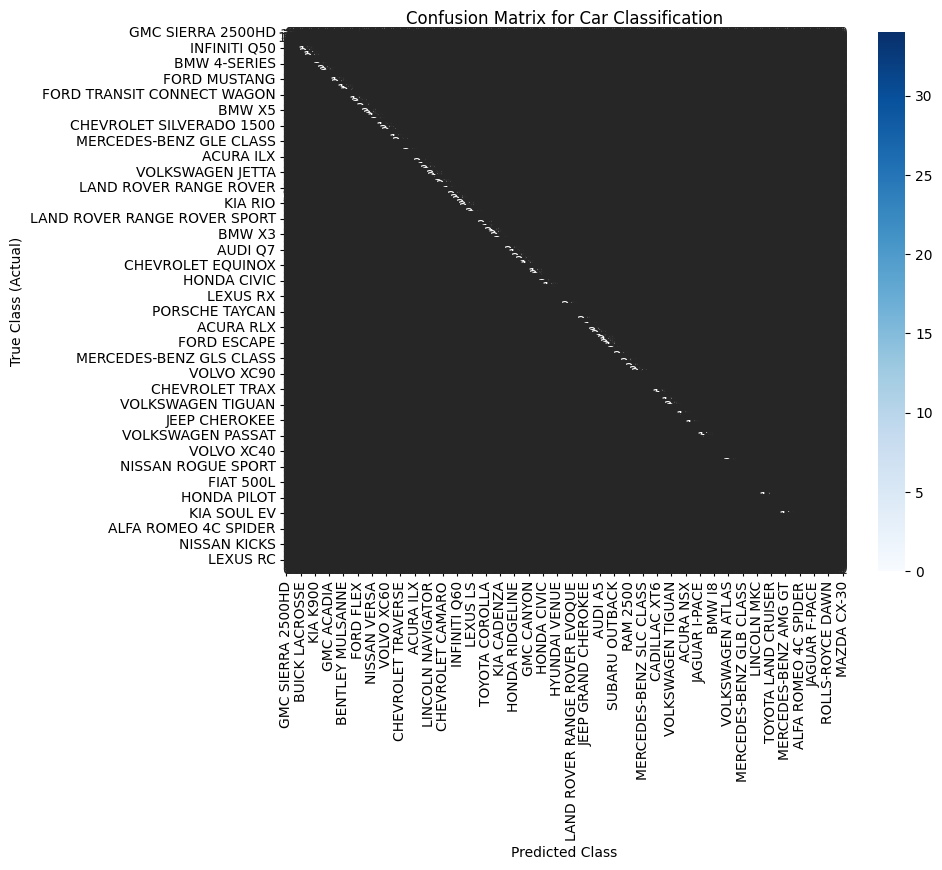

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

classes = result_df['True_val'].unique()

cm = confusion_matrix(
    y_true = np.array(result_df['True_val']),
    y_pred = np.array(result_df['Pred_val']),
    labels = classes
)

cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# To show that you can plot, but for this many classes is not ideal
# This confusion matrix is still used for main evaluation metrics
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True
)

plt.title('Confusion Matrix for Car Classification')
plt.ylabel('True Class (Actual)')
plt.xlabel('Predicted Class')
plt.show()

In [14]:
# Report from scikit-learn library
# Calculates: precision, recall, f1; and the from those: micro average, macro average, and weighted average
report = classification_report(
    y_true = result_df['True_val'],
    y_pred = result_df['Pred_val'],
    labels = classes,
    zero_division = 0,
    output_dict=True
)
print(report)

{'GMC SIERRA 2500HD': {'precision': 0.6666666666666666, 'recall': 0.5641025641025641, 'f1-score': 0.6111111111111112, 'support': 39.0}, 'HONDA ACCORD': {'precision': 0.9166666666666666, 'recall': 0.3235294117647059, 'f1-score': 0.4782608695652174, 'support': 34.0}, 'FORD EXPEDITION': {'precision': 0.9565217391304348, 'recall': 0.8461538461538461, 'f1-score': 0.8979591836734694, 'support': 26.0}, 'GMC SIERRA 1500': {'precision': 0.5925925925925926, 'recall': 0.5161290322580645, 'f1-score': 0.5517241379310345, 'support': 31.0}, 'JAGUAR XE': {'precision': 0.75, 'recall': 0.9375, 'f1-score': 0.8333333333333334, 'support': 16.0}, 'LINCOLN NAUTILUS': {'precision': 1.0, 'recall': 0.8333333333333334, 'f1-score': 0.9090909090909091, 'support': 12.0}, 'VOLVO S60': {'precision': 0.7, 'recall': 0.5384615384615384, 'f1-score': 0.6086956521739131, 'support': 26.0}, 'AUDI Q5': {'precision': 0.8, 'recall': 0.8421052631578947, 'f1-score': 0.8205128205128205, 'support': 19.0}, 'BUICK LACROSSE': {'precis

In [17]:
report_df = pd.DataFrame.from_dict(report).transpose()
report_df = report_df.round(3)
report_df

,precision,recall,f1-score,support
GMC SIERRA 2500HD,0.667,0.564,0.611,39.0
HONDA ACCORD,0.917,0.324,0.478,34.0
FORD EXPEDITION,0.957,0.846,0.898,26.0
GMC SIERRA 1500,0.593,0.516,0.552,31.0
JAGUAR XE,0.750,0.938,0.833,16.0
...,...,...,...,...
CADILLAC CT4,1.000,1.000,1.000,1.0
MAZDA CX-30,1.000,1.000,1.000,1.0
micro avg,0.796,0.796,0.796,5000.0
macro avg,0.815,0.856,0.822,5000.0


### Download Files
- Downloads the final metrics report as a .csv file for other use
- Downloads the sampled dataset incase reuse is desired.

In [21]:
# Downloads report as .csv file
from google.colab import files

OUTPUT_FILE = 'car_classify_metrics.csv'

print("Exportint Metrics to .csv file:")
report_df.to_csv(OUTPUT_FILE, index=True)

print(f'Downloading: {OUTPUT_FILE}')
files.download(OUTPUT_FILE)

Exportint Metrics to .csv file:
Downloading: car_classify_metrics.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# Downloads sampled data set
print(f'Downloading sampled_data.csv')
sampled_df.to_csv('sampled_data.csv', index=True)
files.download('sampled_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>